 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5607) </b> </h1> </center>

<b> Programming Assignment - 02 </b>

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Assignment on Linear Regression </b> <br>
This programing assignment is divided in to two parts covering the understanding of basic parts where you will get a chance to code the linear regression problem in both data space and kernel space. You will also implement regularizers to understand the bias-variance trade-off problem. In contrast to the full batch training, you will also get chance to code the online training of linear regression problem as discussed in the class. Part1 will conclude with the implimentation of MAP estimate. Later, In part2 of the assignment you have to apply the learned basic concepts to real world problems. 




<center> <h2> <b> Understanding Basic Concepts </b> </h2> </center>


<b> Part - (1) :  Understanding Error Surfaces </b>

According to www.geogebra.org, the relationship between human height (in
inches) and weight (in pounds) is given by <br>
<center> $t = 3.86x - 110.42$ </center>

(a) Generate 25 meaningful data points from this relationship, mimicking a
noisy sensor, where the noise follows a zero mean Gaussian with a variance
of 20. Plot the scatter plot of the data. <br>
(b) Now, we need to estimate the above relationship from the noisy data
generated in (a) by fitting a line, i.e $\hat{t} = y(x,w) = w_{0} + w_{1}x$. Let us use least squares criterion discussed in the class to estimate the parameters $w_{0}$ and $w_{1}$ Generate and plot the error surface $J(w_{0},w_{1})$ associated with this approach. Locate the minimum on this error surface.<br>

(c) Estimate the parameters using least squares approach, and compare them
with the desired values.
<center> $\textbf{w}_{opt} = (\textbf{X}^{T}\textbf{X})^{-1}\textbf{X}^{T}\textbf{t}$</center>

(d) Report all your observations

In [1]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

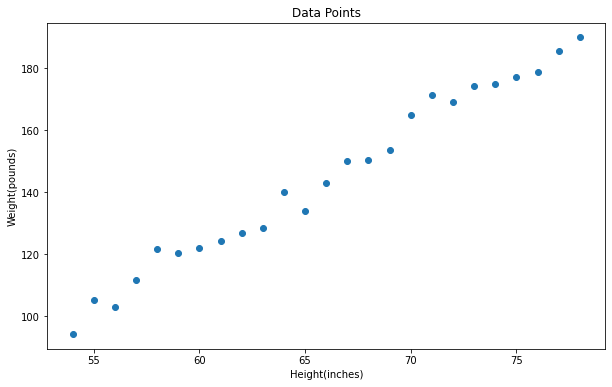

In [2]:
########################################
#Generate meaningfull data 
########################################
samples = 25
mean = 0
var = 20
x = np.linspace(4.5*12,6.5*12,num=samples).reshape((samples,))#Height in range of [4.5ft,6.5ft]
t = 3.86*x-110.42                         #Weight in pounds
yn = np.random.normal(mean,np.sqrt(var),samples)
y = t+yn                                  #Noised Data
l = len(x)
X = np.hstack((np.ones((l,1)),x.reshape((l,1))))
########################################
#Plot scatter plot of data
########################################
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.xlabel('Height(inches)')
plt.ylabel('Weight(pounds)')
plt.title('Data Points')
plt.show()

In [3]:
########################################
#Parameter prediction by locating the minima of error surface
########################################
#Complete the below error function 
def Error(w,t,x): #inputs : 1)weight 2)data i.e (t,x)
    l = len(x)
    X = np.hstack((np.ones((l,1)),x.reshape((l,1))))
    y = X@w
    error = t-y
    return error

def cost(error):
    c = np.sum(error**2)/len(error)
    return c

#Sample a bunch of w's around w_opt and compute the associated error
wo = np.arange(-111,-109,0.01)
w1 = np.arange(3,5,0.01)
wo_mesh,w1_mesh = np.meshgrid(wo,w1)
m,n = wo_mesh.shape
J = np.zeros((m,n))
for i in range(m):
    for j in range(n):
        w = np.array((wo_mesh[i,j],w1_mesh[i,j])).reshape((2,1))
        J[i,j] = cost(Error(w,t,x))

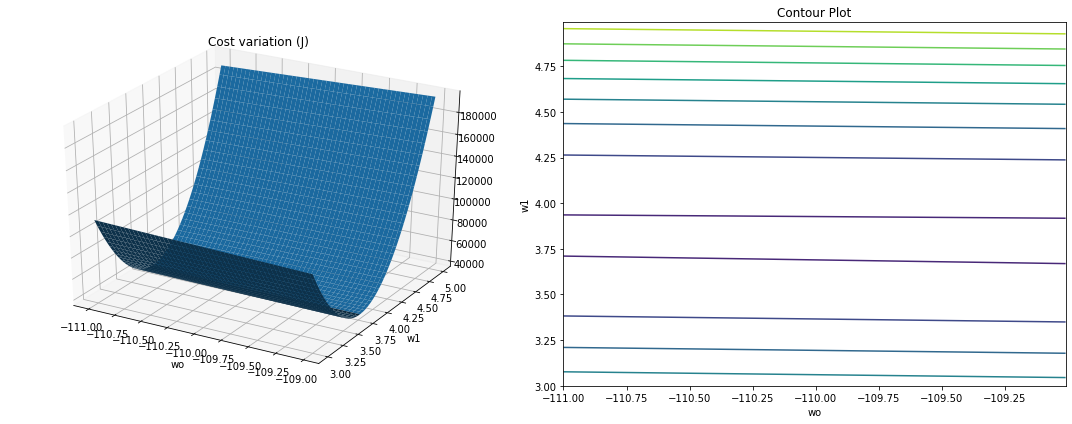

In [4]:
#Plot 3D error surface and the corresponding contour plots
plt.rcParams["figure.figsize"] = [15, 6]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(wo_mesh, w1_mesh, J)
ax.set_title("Cost variation (J)")
ax.set_xlabel("wo")
ax.set_ylabel("w1")
ax = fig.add_subplot(122)
ax.contour(wo_mesh, w1_mesh, J)
ax.set_title('Contour Plot')
ax.set_xlabel('wo')
ax.set_ylabel('w1')
plt.show()


Optimal wo :  -109.00999999999898
Optimal w1 :  3.789999999999983


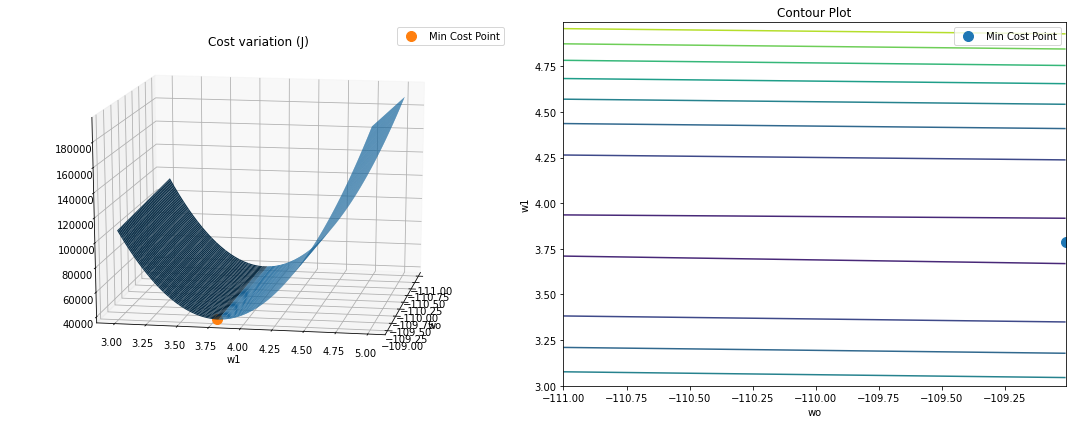

In [5]:
#Locate the minima of the error surface
Optimal_cost = J.min()
ind1,ind2 = np.where(J==Optimal_cost)
Optimal_wo = wo_mesh[ind1,ind2]
Optimal_w1 = w1_mesh[ind1,ind2]
Err_sur_w = np.array([Optimal_wo[0],Optimal_w1[0]])
print("Optimal wo : ",Optimal_wo[0])
print("Optimal w1 : ",Optimal_w1[0])
plt.rcParams["figure.figsize"] = [15, 6]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(wo_mesh, w1_mesh, J)
ax.view_init(15, 10)
ax.plot(Optimal_wo,Optimal_w1,Optimal_cost,'o',markersize=10,label='Min Cost Point')
ax.legend()
ax.set_title("Cost variation (J)")
ax.set_xlabel("wo")
ax.set_ylabel("w1")
ax = fig.add_subplot(122)
ax.contour(wo_mesh, w1_mesh, J)
ax.set_title('Contour Plot')
ax.set_xlabel('wo')
ax.set_ylabel('w1')
ax.plot(Optimal_wo,Optimal_w1,'o',markersize=10,label='Min Cost Point')
ax.legend()
plt.show()


Estimated Weights using least squares approach :  [-110.42    3.86]


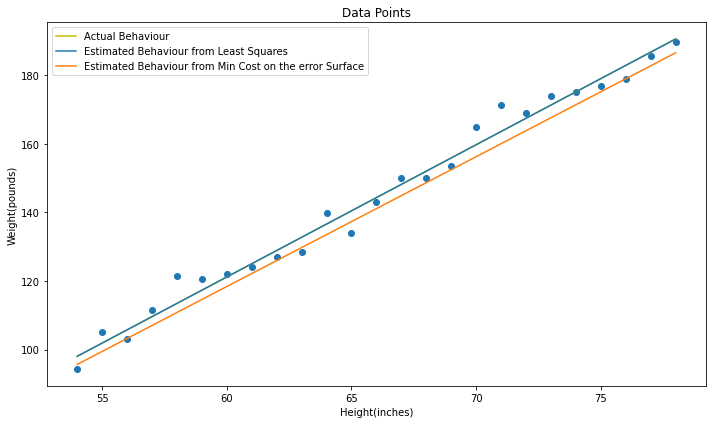

In [6]:
########################################
#Least squares approach to estimate the weights
########################################
#Complete the below linear regression function
def LinearRegression(x,t): #inputs : 1)input data i.e (x). 2)target i.e (t)
    l = len(x)
    X = np.hstack((np.ones((l,1)),x.reshape((l,1))))
    w_opt = np.linalg.inv(X.T@X)@(X.T@t)
    return w_opt

#Estimate optimal weight's using "LinearRegression" function
w_est = LinearRegression(x,t)
print("Estimated Weights using least squares approach : ",w_est)

#Estimate the targets using the input x and the estimated weights
y_est = X@w_est
y_err_est = X@Err_sur_w

#Plot the estimated line on top of the above scatter plot
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x,t,'-y',label='Actual Behaviour')
plt.plot(x,y_est,label='Estimated Behaviour from Least Squares')
plt.plot(x,y_err_est,label='Estimated Behaviour from Min Cost on the error Surface')
plt.legend()
plt.xlabel('Height(inches)')
plt.ylabel('Weight(pounds)')
plt.title('Data Points')
plt.show()


In [7]:
########################################
#Compare the estimated weight's using least squares approach with the error surface approach
########################################
print("Comparisions : ")
print("Weights obtained from the Error Surface : ",Err_sur_w)
print("Weights obtained from the least squares : ",w_est)
print("Note : The weights obtained from the error surface even captures the noise in the data.")

Comparisions : 
Weights obtained from the Error Surface :  [-109.01    3.79]
Weights obtained from the least squares :  [-110.42    3.86]
Note : The weights obtained from the error surface even captures the noise in the data.


<b> Part - (2) : Understanding model order and overfitting  </b>

(a). Generate  20  data  points  from $t_{n} = sin(2πx_{n}) + e_{n}$, where $x_{n} \in [0,1] $ and $e_{n} \thicksim \mathcal{N} (0,0.1)$ , and divide them into two sets, a training set and a testing set each containing 10 points <br>

(b). Fit  an $M^{th}$ degree  polynomial  to  the  training  data  using  least  squares approach, i.e.,
<center> $\hat{t_{n}} = w_{0}x + w_{1}x + .... +  w_{m}x^{m} + ... + w_{M}x^{M} $ </center> 

Use the estimated parameter vector $\textbf{w}$ , to predict the target values in training and testing datasets.  Plot the root mean squared error associated with each dataset, for M=0,1,...,9. Explain your results. <br>

(c) Increase the size of the training dataset to 100 points, and repeat (b). <br>

(d) Add a $l_{2}$ regularization term to the objective function in (b) and repeat (b) and (c).  Study the affect of Lagrange multiplier λ on the root mean squared error of the training and testing datasets <br>

(e) Modify the function in (a) to $t_{n}=5+sin(2πx_{n})+e_{n}$ to study the effect of regularizing the bias coefficient $w_{0}$.

(f) Report all your observations

In [8]:
########################################
#Generate 20 data points
########################################
numSamples = 20
xn = np.linspace(0,1,numSamples,True)
mean = 0
std_dev = 0.1
en = np.random.normal(mean,std_dev,numSamples)
tn = np.sin(2*np.pi*xn)+en

#Obtain train and test splits
n_tr = int(numSamples/2)
idx = np.arange(numSamples)
np.random.shuffle(idx)
idx_tr = idx[:n_tr]
X_train = xn[idx_tr]
Y_train = tn[idx_tr]
idx_test = idx[n_tr:]
X_test = xn[idx_test]
Y_test = tn[idx_test]

In [9]:
# Polynomial Kernel
def phi(x,M):
    p = np.arange(M+1)
    v = np.power(x,p)
    return v
def phi_x(X,M):
    n = len(X)
    Phi_X = np.zeros((n,M+1))
    for i in range(n):
        Phi_X[i,:] = phi(X_train[i],M)
    return Phi_X

def error(X1,X2):
    err = np.sum((X1-X2)**2)/len(X1)
    return err

def SimplePolyFit(X_train,Y_train,M):
    Phi_X = phi_x(X_train,M)
    W = np.linalg.inv(Phi_X.T@Phi_X)@(Phi_X.T@Y_train)
    return W
#Complete the function
def PolynomialFit(X_train,Y_train,M,lamda):
    Phi_X = phi_x(X_train,M)
    C = Phi_X.T@Phi_X
    l = len(C)
    w_opt = np.linalg.inv((C)+(lamda*np.eye(l)))@(Phi_X.T@Y_train)
    return w_opt
#Complete the function
def PolynomialPred(w_est,X_train,X_test,Y_train,Y_test):
    Phi_X_train = phi_x(X_train,M)
    Y_train_est = Phi_X_train@w_est
    Phi_X_test = phi_x(X_test,M)
    Y_test_est = Phi_X_test@w_est
    # print(Y_train.shape,Y_train_est.shape)
    TrainError = error(Y_train_est,Y_train)
    TestError = error(Y_test_est,Y_test)
    return TrainError,TestError

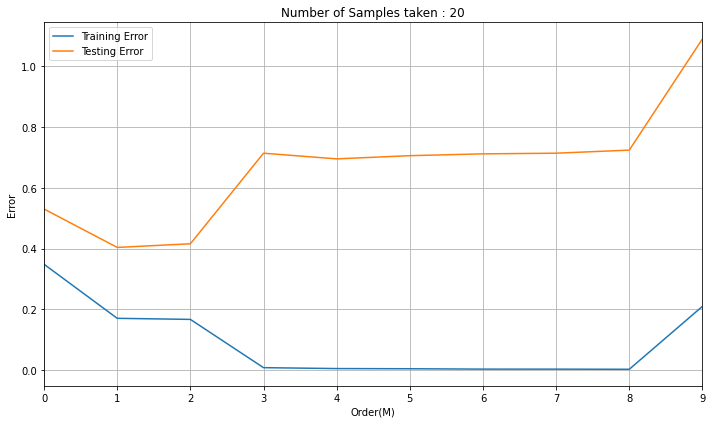

In [10]:
########################################
#Fitting Mth degree polynomial using least squares approach
########################################
#Iterate through range of M values
M_range=list(range(10))
trainErrList = []
testErrList = []
for M in M_range:
    #Fit Mth order polynomial i.e estimate optimal w
    w = SimplePolyFit(X_train,Y_train,M)
    #Predict errors on both training and testing data using estimated w
    trainErr,testErr = PolynomialPred(w,X_train,X_test,Y_train,Y_test)
    #Store them for plotting
    trainErrList.append(trainErr)
    testErrList.append(testErr)
#Plot training error vs polynomial order and testing error vs polynomial order
plt.figure(figsize=(10,6))
plt.plot(M_range,trainErrList,label="Training Error")
plt.plot(M_range,testErrList,label="Testing Error")
plt.xlabel("Order(M)")
plt.ylabel("Error")
plt.grid()
plt.xticks(M_range)
plt.xlim([min(M_range),max(M_range)])
plt.title("Number of Samples taken : "+str(numSamples))
plt.legend()
plt.show()

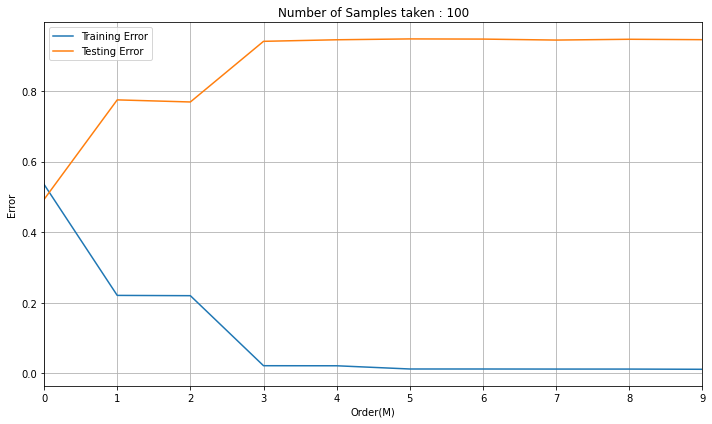

In [11]:
########################################
#Increase the size of training data set to 100 points and repeat the experiments
########################################
numSamples = 100
xn = np.linspace(0,1,numSamples,True)
mean = 0
std_dev = 0.1
en = np.random.normal(mean,std_dev,numSamples)
tn = np.sin(2*np.pi*xn)+en

#Obtain train and test splits
n_tr = int(numSamples/2)
idx = np.arange(numSamples)
np.random.shuffle(idx)
idx_tr = idx[:n_tr]
X_train = xn[idx_tr]
Y_train = tn[idx_tr]
idx_test = idx[n_tr:]
X_test = xn[idx_test]
Y_test = tn[idx_test]
########################################
#Fitting Mth degree polynomial using least squares approach
########################################

#Iterate through range of M values
M_range=list(range(10))
trainErrList = []
testErrList = []
for M in M_range:
    #Fit Mth order polynomial i.e estimate optimal w
    w = SimplePolyFit(X_train,Y_train,M)
    #Predict errors on both training and testing data using estimated w
    trainErr,testErr = PolynomialPred(w,X_train,X_test,Y_train,Y_test)
    #Store them for plotting
    trainErrList.append(trainErr)
    testErrList.append(testErr)
#Plot training error vs polynomial order and testing error vs polynomial order
plt.figure(figsize=(10,6))
plt.plot(M_range,trainErrList,label="Training Error")
plt.plot(M_range,testErrList,label="Testing Error")
plt.xlabel("Order(M)")
plt.ylabel("Error")
plt.grid()
plt.xticks(M_range)
plt.xlim([min(M_range),max(M_range)])
plt.title("Number of Samples taken : "+str(numSamples))
plt.legend()
plt.show()

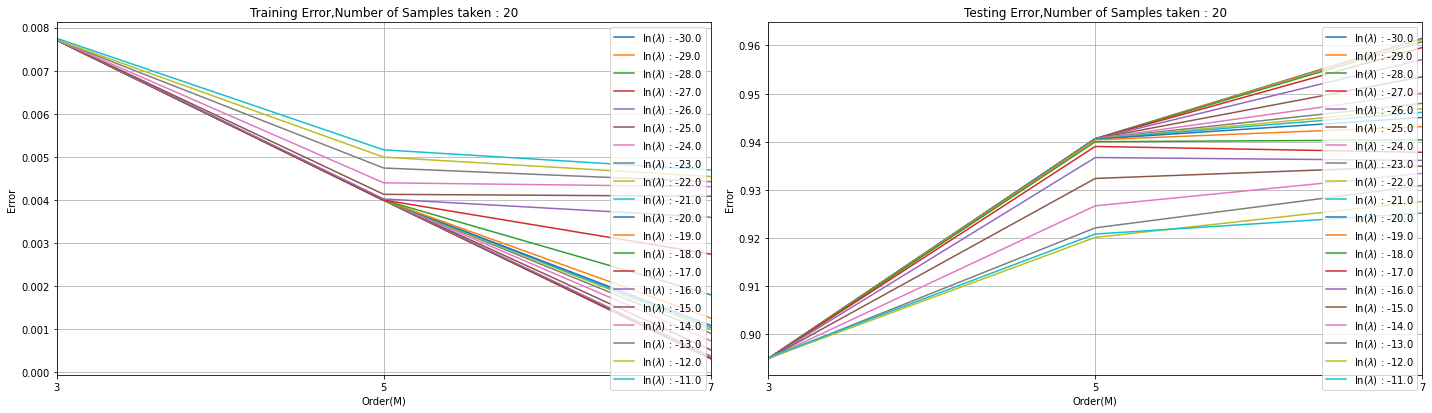

In [12]:
########################################
#Effect of regularization
########################################
#Consider a set of lambda's
r = np.arange(-30,-10,1)
lambdas = np.exp(r)
M_range = [3,5,7]
#Repeat (b) and (c). Submit the plots for M=3,5,7
numSamples = 20
xn = np.linspace(0,1,numSamples,True)
mean = 0
std_dev = 0.1
en = np.random.normal(mean,std_dev,numSamples)
tn = np.sin(2*np.pi*xn)+en

#Obtain train and test splits
n_tr = int(numSamples/2)
idx = np.arange(numSamples)
np.random.shuffle(idx)
idx_tr = idx[:n_tr]
X_train = xn[idx_tr]
Y_train = tn[idx_tr]
idx_test = idx[n_tr:]
X_test = xn[idx_test]
Y_test = tn[idx_test]
########################################
#Fitting Mth degree polynomial using least squares approach with regularization
########################################
#Iterate through range of M values
lam_train = []
lam_test = []
for lamda in lambdas:
    trainErrList = []
    testErrList = []
    for M in M_range:
        #Fit Mth order polynomial i.e estimate optimal w
        w = PolynomialFit(X_train,Y_train,M,lamda)
        #Predict errors on both training and testing data using estimated w
        trainErr,testErr = PolynomialPred(w,X_train,X_test,Y_train,Y_test)
        #Store them for plotting
        trainErrList.append(trainErr)
        testErrList.append(testErr)
    lam_train.append(trainErrList)
    lam_test.append(testErrList)

#Plot training error vs polynomial order and testing error vs polynomial order with effect of Regularization
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
for i in range(len(lam_train)):
    trainErrList = lam_train[i]
    plt.plot(M_range,trainErrList,label="ln($\lambda)$ : "+str(np.log(lambdas[i])))
plt.xlabel("Order(M)")
plt.ylabel("Error")
plt.grid()
plt.xticks(M_range)
plt.xlim([min(M_range),max(M_range)])
plt.title("Training Error,Number of Samples taken : "+str(numSamples))
plt.legend()
plt.subplot(1,2,2)
for i in range(len(lam_test)):
    testErrList = lam_test[i]
    plt.plot(M_range,testErrList,label="ln($\lambda)$ : "+str(np.log(lambdas[i])))
plt.xlabel("Order(M)")
plt.ylabel("Error")
plt.grid()
plt.xticks(M_range)
plt.xlim([min(M_range),max(M_range)])
plt.title("Testing Error,Number of Samples taken : "+str(numSamples))
plt.legend()
plt.show()

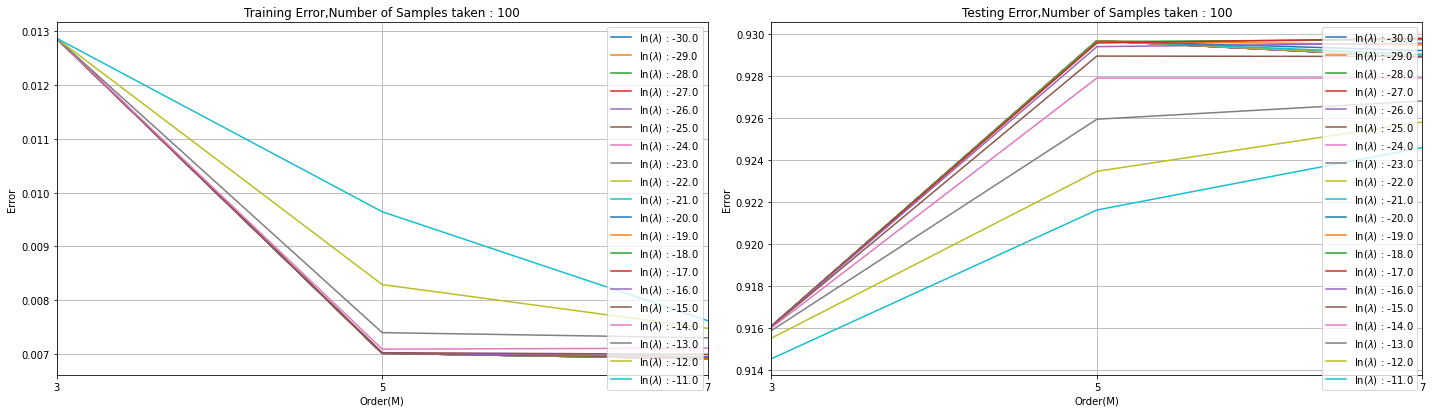

In [13]:
#Consider a set of lambda's
r = np.arange(-30,-10,1)
lambdas = np.exp(r)
M_range = [3,5,7]
#Repeat (b) and (c). Submit the plots for M=3,5,7
numSamples = 100
xn = np.linspace(0,1,numSamples,True)
mean = 0
std_dev = 0.1
en = np.random.normal(mean,std_dev,numSamples)
tn = np.sin(2*np.pi*xn)+en

#Obtain train and test splits
n_tr = int(numSamples/2)
idx = np.arange(numSamples)
np.random.shuffle(idx)
idx_tr = idx[:n_tr]
X_train = xn[idx_tr]
Y_train = tn[idx_tr]
idx_test = idx[n_tr:]
X_test = xn[idx_test]
Y_test = tn[idx_test]
########################################
#Fitting Mth degree polynomial using least squares approach with regularization
########################################
#Iterate through range of M values
lam_train = []
lam_test = []
for lamda in lambdas:
    trainErrList = []
    testErrList = []
    for M in M_range:
        #Fit Mth order polynomial i.e estimate optimal w
        w = PolynomialFit(X_train,Y_train,M,lamda)
        #Predict errors on both training and testing data using estimated w
        trainErr,testErr = PolynomialPred(w,X_train,X_test,Y_train,Y_test)
        #Store them for plotting
        trainErrList.append(trainErr)
        testErrList.append(testErr)
    lam_train.append(trainErrList)
    lam_test.append(testErrList)

#Plot training error vs polynomial order and testing error vs polynomial order with effect of Regularization
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
for i in range(len(lam_train)):
    trainErrList = lam_train[i]
    plt.plot(M_range,trainErrList,label="ln($\lambda)$ : "+str(np.log(lambdas[i])))
plt.xlabel("Order(M)")
plt.ylabel("Error")
plt.grid()
plt.xticks(M_range)
plt.xlim([min(M_range),max(M_range)])
plt.title("Training Error,Number of Samples taken : "+str(numSamples))
plt.legend()
plt.subplot(1,2,2)
for i in range(len(lam_test)):
    testErrList = lam_test[i]
    plt.plot(M_range,testErrList,label="ln($\lambda)$ : "+str(np.log(lambdas[i])))
plt.xlabel("Order(M)")
plt.ylabel("Error")
plt.grid()
plt.xticks(M_range)
plt.xlim([min(M_range),max(M_range)])
plt.title("Testing Error,Number of Samples taken : "+str(numSamples))
plt.legend()
plt.show()

Weights with small Regularization (λ = e^-30): 
  [-4.46524500e+00  3.15156356e+02 -3.92063356e+03  2.43830131e+04
 -8.54632959e+04  1.76724121e+05 -2.13862891e+05  1.38154727e+05
 -3.00217500e+04 -1.18471250e+04  5.54795996e+03]
Weights with large Regularization (λ = e^0)  : 
 [ 4.3418  0.9696  0.282   0.0311 -0.0853 -0.1352 -0.1469 -0.1368 -0.115
 -0.0877 -0.0588]


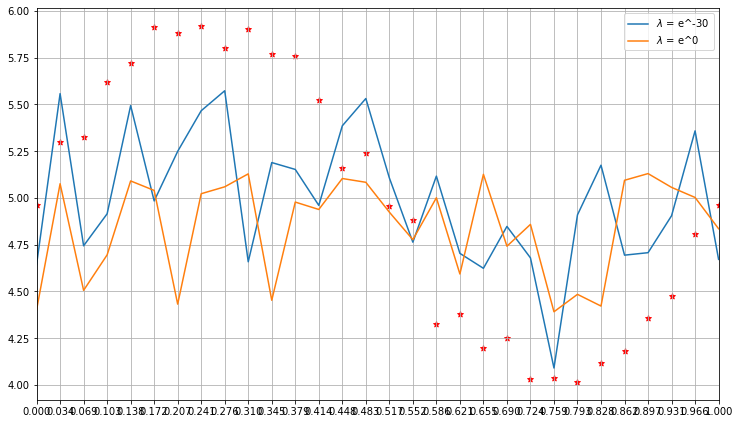

Error using small regularization :  0.32944749813796986
Error using large regularization :  0.4789649293329047


In [14]:
########################################
#Effect of bias regularization
########################################
#Modify the function i.e include bias
lambdas = np.array([np.exp(-30),np.exp(0)])
M = 10
numSamples = 30
bias = 5
mean = 0
std_dev = 0.1

#Generate data
xn = np.linspace(0,1,numSamples,True)
en = np.random.normal(mean,std_dev,numSamples)
tn = np.sin(2*np.pi*xn)+en+bias

#Estimate the polynomial with and without regularization constraint
#Without Regularization
W_wr = PolynomialFit(xn,tn,M,lambdas[0])
Phi_xn = phi_x(xn,M)
tn_est_wr = Phi_xn@W_wr
Err_wr = error(tn_est_wr,tn)
#With Regularization
W_r = PolynomialFit(xn,tn,M,lambdas[1])
tn_est_r = Phi_xn@W_r
Err_r = error(tn_est_r,tn)

print("Weights with small Regularization (\u03BB = e^-30): \n ",np.round(W_wr,6))
print("Weights with large Regularization (\u03BB = e^0)  : \n",np.round(W_r,4))
#Compare the two estimated polynomials and report the observations
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.scatter(xn,tn,marker='*',c=['red'])
plt.plot(xn,tn_est_wr,label="$\lambda$ = e^-30")
plt.plot(xn,tn_est_r,label="$\lambda$ = e^0")
plt.grid()
plt.xticks(xn)
plt.xlim([xn.min(),xn.max()])
plt.legend()
plt.show()
print("Error using small regularization : ",Err_wr)
print("Error using large regularization : ",Err_r)



**Observations :**

*   As the regularization increases the weights stay closer to zero.
*   But the error seeems to increase as we use high regularization causing underfit.
*   The model with low regularization seems to fit the train data well, but would be overfit as when seen on the testing data.
*   The bias is incorporated to wo in case of high regularization.



<b> Part - (3) : Understanding choice of kernel  </b>


(a). Generate 100 data points from $t_{n}=sin(2πx_{n})+e_{n}$, where $x_{n} \in [0 1]$ and $e_{n} \thicksim \mathcal{N}(0,0.1)$, and divide them into two sets, a training set and a testing test each containing 50 points.  Fit an $M^{th}$ degree polynomial using polynomial,Gaussian and sigmoidal kernels, and study the goodness of fit in each case,for different model orders M

(b). Repeat (a) by modifying the target function to <br>
<center> $t_{n} = $ $\begin{cases}
 \text{sinusoid} + e_{n} , \;\; where \;\; x  \in [0,1) \\
 \text{triangle} + e_{n} , \;\; where \;\; x  \in [1,2) \\
 \text{Gaussian} + e_{n} , \;\; where \;\; x  \in [2,3) \\ 
\end{cases}$ </center>

Clearly discuss your observations/results for each of the three kernels.

(c). Report all your observations

In [15]:
def GaussianKernel(x,M,h=1,xmin=0,xmax=1):
    n=len(x)
    mus = np.linspace(xmin,xmax,M+1,True).reshape((1,M+1))
    X = x.reshape((n,1))@np.ones((1,M+1))
    z = (X-mus)/h
    ker = (1/(2*np.pi*h**2))*np.exp(-0.5*z**2)
    return ker

def LogisticKernel(x,M,s=1,xmin=0,xmax=1):
    n=len(x)
    mus = np.linspace(xmin,xmax,M+1,True).reshape((1,M+1))
    X = x.reshape((n,1))@np.ones((1,M+1))
    z = (X-mus)/s
    ker = 1/(1+np.exp(-z))
    return ker

def KernelRegressionFit(X_train,Y_train,kernelType,M,lamda=0,xmin=0,xmax=1):
    #kernelType : {Polynomial,Gaussian,Sigmoid}
    if kernelType=='Polynomial':
        Phi_X = phi_x(X_train,M)
    elif kernelType=='Gaussian':
        Phi_X = GaussianKernel(X_train,M,h=1)
    elif kernelType=='Sigmoid':
        Phi_X = LogisticKernel(X_train,M,s=1)
    C = Phi_X.T@Phi_X
    l = len(C)
    w_opt = np.linalg.inv((C)+(lamda*np.eye(l)))@(Phi_X.T@Y_train)
    return w_opt

def KernelRegressionPred(w_est,X_train,Y_train,X_test,Y_test,kernelType,M,xmin=0,xmax=1):
    #kernelType : {Polynomial,Gaussian,Sigmoid}
    if kernelType=='Polynomial':
        Phi_X_train = phi_x(X_train,M)
        Phi_X_test = phi_x(X_test,M)
    elif kernelType=='Gaussian':
        h=1
        Phi_X_train = GaussianKernel(X_train,M,h,xmin,xmax)
        Phi_X_test = GaussianKernel(X_test,M,h,xmin,xmax)
    elif kernelType=='Sigmoid':
        s=1
        Phi_X_train = LogisticKernel(X_train,M,s,xmin,xmax)
        Phi_X_test = LogisticKernel(X_test,M,s,xmin,xmax)
    Y_train_est = Phi_X_train@w_est
    Y_test_est = Phi_X_test@w_est
    # print(Y_train.shape,Y_train_est.shape)
    TrainError = error(Y_train_est,Y_train)
    TestError = error(Y_test_est,Y_test)
    return TrainError,TestError


In [16]:
########################################
#Generate 100 data points
########################################
numSamples = 100
mean = 0
std_dev = 0.1
#Generate data
xn = np.linspace(0,1,numSamples,True)
en = np.random.normal(mean,std_dev,numSamples)
tn = np.sin(2*np.pi*xn)+en
#Obtain train and test splits
#Take even samples for training and odd samples for testing
idx_tr = np.arange(0,numSamples,2)
X_train = xn[idx_tr]
Y_train = tn[idx_tr]
idx_test = np.arange(1,numSamples,2)
X_test = xn[idx_test]
Y_test = tn[idx_test]


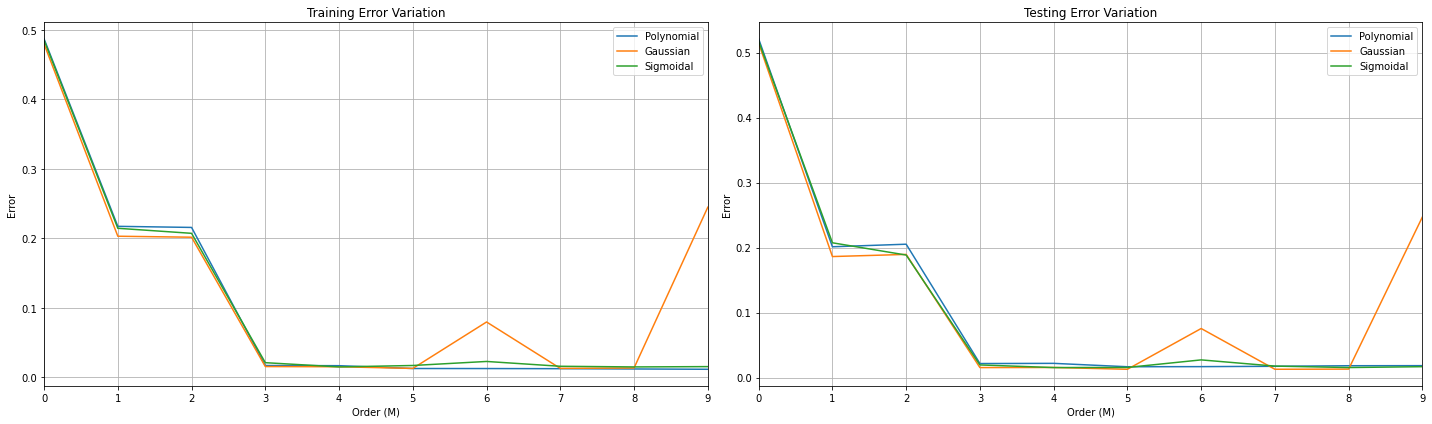

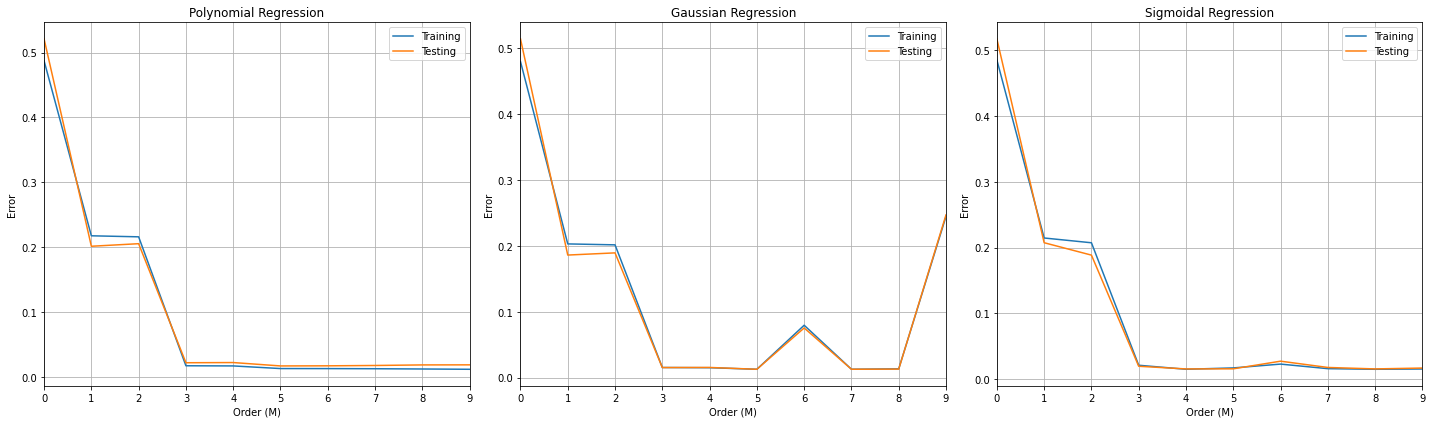

In [17]:
#Simple Sinusoid
#Iterate through range of M values
M_range=list(range(10))
TrainErrorBlock = []
TestErrorBlock = []
for M in M_range:
    #Fit Mth order polynomial using three kernels i.e {Polynomial,Gaussian,Sigmoid}
    #Polynomial
    #Fit Mth order polynomial i.e estimate optimal w
    w_est_p = KernelRegressionFit(X_train,Y_train,'Polynomial',M,lamda=0)
    #Predict errors on both training and testing data using estimated w
    trainErrP,testErrP = KernelRegressionPred(w_est_p,X_train,Y_train,X_test,Y_test,'Polynomial',M)

    #Gaussian
    #Fit Mth order polynomial i.e estimate optimal w
    w_est_g = KernelRegressionFit(X_train,Y_train,'Gaussian',M,lamda=0)
    #Predict errors on both training and testing data using estimated w
    trainErrG,testErrG = KernelRegressionPred(w_est_g,X_train,Y_train,X_test,Y_test,'Gaussian',M)

    #Logistic
    #Fit Mth order polynomial i.e estimate optimal w
    w_est_l = KernelRegressionFit(X_train,Y_train,'Sigmoid',M,lamda=0)
    #Predict errors on both training and testing data using estimated w
    trainErrL,testErrL = KernelRegressionPred(w_est_l,X_train,Y_train,X_test,Y_test,'Sigmoid',M)

    #Store them for plotting
    TrainErrorBlock.append([trainErrP,trainErrG,trainErrL])
    TestErrorBlock.append([testErrP,testErrG,testErrL])

TrainErrorBlock = np.asarray(TrainErrorBlock)
TestErrorBlock = np.asarray(TestErrorBlock)
#Plot training error vs polynomial order and testing error vs polynomial order for all the three different kernels
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title("Training Error Variation")
plt.plot(M_range,TrainErrorBlock[:,0],label="Polynomial")
plt.plot(M_range,TrainErrorBlock[:,1],label="Gaussian")
plt.plot(M_range,TrainErrorBlock[:,2],label="Sigmoidal")
plt.xlabel("Order (M)")
plt.ylabel("Error")
plt.grid()
plt.xticks(M_range)
plt.xlim([min(M_range),max(M_range)])
plt.legend()
plt.subplot(1,2,2)
plt.title("Testing Error Variation")
plt.plot(M_range,TestErrorBlock[:,0],label="Polynomial")
plt.plot(M_range,TestErrorBlock[:,1],label="Gaussian")
plt.plot(M_range,TestErrorBlock[:,2],label="Sigmoidal")
plt.xlabel("Order (M)")
plt.ylabel("Error")
plt.grid()
plt.xticks(M_range)
plt.xlim([min(M_range),max(M_range)])
plt.legend()
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('Polynomial Regression')
plt.plot(M_range,TrainErrorBlock[:,0],label="Training")
plt.plot(M_range,TestErrorBlock[:,0],label="Testing")
plt.xlabel("Order (M)")
plt.ylabel("Error")
plt.grid()
plt.xticks(M_range)
plt.xlim([min(M_range),max(M_range)])
plt.legend()
plt.subplot(1,3,2)
plt.title('Gaussian Regression')
plt.plot(M_range,TrainErrorBlock[:,1],label="Training")
plt.plot(M_range,TestErrorBlock[:,1],label="Testing")
plt.xlabel("Order (M)")
plt.ylabel("Error")
plt.grid()
plt.xticks(M_range)
plt.xlim([min(M_range),max(M_range)])
plt.legend()
plt.subplot(1,3,3)
plt.title('Sigmoidal Regression')
plt.plot(M_range,TrainErrorBlock[:,2],label="Training")
plt.plot(M_range,TestErrorBlock[:,2],label="Testing")
plt.xlabel("Order (M)")
plt.ylabel("Error")
plt.grid()
plt.xticks(M_range)
plt.xlim([min(M_range),max(M_range)])
plt.legend()
plt.show()


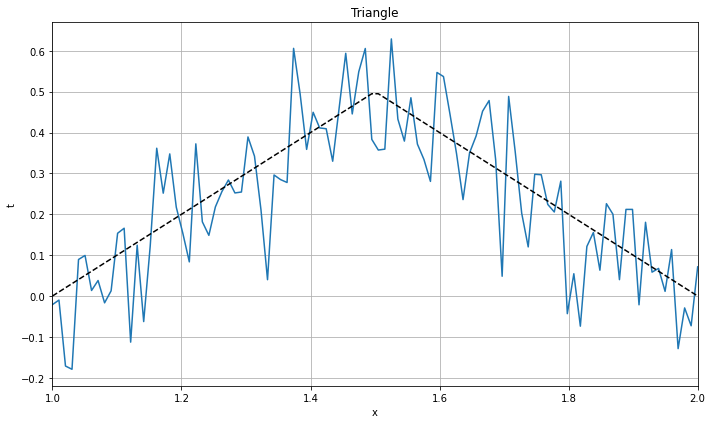

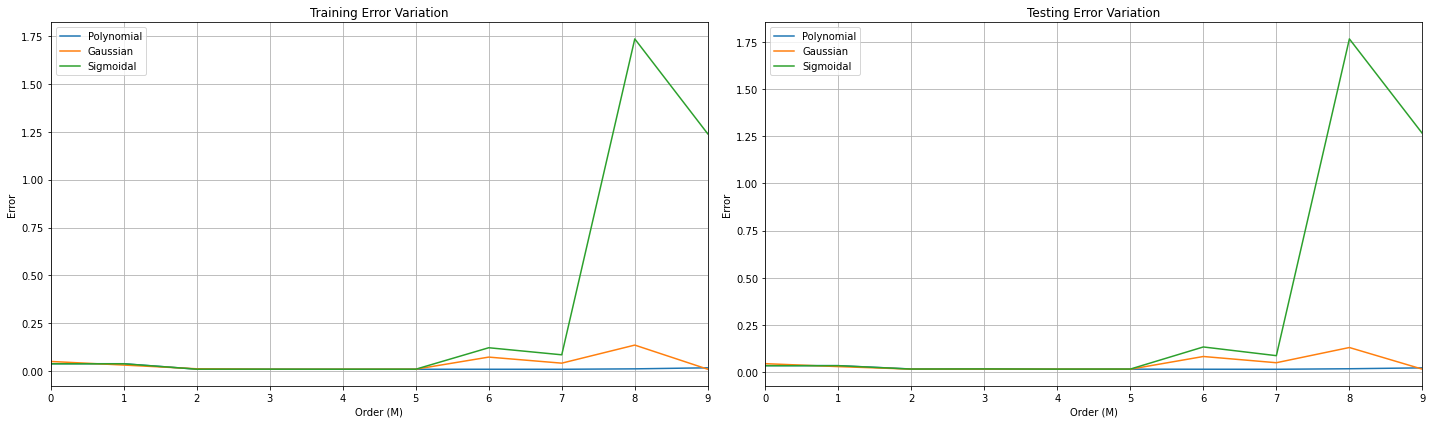

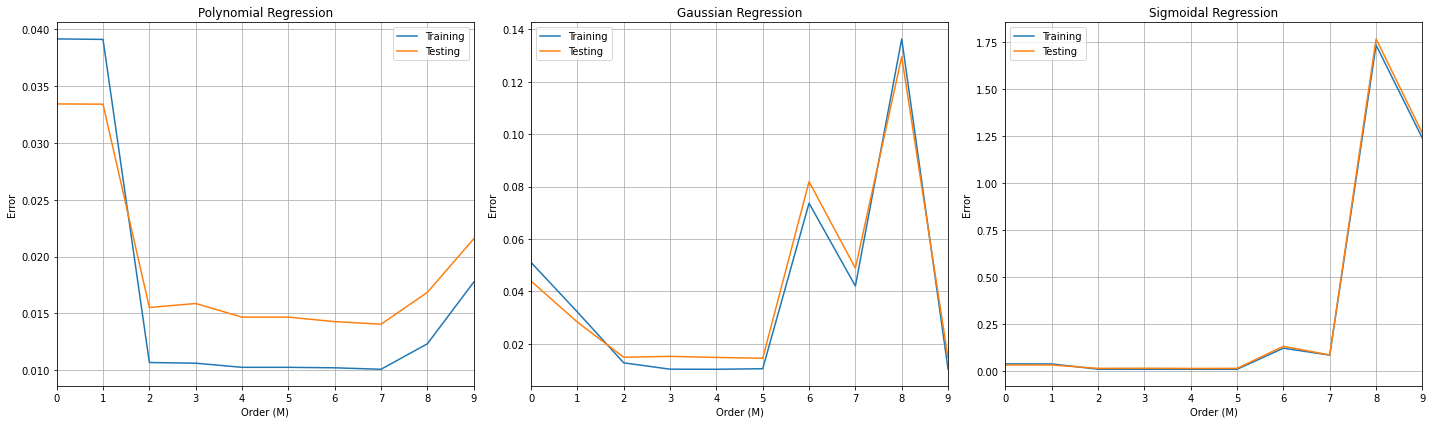

In [18]:
########################################
#Repeat the experiments by changing target function
########################################
#Triangle
numSamples = 100
mean = 0
std_dev = 0.1
#Generate data
xmin=1
xmax=2
xn = np.linspace(xmin,xmax,numSamples,True).reshape((numSamples,1))
en = np.random.normal(mean,std_dev,numSamples).reshape((numSamples,1))
yn = np.zeros((numSamples,1))
yn[0:int(numSamples/2),:] = xn[0:int(numSamples/2),:]-1
yn[int(numSamples/2):,:] = 2-xn[int(numSamples/2):,:]
tn = yn+en
plt.figure(figsize=(10,6))
plt.plot(xn,tn)
plt.plot(xn,yn,'k--')
plt.title("Triangle")
plt.grid()
plt.ylabel("t")
plt.xlabel("x")
plt.xlim([1,2])
plt.show()
#Obtain train and test splits
#Take even samples for training and odd samples for testing
idx_tr = np.arange(0,numSamples,2)
X_train = xn[idx_tr]
Y_train = tn[idx_tr]
idx_test = np.arange(1,numSamples,2)
X_test = xn[idx_test]
Y_test = tn[idx_test]
#Iterate through range of M values
M_range=list(range(10))
TrainErrorBlock = []
TestErrorBlock = []
for M in M_range:
    #Fit Mth order polynomial using three kernels i.e {Polynomial,Gaussian,Sigmoid}
    #Polynomial
    #Fit Mth order polynomial i.e estimate optimal w
    lamda=0
    w_est_p = KernelRegressionFit(X_train,Y_train,'Polynomial',M,lamda,xmin,xmax)
    #Predict errors on both training and testing data using estimated w
    trainErrP,testErrP = KernelRegressionPred(w_est_p,X_train,Y_train,X_test,Y_test,'Polynomial',M)

    #Gaussian
    #Fit Mth order polynomial i.e estimate optimal w
    w_est_g = KernelRegressionFit(X_train,Y_train,'Gaussian',M,lamda,xmin,xmax)
    #Predict errors on both training and testing data using estimated w
    trainErrG,testErrG = KernelRegressionPred(w_est_g,X_train,Y_train,X_test,Y_test,'Gaussian',M)

    #Logistic
    #Fit Mth order polynomial i.e estimate optimal w
    w_est_l = KernelRegressionFit(X_train,Y_train,'Sigmoid',M,lamda,xmin,xmax)
    #Predict errors on both training and testing data using estimated w
    trainErrL,testErrL = KernelRegressionPred(w_est_l,X_train,Y_train,X_test,Y_test,'Sigmoid',M)

    #Store them for plotting
    TrainErrorBlock.append([trainErrP,trainErrG,trainErrL])
    TestErrorBlock.append([testErrP,testErrG,testErrL])

TrainErrorBlock = np.asarray(TrainErrorBlock)
TestErrorBlock = np.asarray(TestErrorBlock)
#Plot training error vs polynomial order and testing error vs polynomial order for all the three different kernels
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title("Training Error Variation")
plt.plot(M_range,TrainErrorBlock[:,0],label="Polynomial")
plt.plot(M_range,TrainErrorBlock[:,1],label="Gaussian")
plt.plot(M_range,TrainErrorBlock[:,2],label="Sigmoidal")
plt.xlabel("Order (M)")
plt.ylabel("Error")
plt.grid()
plt.xticks(M_range)
plt.xlim([min(M_range),max(M_range)])
plt.legend()
plt.subplot(1,2,2)
plt.title("Testing Error Variation")
plt.plot(M_range,TestErrorBlock[:,0],label="Polynomial")
plt.plot(M_range,TestErrorBlock[:,1],label="Gaussian")
plt.plot(M_range,TestErrorBlock[:,2],label="Sigmoidal")
plt.xlabel("Order (M)")
plt.ylabel("Error")
plt.grid()
plt.xticks(M_range)
plt.xlim([min(M_range),max(M_range)])
plt.legend()
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('Polynomial Regression')
plt.plot(M_range,TrainErrorBlock[:,0],label="Training")
plt.plot(M_range,TestErrorBlock[:,0],label="Testing")
plt.xlabel("Order (M)")
plt.ylabel("Error")
plt.grid()
plt.xticks(M_range)
plt.xlim([min(M_range),max(M_range)])
plt.legend()
plt.subplot(1,3,2)
plt.title('Gaussian Regression')
plt.plot(M_range,TrainErrorBlock[:,1],label="Training")
plt.plot(M_range,TestErrorBlock[:,1],label="Testing")
plt.xlabel("Order (M)")
plt.ylabel("Error")
plt.grid()
plt.xticks(M_range)
plt.xlim([min(M_range),max(M_range)])
plt.legend()
plt.subplot(1,3,3)
plt.title('Sigmoidal Regression')
plt.plot(M_range,TrainErrorBlock[:,2],label="Training")
plt.plot(M_range,TestErrorBlock[:,2],label="Testing")
plt.xlabel("Order (M)")
plt.ylabel("Error")
plt.grid()
plt.xticks(M_range)
plt.xlim([min(M_range),max(M_range)])
plt.legend()
plt.show()


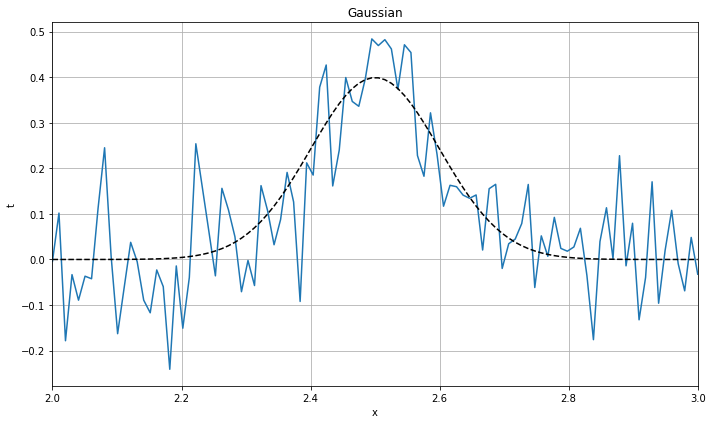

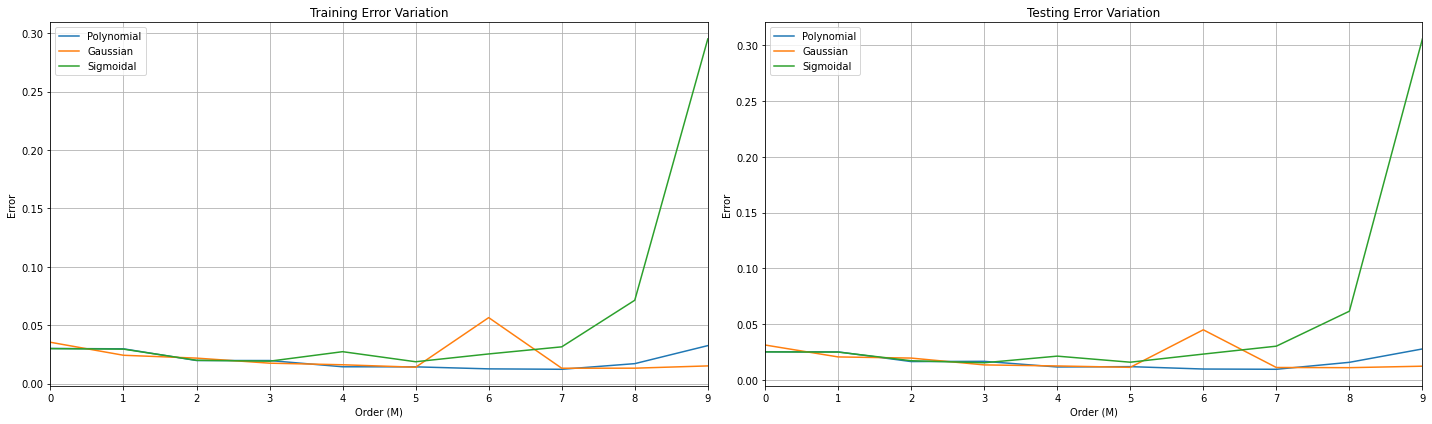

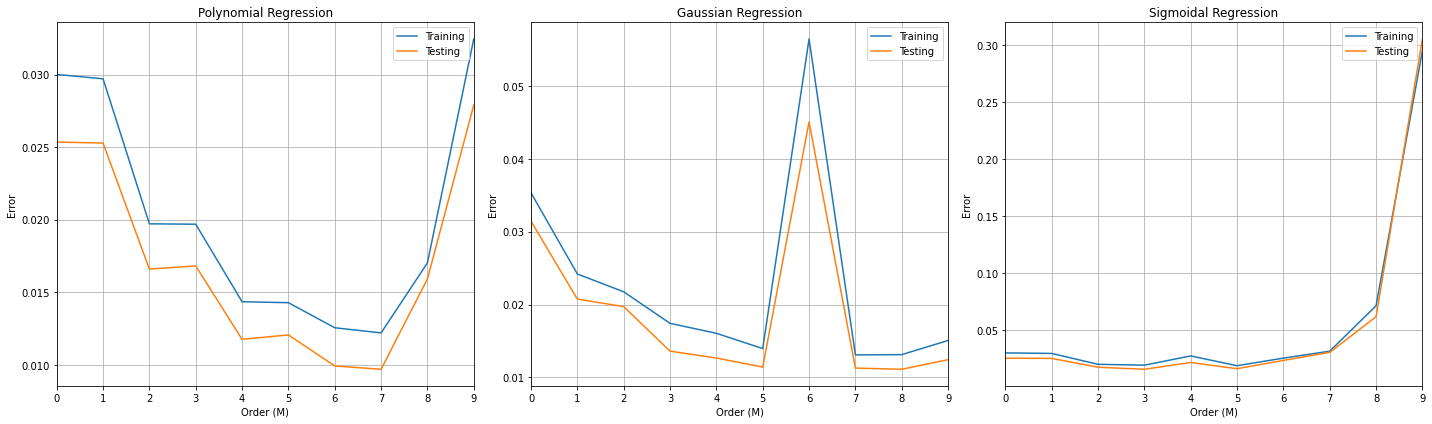

In [19]:
#Gaussian
numSamples = 100
mean = 0
std_dev = 0.1
#Generate data
xmin=2
xmax=3
xn = np.linspace(xmin,xmax,numSamples,True).reshape((numSamples,1))
en = np.random.normal(mean,std_dev,numSamples).reshape((numSamples,1))
yn = (1/(np.sqrt(2*np.pi)))*np.exp(-0.5*((xn-2.5)/0.1)**2)
tn = yn+en
plt.figure(figsize=(10,6))
plt.plot(xn,tn)
plt.plot(xn,yn,'k--')
plt.title("Gaussian")
plt.grid()
plt.ylabel("t")
plt.xlabel("x")
plt.xlim([xmin,xmax])
plt.show()
#Obtain train and test splits
#Take even samples for training and odd samples for testing
idx_tr = np.arange(0,numSamples,2)
X_train = xn[idx_tr]
Y_train = tn[idx_tr]
idx_test = np.arange(1,numSamples,2)
X_test = xn[idx_test]
Y_test = tn[idx_test]
#Iterate through range of M values
M_range=list(range(10))
TrainErrorBlock = []
TestErrorBlock = []
lamda=0
for M in M_range:
    #Fit Mth order polynomial using three kernels i.e {Polynomial,Gaussian,Sigmoid}
    #Polynomial
    #Fit Mth order polynomial i.e estimate optimal w
    w_est_p = KernelRegressionFit(X_train,Y_train,'Polynomial',M,lamda,xmin,xmax)
    #Predict errors on both training and testing data using estimated w
    trainErrP,testErrP = KernelRegressionPred(w_est_p,X_train,Y_train,X_test,Y_test,'Polynomial',M)

    #Gaussian
    #Fit Mth order polynomial i.e estimate optimal w
    w_est_g = KernelRegressionFit(X_train,Y_train,'Gaussian',M,lamda,xmin,xmax)
    #Predict errors on both training and testing data using estimated w
    trainErrG,testErrG = KernelRegressionPred(w_est_g,X_train,Y_train,X_test,Y_test,'Gaussian',M)

    #Logistic
    #Fit Mth order polynomial i.e estimate optimal w
    w_est_l = KernelRegressionFit(X_train,Y_train,'Sigmoid',M,lamda,xmin,xmax)
    #Predict errors on both training and testing data using estimated w
    trainErrL,testErrL = KernelRegressionPred(w_est_l,X_train,Y_train,X_test,Y_test,'Sigmoid',M)

    #Store them for plotting
    TrainErrorBlock.append([trainErrP,trainErrG,trainErrL])
    TestErrorBlock.append([testErrP,testErrG,testErrL])

TrainErrorBlock = np.asarray(TrainErrorBlock)
TestErrorBlock = np.asarray(TestErrorBlock)
#Plot training error vs polynomial order and testing error vs polynomial order for all the three different kernels
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title("Training Error Variation")
plt.plot(M_range,TrainErrorBlock[:,0],label="Polynomial")
plt.plot(M_range,TrainErrorBlock[:,1],label="Gaussian")
plt.plot(M_range,TrainErrorBlock[:,2],label="Sigmoidal")
plt.xlabel("Order (M)")
plt.ylabel("Error")
plt.grid()
plt.xticks(M_range)
plt.xlim([min(M_range),max(M_range)])
plt.legend()
plt.subplot(1,2,2)
plt.title("Testing Error Variation")
plt.plot(M_range,TestErrorBlock[:,0],label="Polynomial")
plt.plot(M_range,TestErrorBlock[:,1],label="Gaussian")
plt.plot(M_range,TestErrorBlock[:,2],label="Sigmoidal")
plt.xlabel("Order (M)")
plt.ylabel("Error")
plt.grid()
plt.xticks(M_range)
plt.xlim([min(M_range),max(M_range)])
plt.legend()
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('Polynomial Regression')
plt.plot(M_range,TrainErrorBlock[:,0],label="Training")
plt.plot(M_range,TestErrorBlock[:,0],label="Testing")
plt.xlabel("Order (M)")
plt.ylabel("Error")
plt.grid()
plt.xticks(M_range)
plt.xlim([min(M_range),max(M_range)])
plt.legend()
plt.subplot(1,3,2)
plt.title('Gaussian Regression')
plt.plot(M_range,TrainErrorBlock[:,1],label="Training")
plt.plot(M_range,TestErrorBlock[:,1],label="Testing")
plt.xlabel("Order (M)")
plt.ylabel("Error")
plt.grid()
plt.xticks(M_range)
plt.xlim([min(M_range),max(M_range)])
plt.legend()
plt.subplot(1,3,3)
plt.title('Sigmoidal Regression')
plt.plot(M_range,TrainErrorBlock[:,2],label="Training")
plt.plot(M_range,TestErrorBlock[:,2],label="Testing")
plt.xlabel("Order (M)")
plt.ylabel("Error")
plt.grid()
plt.xticks(M_range)
plt.xlim([min(M_range),max(M_range)])
plt.legend()
plt.show()

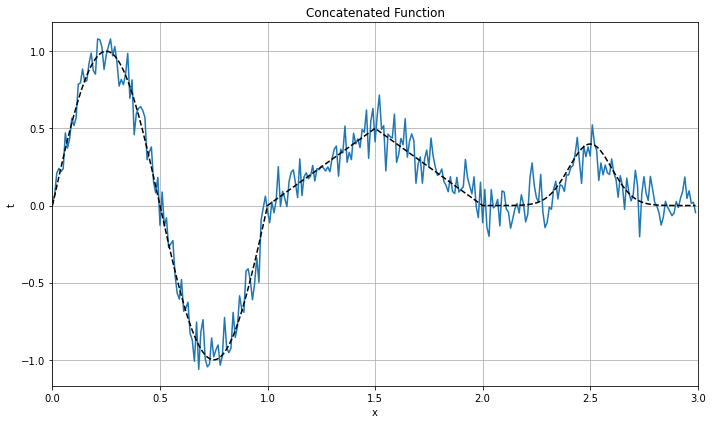

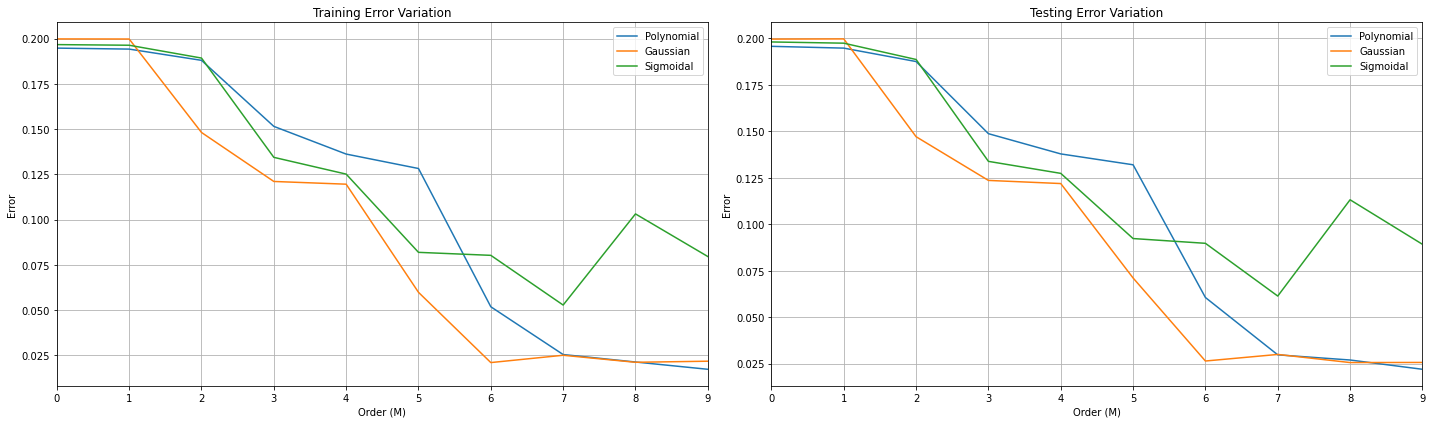

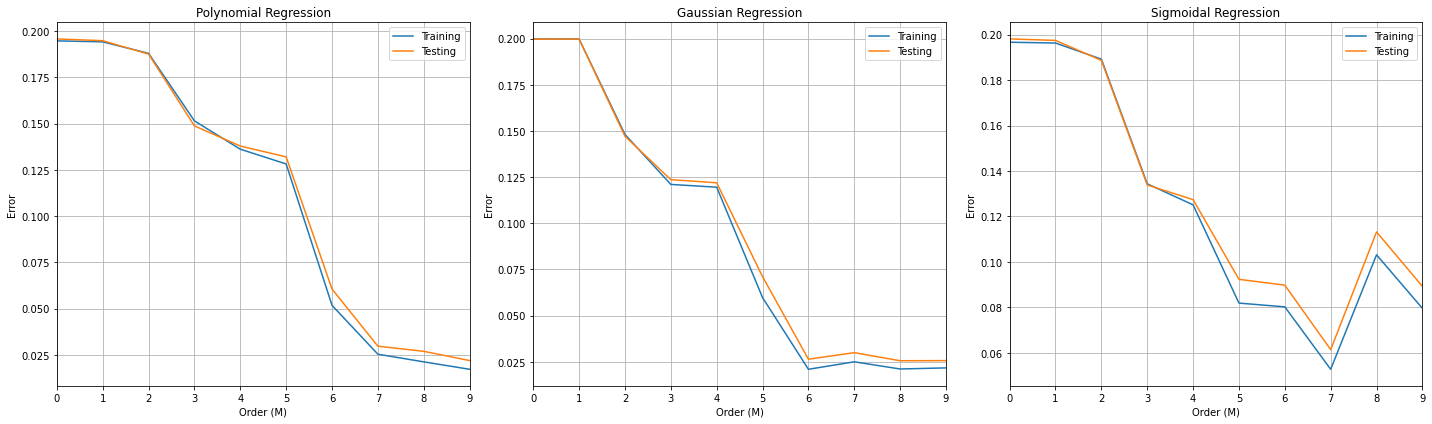

In [20]:
numSamples1 = 100
mean1 = 0
std_dev1 = 0.1
#Generate data
xmin1=0
xmax1=1
xn1 = np.linspace(xmin1,xmax1,numSamples1,False).reshape((numSamples1,1))
en1 = np.random.normal(mean1,std_dev1,numSamples1).reshape((numSamples1,1))
yn1 = np.sin(2*np.pi*xn1).reshape((numSamples1,1))
tn1 = yn1+en1
#Obtain train and test splits
#Take even samples for training and odd samples for testing
idx_tr1 = np.arange(0,numSamples1,2)
X_train1 = xn1[idx_tr1]
Y_train1 = tn1[idx_tr1]
idx_test1 = np.arange(1,numSamples1,2)
X_test1 = xn1[idx_test1]
Y_test1 = tn1[idx_test1]
#Triangle
numSamples2 = 100
mean2 = 0
std_dev2 = 0.1
#Generate data
xmin2=1
xmax2=2
xn2 = np.linspace(xmin2,xmax2,numSamples2,False).reshape((numSamples2,1))
en2 = np.random.normal(mean2,std_dev2,numSamples2).reshape((numSamples2,1))
yn2 = np.zeros((numSamples2,1))
yn2[0:int(numSamples2/2),:] = xn2[0:int(numSamples2/2),:]-1
yn2[int(numSamples2/2):,:] = 2-xn2[int(numSamples2/2):,:]
tn2 = yn2+en2
#Gaussian
numSamples3 = 100
mean3 = 0
std_dev3 = 0.1
#Generate data
xmin3=2
xmax3=3
xn3 = np.linspace(xmin3,xmax3,numSamples3,False).reshape((numSamples3,1))
en3 = np.random.normal(mean3,std_dev3,numSamples3).reshape((numSamples3,1))
yn3 = (1/(np.sqrt(2*np.pi)))*np.exp(-0.5*((xn3-(xmax3+xmin3)/2)/std_dev3)**2)
tn3 = yn3+en3
xn = np.vstack((xn1,xn2,xn3))
yn = np.vstack((yn1,yn2,yn3))
tn = np.vstack((tn1,tn2,tn3))
plt.figure(figsize=(10,6))
plt.plot(xn,tn)
plt.plot(xn,yn,'k--')
plt.title("Concatenated Function")
plt.grid()
plt.ylabel("t")
plt.xlabel("x")
plt.xlim([xmin1,xmax3])
plt.show()
#Obtain train and test splits
#Take even samples for training and odd samples for testing
numSamples = numSamples1+numSamples2+numSamples3
idx_tr = np.arange(0,numSamples,2)
X_train = xn[idx_tr]
Y_train = tn[idx_tr]
idx_test = np.arange(1,numSamples,2)
X_test = xn[idx_test]
Y_test = tn[idx_test]
#Iterate through range of M values
M_range=list(range(10))
TrainErrorBlock = []
TestErrorBlock = []
lamda=0
xmin=min(xmin1,xmin2,xmin3)
xmax = max(xmax1,xmax2,xmax3)
for M in M_range:
    #Fit Mth order polynomial using three kernels i.e {Polynomial,Gaussian,Sigmoid}
    #Polynomial
    #Fit Mth order polynomial i.e estimate optimal w
    w_est_p = KernelRegressionFit(X_train,Y_train,'Polynomial',M,lamda,xmin,xmax)
    #Predict errors on both training and testing data using estimated w
    trainErrP,testErrP = KernelRegressionPred(w_est_p,X_train,Y_train,X_test,Y_test,'Polynomial',M)

    #Gaussian
    #Fit Mth order polynomial i.e estimate optimal w
    w_est_g = KernelRegressionFit(X_train,Y_train,'Gaussian',M,lamda,xmin,xmax)
    #Predict errors on both training and testing data using estimated w
    trainErrG,testErrG = KernelRegressionPred(w_est_g,X_train,Y_train,X_test,Y_test,'Gaussian',M)

    #Logistic
    #Fit Mth order polynomial i.e estimate optimal w
    w_est_l = KernelRegressionFit(X_train,Y_train,'Sigmoid',M,lamda,xmin,xmax)
    #Predict errors on both training and testing data using estimated w
    trainErrL,testErrL = KernelRegressionPred(w_est_l,X_train,Y_train,X_test,Y_test,'Sigmoid',M)

    #Store them for plotting
    TrainErrorBlock.append([trainErrP,trainErrG,trainErrL])
    TestErrorBlock.append([testErrP,testErrG,testErrL])

TrainErrorBlock = np.asarray(TrainErrorBlock)
TestErrorBlock = np.asarray(TestErrorBlock)
#Plot training error vs polynomial order and testing error vs polynomial order for all the three different kernels
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title("Training Error Variation")
plt.plot(M_range,TrainErrorBlock[:,0],label="Polynomial")
plt.plot(M_range,TrainErrorBlock[:,1],label="Gaussian")
plt.plot(M_range,TrainErrorBlock[:,2],label="Sigmoidal")
plt.xlabel("Order (M)")
plt.ylabel("Error")
plt.grid()
plt.xticks(M_range)
plt.xlim([min(M_range),max(M_range)])
plt.legend()
plt.subplot(1,2,2)
plt.title("Testing Error Variation")
plt.plot(M_range,TestErrorBlock[:,0],label="Polynomial")
plt.plot(M_range,TestErrorBlock[:,1],label="Gaussian")
plt.plot(M_range,TestErrorBlock[:,2],label="Sigmoidal")
plt.xlabel("Order (M)")
plt.ylabel("Error")
plt.grid()
plt.xticks(M_range)
plt.xlim([min(M_range),max(M_range)])
plt.legend()
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('Polynomial Regression')
plt.plot(M_range,TrainErrorBlock[:,0],label="Training")
plt.plot(M_range,TestErrorBlock[:,0],label="Testing")
plt.xlabel("Order (M)")
plt.ylabel("Error")
plt.grid()
plt.xticks(M_range)
plt.xlim([min(M_range),max(M_range)])
plt.legend()
plt.subplot(1,3,2)
plt.title('Gaussian Regression')
plt.plot(M_range,TrainErrorBlock[:,1],label="Training")
plt.plot(M_range,TestErrorBlock[:,1],label="Testing")
plt.xlabel("Order (M)")
plt.ylabel("Error")
plt.grid()
plt.xticks(M_range)
plt.xlim([min(M_range),max(M_range)])
plt.legend()
plt.subplot(1,3,3)
plt.title('Sigmoidal Regression')
plt.plot(M_range,TrainErrorBlock[:,2],label="Training")
plt.plot(M_range,TestErrorBlock[:,2],label="Testing")
plt.xlabel("Order (M)")
plt.ylabel("Error")
plt.grid()
plt.xticks(M_range)
plt.xlim([min(M_range),max(M_range)])
plt.legend()
plt.show()

**Observations and Comments :**


*   The general trend is seen that the training error decreases whereas the testing error increases as the order used for fitting increases.
*   Polyomial Kernel is seen to perform good in general on all type of functions. The gaussian function is modelled good by the gaussian kernel but the testing error again rises up.
*   Sigmoidal Kernels are observed to maintaing consistenecy in modelling independent of the function to be mapped.
*   For overall function, the variation is mapped effectively polynomial>gaussian>sigmoidal kernels in general.



<b> Part - (4) : Understanding online training  </b>

(a). Repeat 3(a) and 3(b) using stochastic gradient descent for weight update.Study the effect of step size η on convergence of the weights, and compare them to those obtained using closed form expressions in 3.  Plot the mse as a  function  of  iterations. 

(b). Study the effect of batch size on the speed of convergence

(c). Report all your observations

In [21]:
########################################
#Repeat 3(a) and 3(b) using stochastic gradient descent for weight update ( plot required results )
########################################
def mse(X1,X2):
    return np.sum((X1-X2)**2)/len(X1)

def gradient(w,phi,t):
    y = phi@w
    e = t-y
    c = np.multiply(e,phi)
    grad = np.sum(c)/len(c)
    return grad
#Complete the function
def OnlineTraining(X_train,Y_train,kernelType,M,Epochs=3,BatchSize=100,stepSize= 0.01):
    #kernelType : {Polynomial,Gaussian,Sigmoid}
    if kernelType=='Polynomial':
        Phi_X_train = phi_x(X_train,M)
    elif kernelType=='Gaussian':
        h=1
        xmin = X_train.min()
        xmin = X_train.max()
        Phi_X_train = GaussianKernel(X_train,M,h,xmin,xmax)
    # elif kernelType=='Sigmoid':
    else :
        s=1
        xmin = X_train.min()
        xmin = X_train.max()
        Phi_X_train = LogisticKernel(X_train,M,s,xmin,xmax)
    
    #Initialize the weights
    w_est = np.random.randn(M+1).reshape((M+1,1))
    W_hist = []
    Err_hist = []
    Err_end_hist = []
    #Initialize the necessary variables
    neta = stepSize
    numEpochs = Epochs
    L = len(X_train)
    numBatches = int(L/BatchSize)
    itr = 0
    #Iterate through epochs
    for epoch in range(numEpochs):
        idx = np.arange(L)
        np.random.shuffle(idx)
        #Iterate through the batches
        for i in range(numBatches):
            #Initialize the necessary variables
            #Get a batch of data
            phi = Phi_X_train[idx[i*BatchSize:(i+1)*BatchSize]]
            t = Y_train[idx[i*BatchSize:(i+1)*BatchSize]]
            #Iterate through the data points of obtained batch
            #Obtain kernel representation
            #Compute the gradient of weight's
            #Compute the running mean of the weights gradients for the batch update
            grad = gradient(w_est,phi,t)
            #Update the weights using mean gradient, consider using reasonable stepSize
            w_old = w_est
            w_est = w_est + neta*grad
            W_hist.append(error(w_est,w_old))
            Err_hist.append(mse(phi@w_est,t))
            itr+=1
        Err_end_hist.append(mse(phi@w_est,t))
    # Err_hist.reverse()
    # W_hist.reverse()
    return w_est,Err_hist,W_hist


def OnlinePred(w_est,X_train,Y_train,X_test,Y_test,kernelType):
    #kernelType : {Polynomial,Gaussian,Sigmoid}
    if kernelType=='Polynomial':
        Phi_X_train = phi_x(X_train,M)
    elif kernelType=='Gaussian':
        h=1
        xmin = X_train.min()
        xmin = X_train.max()
        Phi_X_train = GaussianKernel(X_train,M,h,xmin,xmax)
    elif kernelType=='Sigmoid':
        s=1
        xmin = X_train.min()
        xmin = X_train.max()
        Phi_X_train = LogisticKernel(X_train,M,s,xmin,xmax)
    Y_train_est = Phi_X_train@w_est
    Phi_X_test = phi_x(X_test,M)
    Y_test_est = Phi_X_test@w_est
    # print(Y_train.shape,Y_train_est.shape)
    TrainError = mse(Y_train_est,Y_train)
    TestError = mse(Y_test_est,Y_test)
    return TrainError,TestError

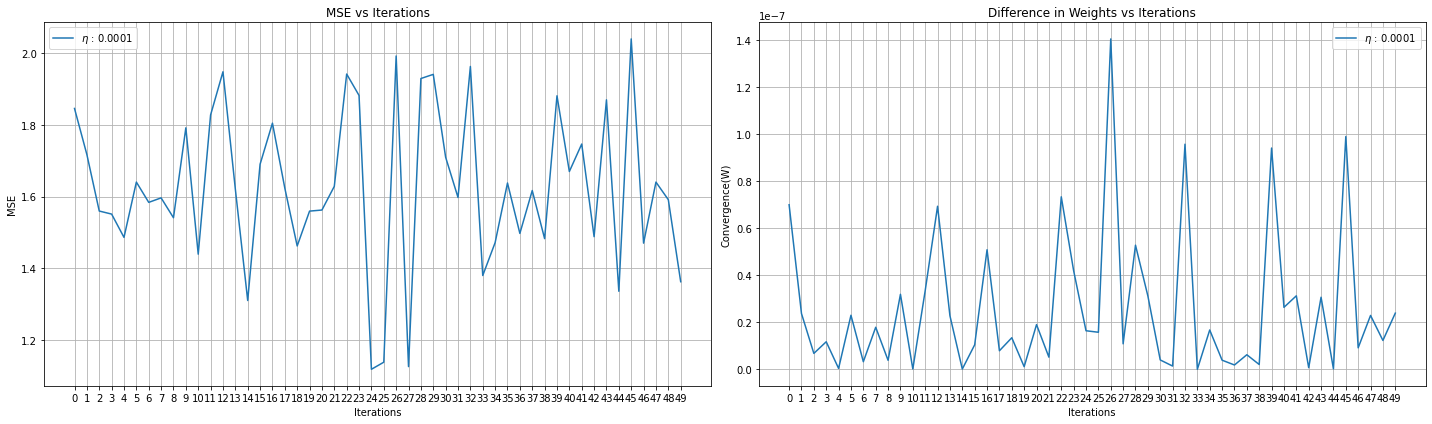

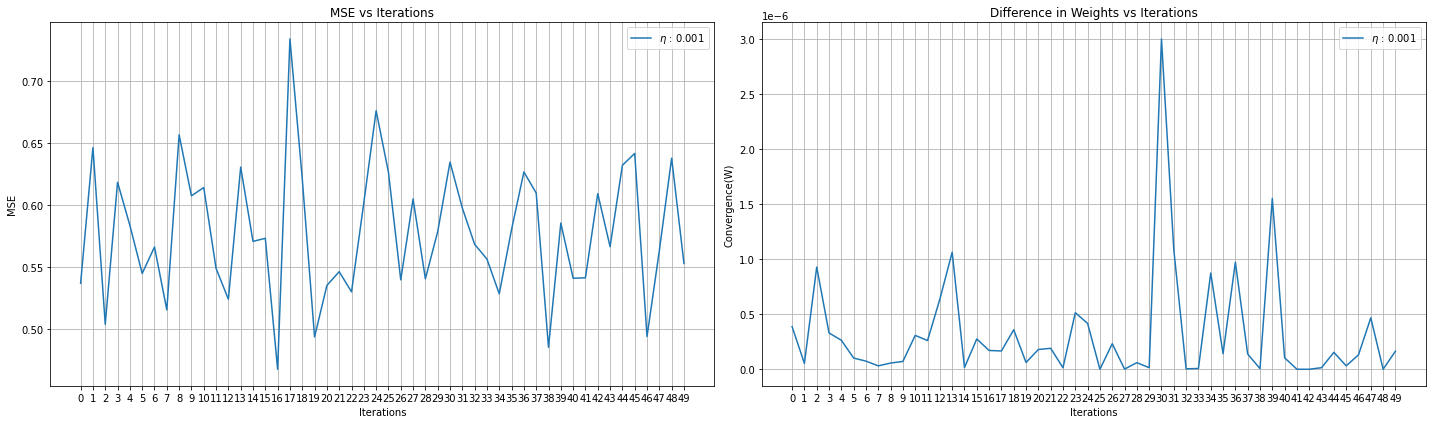

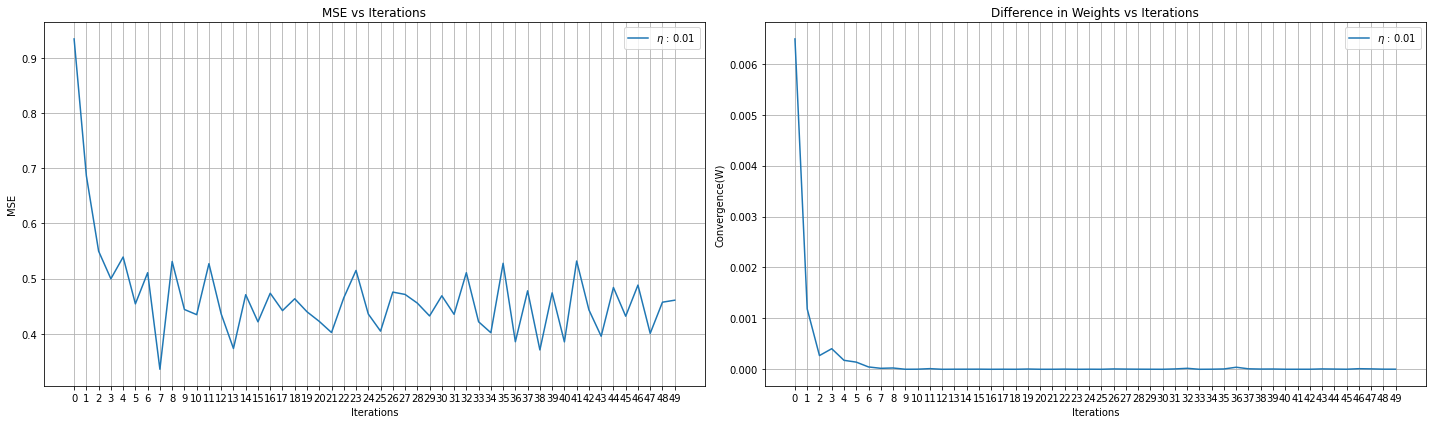

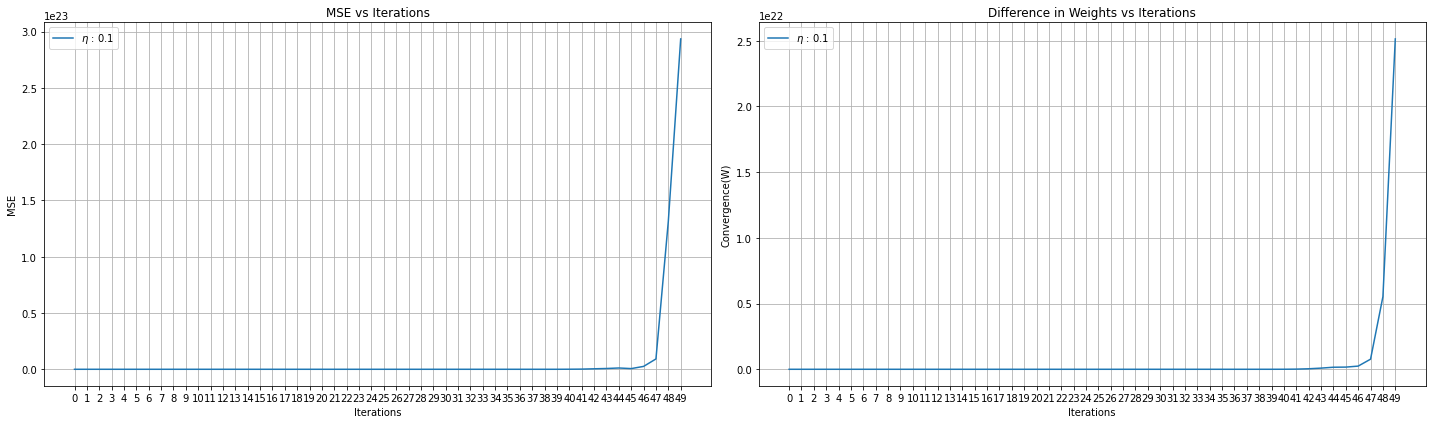

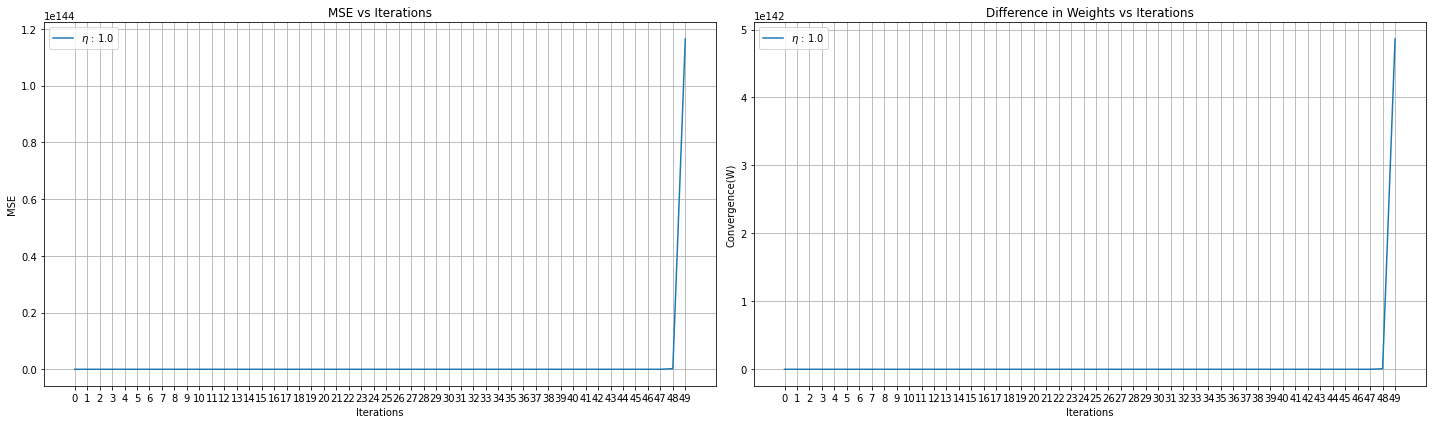

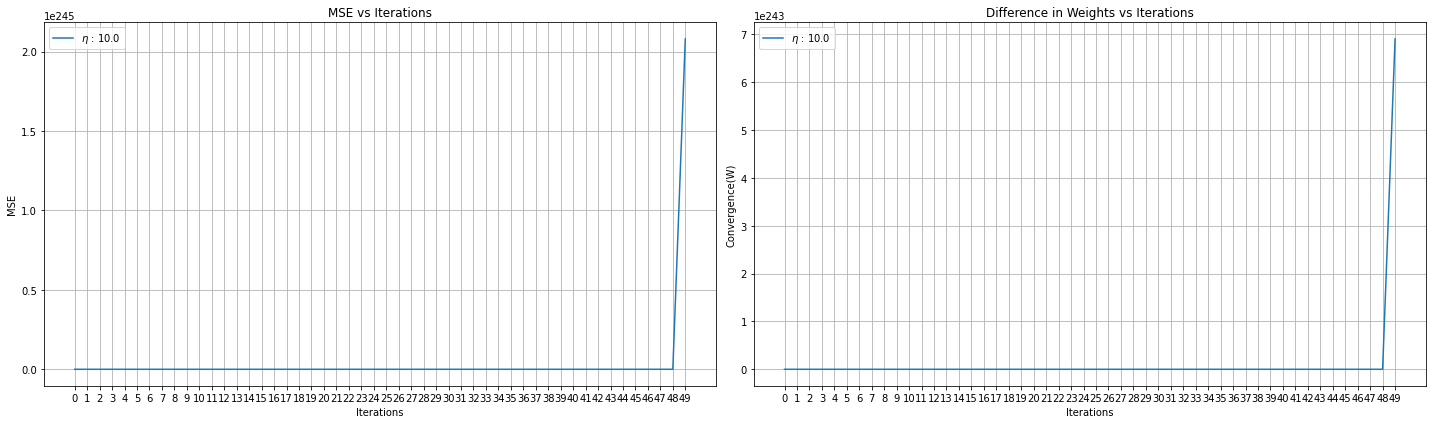

In [22]:
#Evalate models
########################################
#Study the effect of stepSize on the convergence of weights ( plot required results )
########################################
# Simple Sinusoid
numSamples = 1000
mean = 0
std_dev = 0.1
#Generate data
xn = np.linspace(0,1,numSamples,True)
en = np.random.normal(mean,std_dev,numSamples)
tn = np.sin(2*np.pi*xn)+en
#Obtain train and test splits
#Take even samples for training and odd samples for testing
idx_tr = np.arange(0,numSamples,2)
X_train = xn[idx_tr].reshape((len(idx_tr),1))
Y_train = tn[idx_tr].reshape((len(idx_tr),1))
idx_test = np.arange(1,numSamples,2)
X_test = xn[idx_test].reshape((len(idx_test),1))
Y_test = tn[idx_test].reshape((len(idx_test),1))
M = 20 
#Polynomial Fitting
stepSizes = 10.0**np.arange(-4,2,1)
for step in stepSizes:
    fig = plt.figure(figsize=(20,6))
    w_opt,Err_hist,W_hist = OnlineTraining(X_train,Y_train,'Polynomial',M,Epochs=10,BatchSize=100,stepSize=step)
    itr = len(Err_hist)
    plt.subplot(1,2,1)
    plt.plot(np.arange(itr),Err_hist,label="$\eta$ : "+str(step))
    plt.title('MSE vs Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('MSE')
    plt.legend()
    plt.xticks(np.arange(itr))
    plt.grid()
    plt.subplot(1,2,2)
    plt.plot(np.arange(itr),W_hist,label="$\eta$ : "+str(step))
    plt.title('Difference in Weights vs Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Convergence(W)')
    plt.legend()
    plt.xticks(np.arange(itr))
    plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in square
  
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


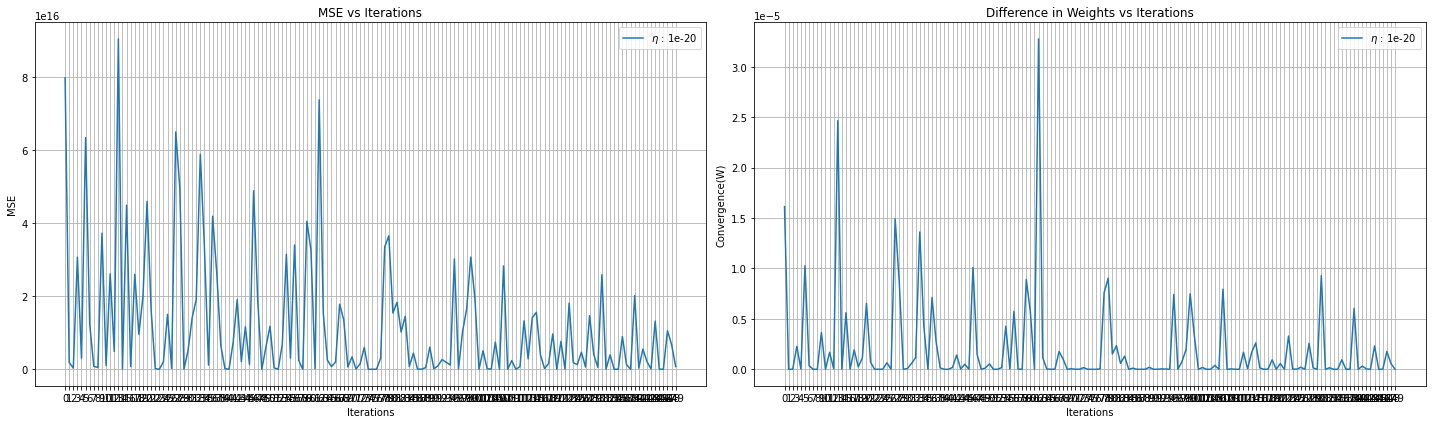

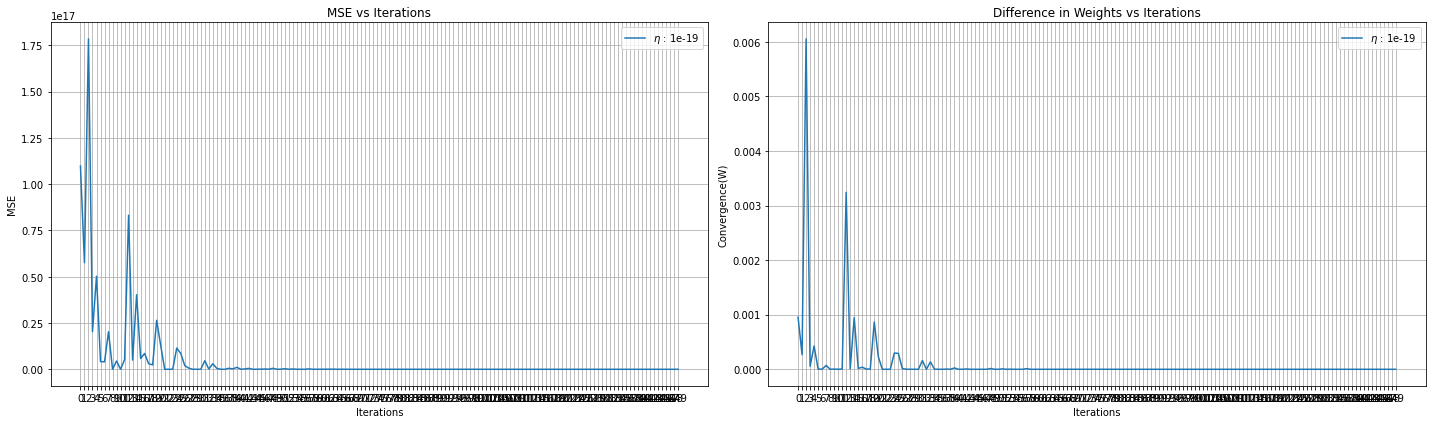

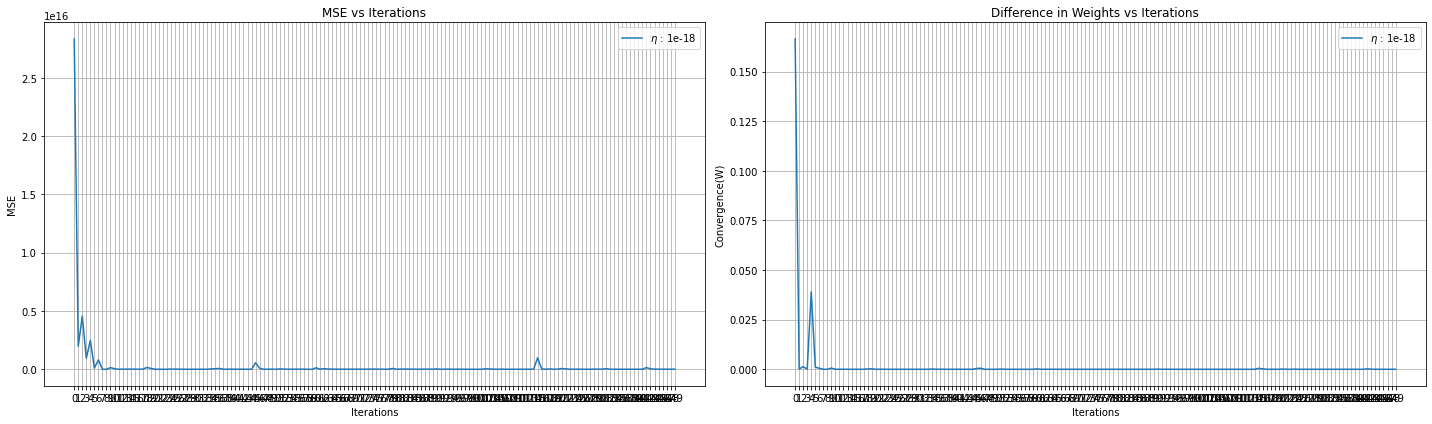

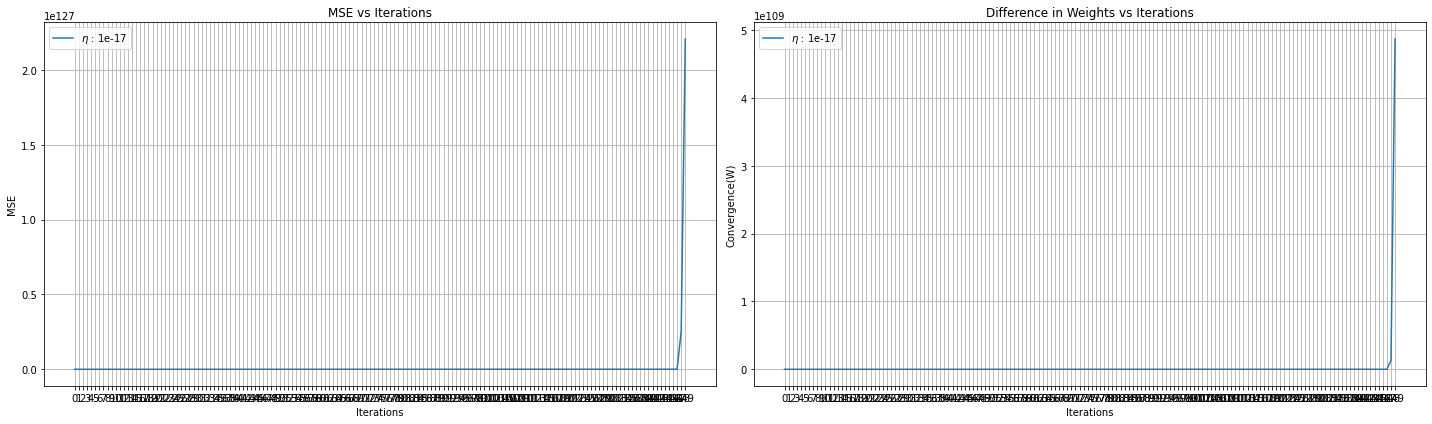

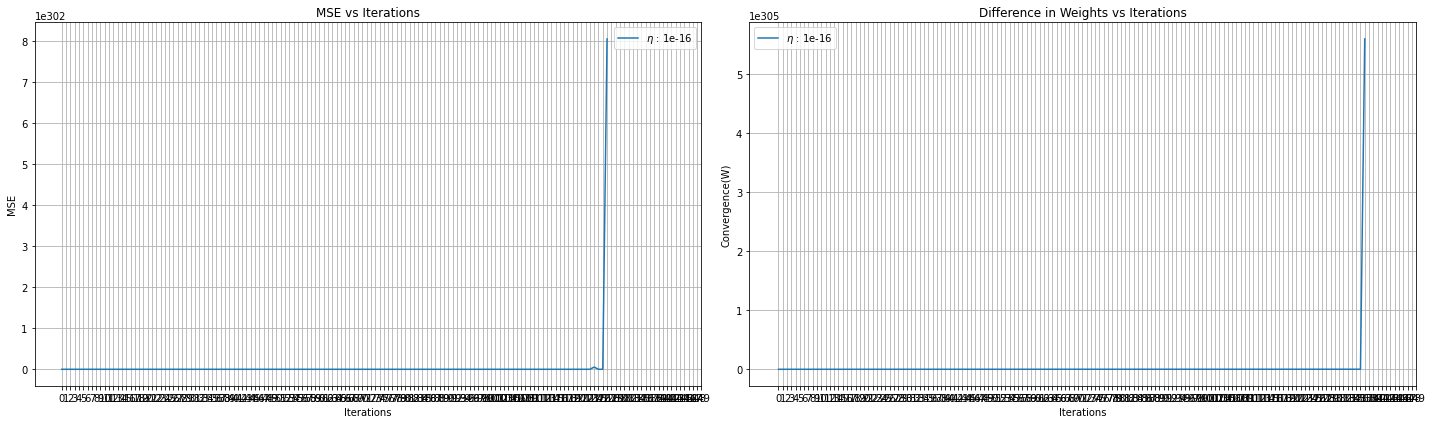

In [23]:
# Concatenated Function
numSamples1 = 100
mean1 = 0
std_dev1 = 0.1
#Generate data
xmin1=0
xmax1=1
xn1 = np.linspace(xmin1,xmax1,numSamples1,False).reshape((numSamples1,1))
en1 = np.random.normal(mean1,std_dev1,numSamples1).reshape((numSamples1,1))
yn1 = np.sin(2*np.pi*xn1).reshape((numSamples1,1))
tn1 = yn1+en1
#Obtain train and test splits
#Take even samples for training and odd samples for testing
idx_tr1 = np.arange(0,numSamples1,2)
X_train1 = xn1[idx_tr1]
Y_train1 = tn1[idx_tr1]
idx_test1 = np.arange(1,numSamples1,2)
X_test1 = xn1[idx_test1]
Y_test1 = tn1[idx_test1]
#Triangle
numSamples2 = 100
mean2 = 0
std_dev2 = 0.1
#Generate data
xmin2=1
xmax2=2
xn2 = np.linspace(xmin2,xmax2,numSamples2,False).reshape((numSamples2,1))
en2 = np.random.normal(mean2,std_dev2,numSamples2).reshape((numSamples2,1))
yn2 = np.zeros((numSamples2,1))
yn2[0:int(numSamples2/2),:] = xn2[0:int(numSamples2/2),:]-1
yn2[int(numSamples2/2):,:] = 2-xn2[int(numSamples2/2):,:]
tn2 = yn2+en2
#Gaussian
numSamples3 = 100
mean3 = 0
std_dev3 = 0.1
#Generate data
xmin3=2
xmax3=3
xn3 = np.linspace(xmin3,xmax3,numSamples3,False).reshape((numSamples3,1))
en3 = np.random.normal(mean3,std_dev3,numSamples3).reshape((numSamples3,1))
yn3 = (1/(np.sqrt(2*np.pi)))*np.exp(-0.5*((xn3-(xmax3+xmin3)/2)/std_dev3)**2)
tn3 = yn3+en3
xn = np.vstack((xn1,xn2,xn3))
yn = np.vstack((yn1,yn2,yn3))
tn = np.vstack((tn1,tn2,tn3))
#Take even samples for training and odd samples for testing
numSamples = numSamples1+numSamples2+numSamples3
idx_tr = np.arange(0,numSamples,2)
X_train = xn[idx_tr]
Y_train = tn[idx_tr]
idx_test = np.arange(1,numSamples,2)
X_test = xn[idx_test]
Y_test = tn[idx_test]
#Iterate through range of M values
M_range=list(range(10))
TrainErrorBlock = []
TestErrorBlock = []
lamda=0
xmin=min(xmin1,xmin2,xmin3)
xmax = max(xmax1,xmax2,xmax3)
#Obtain train and test splits
#Take even samples for training and odd samples for testing
idx_tr = np.arange(0,numSamples,2)
X_train = xn[idx_tr].reshape((len(idx_tr),1))
Y_train = tn[idx_tr].reshape((len(idx_tr),1))
idx_test = np.arange(1,numSamples,2)
X_test = xn[idx_test].reshape((len(idx_test),1))
Y_test = tn[idx_test].reshape((len(idx_test),1))
M = 20 

#Polynomial Fitting
stepSizes = 10.0**np.arange(-20,-15,1)
for step in stepSizes:
    fig = plt.figure(figsize=(20,6))
    w_opt,Err_hist,W_hist = OnlineTraining(X_train,Y_train,'Polynomial',M,Epochs=10,BatchSize=10,stepSize=step)
    itr = len(Err_hist)
    plt.subplot(1,2,1)
    plt.plot(np.arange(itr),Err_hist,label="$\eta$ : "+str(step))
    plt.title('MSE vs Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('MSE')
    plt.legend()
    plt.xticks(np.arange(itr))
    plt.grid()
    plt.subplot(1,2,2)
    plt.plot(np.arange(itr),W_hist,label="$\eta$ : "+str(step))
    plt.title('Difference in Weights vs Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Convergence(W)')
    plt.legend()
    plt.xticks(np.arange(itr))
    plt.grid()
plt.show()





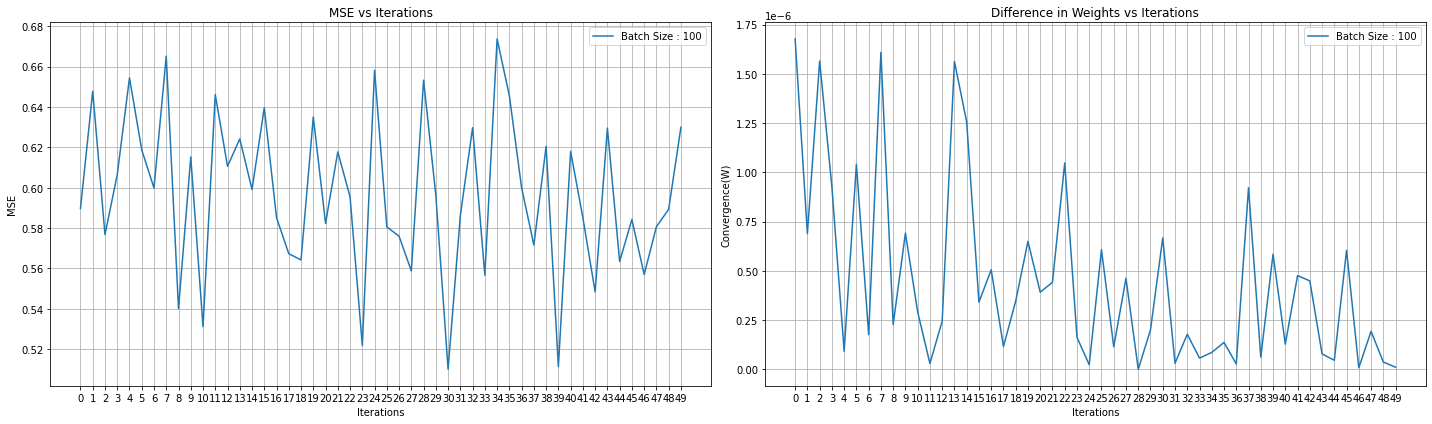

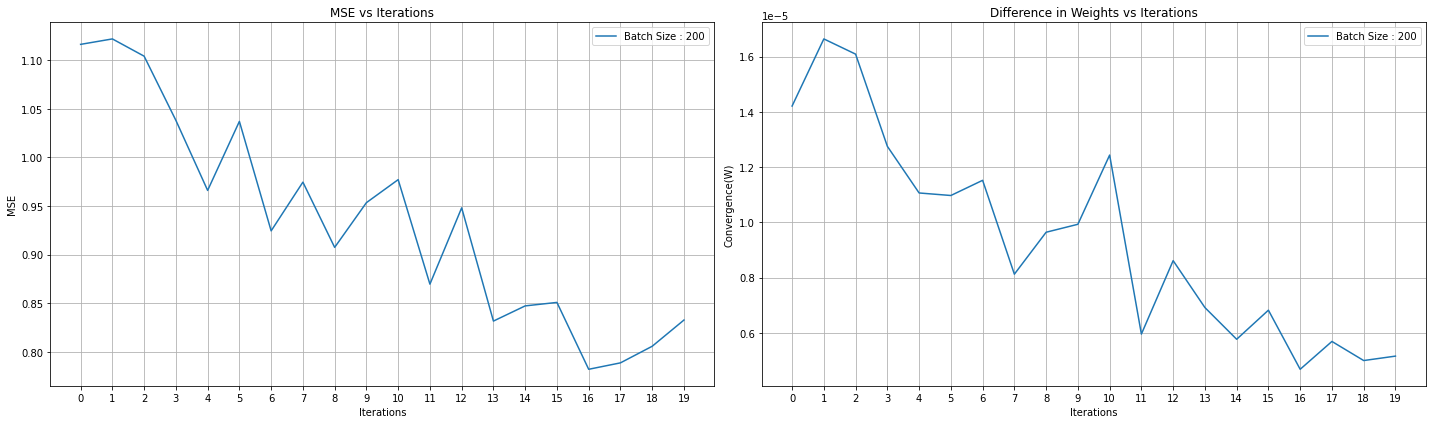

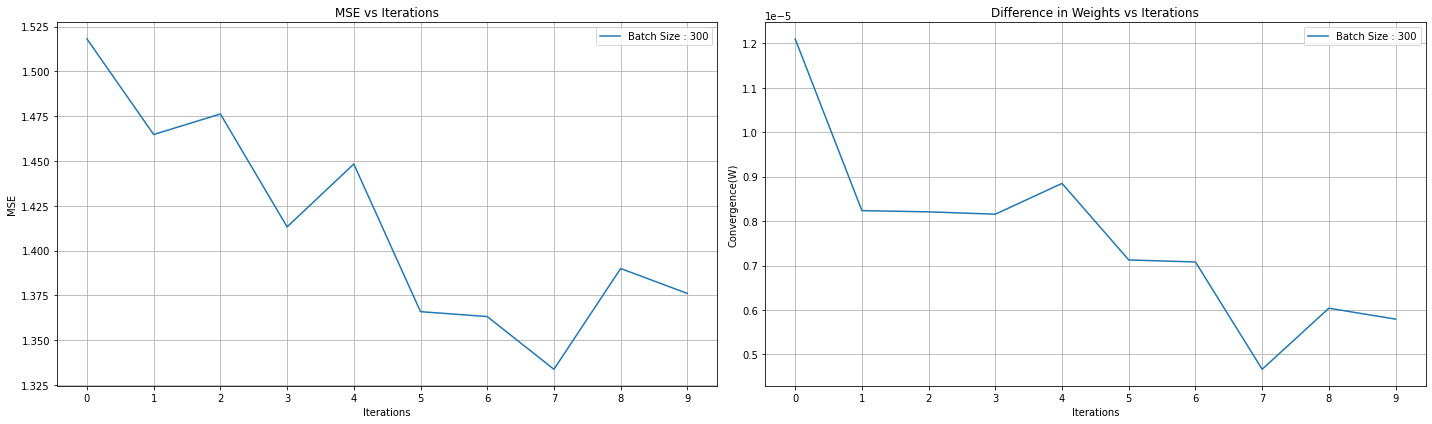

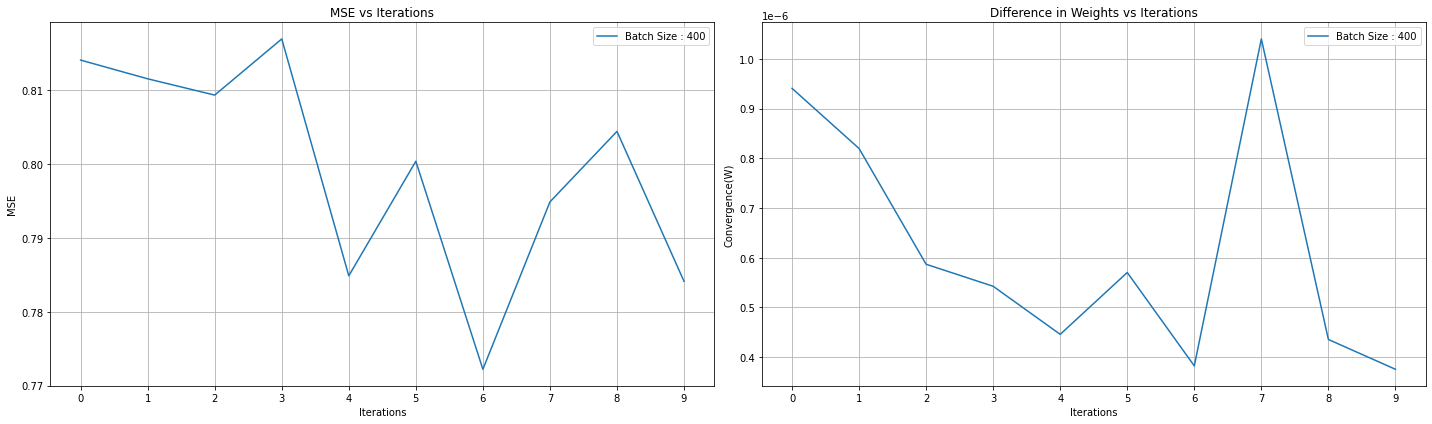

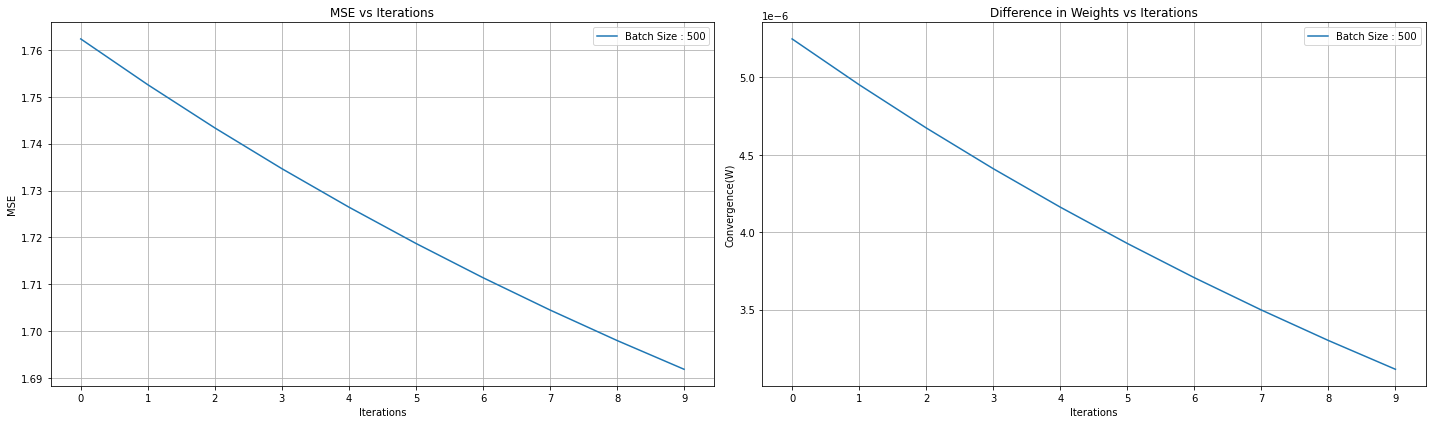

In [24]:
########################################
#Study the effect of batchsize on the speed of convergence ( plot required results )
########################################
#Model-1 : Simple Sinusoid
# Simple Sinusoid
numSamples = 1000
mean = 0
std_dev = 0.1
#Generate data
xn = np.linspace(0,1,numSamples,True)
en = np.random.normal(mean,std_dev,numSamples)
tn = np.sin(2*np.pi*xn)+en
#Obtain train and test splits
#Take even samples for training and odd samples for testing
idx_tr = np.arange(0,numSamples,2)
X_train = xn[idx_tr].reshape((len(idx_tr),1))
Y_train = tn[idx_tr].reshape((len(idx_tr),1))
idx_test = np.arange(1,numSamples,2)
X_test = xn[idx_test].reshape((len(idx_test),1))
Y_test = tn[idx_test].reshape((len(idx_test),1))
M = 20 
#Batch Sizes 
BatchSizes = np.arange(100,501,100)
#Polynomial Fitting
step = 0.001
for bSize in BatchSizes:
    fig = plt.figure(figsize=(20,6))
    w_opt,Err_hist,W_hist = OnlineTraining(X_train,Y_train,'Polynomial',M,Epochs=10,BatchSize=bSize,stepSize=step)
    itr = len(Err_hist)
    plt.subplot(1,2,1)
    plt.plot(np.arange(itr),Err_hist,label="Batch Size : "+str(bSize))
    plt.title('MSE vs Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('MSE')
    plt.legend()
    plt.xticks(np.arange(itr))
    plt.grid()
    plt.subplot(1,2,2)
    plt.plot(np.arange(itr),W_hist,label="Batch Size : "+str(bSize))
    plt.title('Difference in Weights vs Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Convergence(W)')
    plt.legend()
    plt.xticks(np.arange(itr))
    plt.grid()
plt.show()

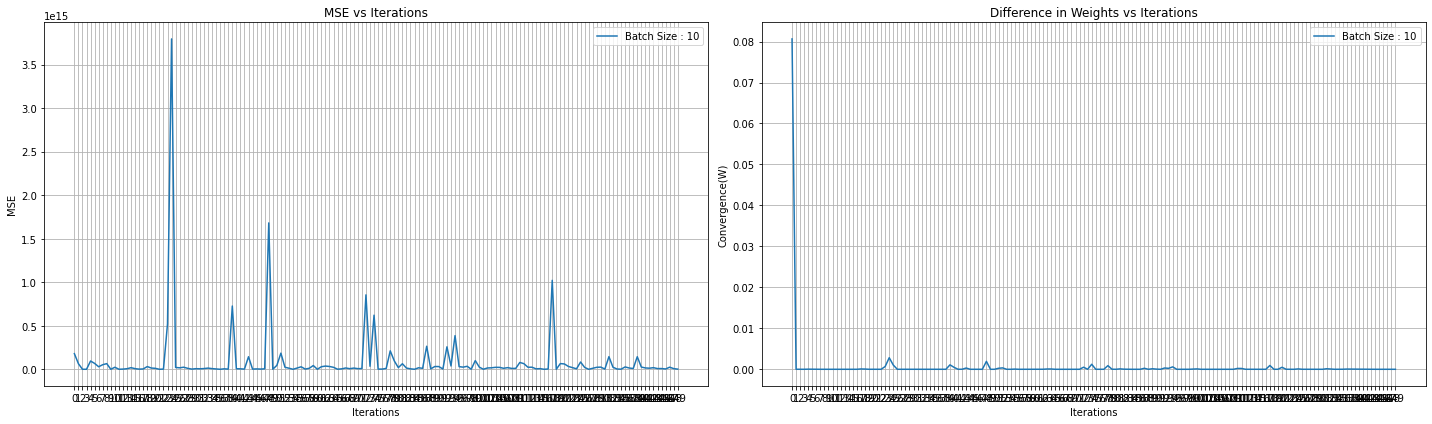

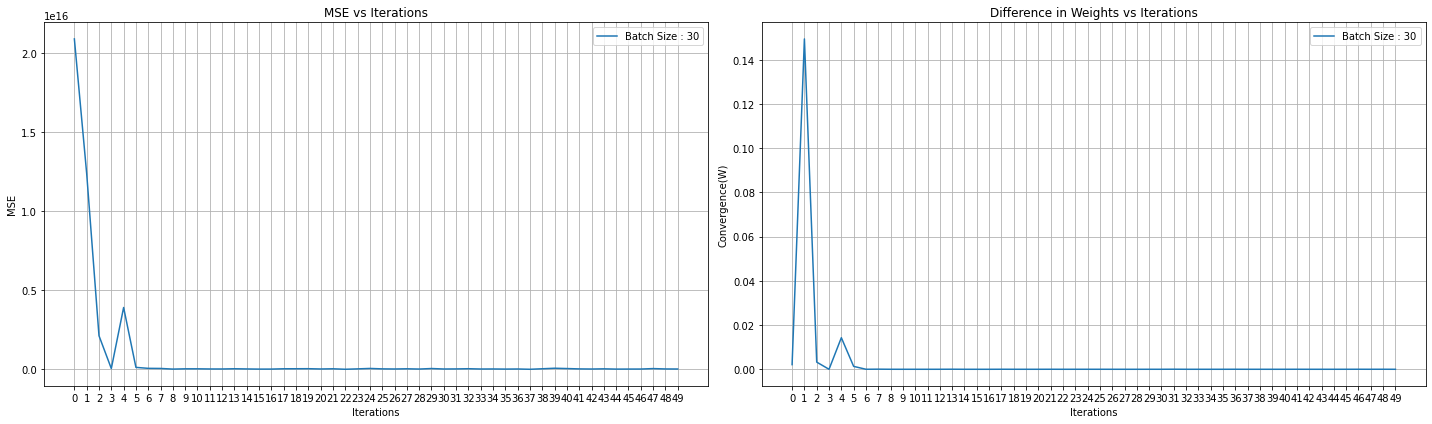

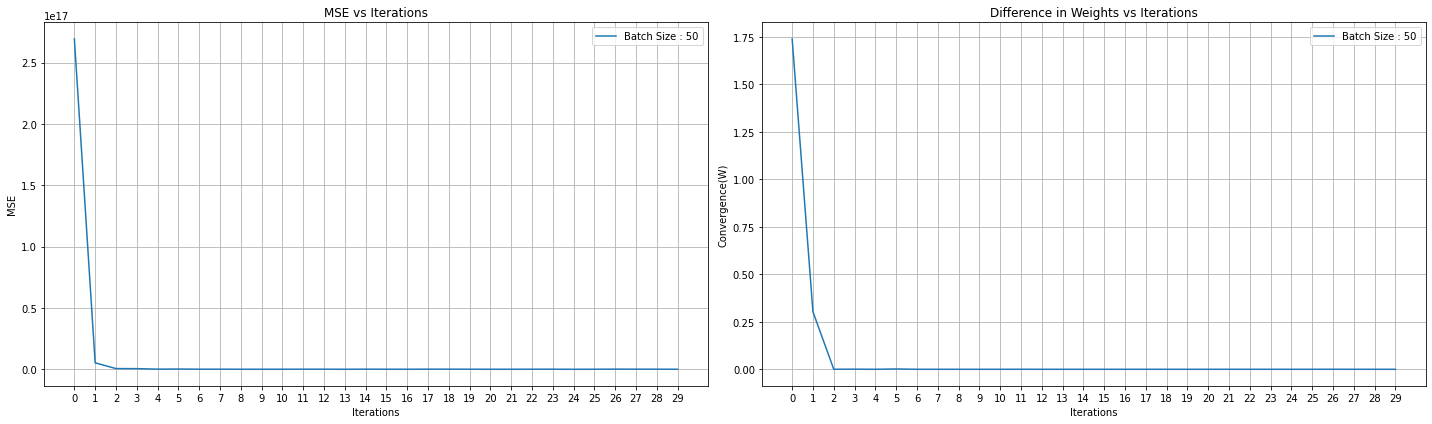

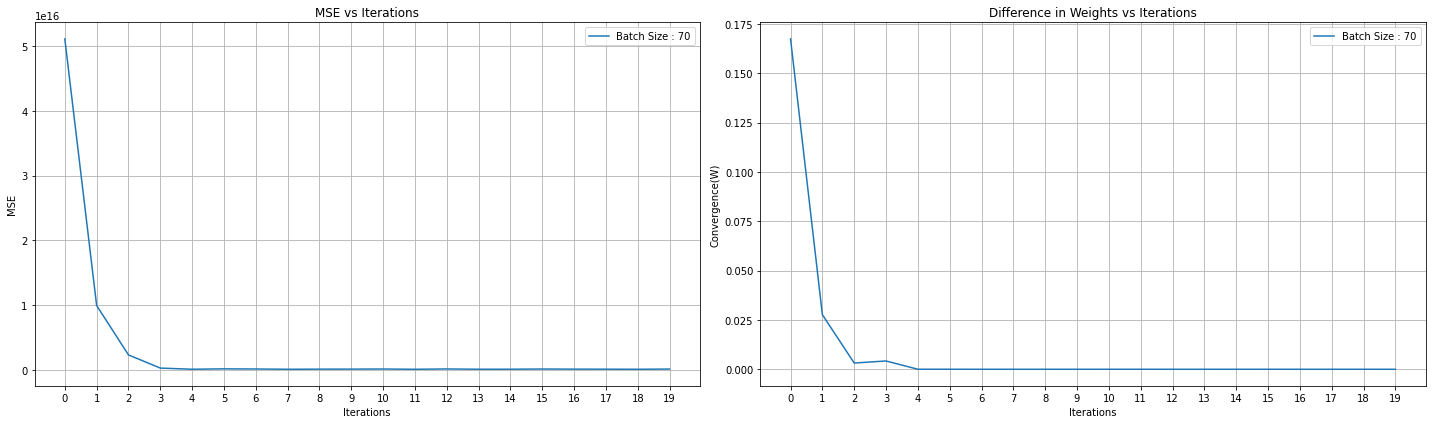

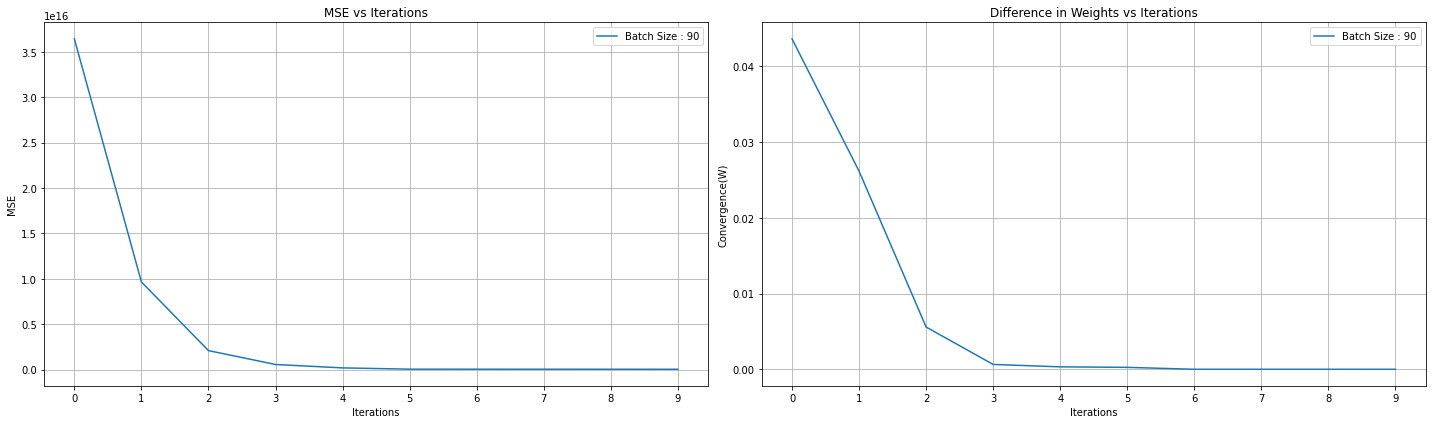

In [25]:
# Concatenated Function
numSamples1 = 100
mean1 = 0
std_dev1 = 0.1
#Generate data
xmin1=0
xmax1=1
xn1 = np.linspace(xmin1,xmax1,numSamples1,False).reshape((numSamples1,1))
en1 = np.random.normal(mean1,std_dev1,numSamples1).reshape((numSamples1,1))
yn1 = np.sin(2*np.pi*xn1).reshape((numSamples1,1))
tn1 = yn1+en1
#Obtain train and test splits
#Take even samples for training and odd samples for testing
idx_tr1 = np.arange(0,numSamples1,2)
X_train1 = xn1[idx_tr1]
Y_train1 = tn1[idx_tr1]
idx_test1 = np.arange(1,numSamples1,2)
X_test1 = xn1[idx_test1]
Y_test1 = tn1[idx_test1]
#Triangle
numSamples2 = 100
mean2 = 0
std_dev2 = 0.1
#Generate data
xmin2=1
xmax2=2
xn2 = np.linspace(xmin2,xmax2,numSamples2,False).reshape((numSamples2,1))
en2 = np.random.normal(mean2,std_dev2,numSamples2).reshape((numSamples2,1))
yn2 = np.zeros((numSamples2,1))
yn2[0:int(numSamples2/2),:] = xn2[0:int(numSamples2/2),:]-1
yn2[int(numSamples2/2):,:] = 2-xn2[int(numSamples2/2):,:]
tn2 = yn2+en2
#Gaussian
numSamples3 = 100
mean3 = 0
std_dev3 = 0.1
#Generate data
xmin3=2
xmax3=3
xn3 = np.linspace(xmin3,xmax3,numSamples3,False).reshape((numSamples3,1))
en3 = np.random.normal(mean3,std_dev3,numSamples3).reshape((numSamples3,1))
yn3 = (1/(np.sqrt(2*np.pi)))*np.exp(-0.5*((xn3-(xmax3+xmin3)/2)/std_dev3)**2)
tn3 = yn3+en3
xn = np.vstack((xn1,xn2,xn3))
yn = np.vstack((yn1,yn2,yn3))
tn = np.vstack((tn1,tn2,tn3))
#Take even samples for training and odd samples for testing
numSamples = numSamples1+numSamples2+numSamples3
idx_tr = np.arange(0,numSamples,2)
X_train = xn[idx_tr]
Y_train = tn[idx_tr]
idx_test = np.arange(1,numSamples,2)
X_test = xn[idx_test]
Y_test = tn[idx_test]
#Iterate through range of M values
M_range=list(range(10))
TrainErrorBlock = []
TestErrorBlock = []
lamda=0
xmin=min(xmin1,xmin2,xmin3)
xmax = max(xmax1,xmax2,xmax3)
#Obtain train and test splits
#Take even samples for training and odd samples for testing
idx_tr = np.arange(0,numSamples,2)
X_train = xn[idx_tr].reshape((len(idx_tr),1))
Y_train = tn[idx_tr].reshape((len(idx_tr),1))
idx_test = np.arange(1,numSamples,2)
X_test = xn[idx_test].reshape((len(idx_test),1))
Y_test = tn[idx_test].reshape((len(idx_test),1))
M = 20 
M = 20 
#Batch Sizes 
BatchSizes = np.arange(10,100,20)
#Polynomial Fitting
step = 10**-18
for bSize in BatchSizes:
    fig = plt.figure(figsize=(20,6))
    w_opt,Err_hist,W_hist = OnlineTraining(X_train,Y_train,'Polynomial',M,Epochs=10,BatchSize=bSize,stepSize=step)
    itr = len(Err_hist)
    plt.subplot(1,2,1)
    plt.plot(np.arange(itr),Err_hist,label="Batch Size : "+str(bSize))
    plt.title('MSE vs Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('MSE')
    plt.legend()
    plt.xticks(np.arange(itr))
    plt.grid()
    plt.subplot(1,2,2)
    plt.plot(np.arange(itr),W_hist,label="Batch Size : "+str(bSize))
    plt.title('Difference in Weights vs Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Convergence(W)')
    plt.legend()
    plt.xticks(np.arange(itr))
    plt.grid()
plt.show()

**Observations :**

*   For larger step size, the variation happens to be in high magnitude in the weights as well as the MSE function. The sensitivity towards step size is very much evident from the above graphs.
*   The for a given batchsize, by varying the step size we can see that the lower the value of step size, the longer it takes to converge. However, by taking a larger step size, were not reaching the optimal solution.
*   And for varying batch size, the effect is slightly less regular, the weights seem to get optimized by the end of an epoch, however, smaller the batch size larger are the number of iterations. However, for larger batch size, the computation takes longer time.
*  As the complexity of the problem increases, larger iterations are required for attaining the optimal point when compared to simple regression.
*  But compared to batch size and step size, step size is seemingly more critical parameter than the other.
* The weights compare to nearly same to those estimated to Least squares when converging.



<b> Part - (5) : Understanding bias-variance trade-off  </b>

(a). Generate L=100 datasets of noisy sinusoidal data, each having N=25  datapoints. For each dataset, fit a $M=25^{th}$ order linear regression model consisting of 24 Gaussian basis functions and one bias parameter.  Use regularized least squares, governed by the parameter λ, to estimate the parameters $\textbf{w}$. Illustrate the concept of bias and variance using these 100 different parameter fits.
1.   Chose three different regularization coefficeints ( low,middle and high ) 
2.   For each regularization coefficient, Obtain three plots of 100 estimated curves and their mean i.e Illustrates the concept of variance
3. For each regularization coefficient, Obtain three plots of mean and the original function i.e Illustrates the concept of bias

(b). Report all your observations







In [26]:
########################################
#Generate 100 data sets of noisy sinusoidal data
########################################
def datasetGenerator(numSamples=25,mean = 0,std_dev = 0.1):
    #Generate data
    xn = np.linspace(0,1,numSamples,True)
    en = np.random.normal(mean,std_dev,numSamples)
    tn = np.sin(2*np.pi*xn)+en    
    return tn

def datasetDictionary(L=100,numSamples=25,mean = 0,std_dev = 0.1):
    D = dict()
    for i in range(L):
        D[i] = datasetGenerator(numSamples,mean,std_dev)
    return D
lam = np.array([np.exp(-50),np.exp(-10),np.exp(3)])
D_sets = datasetDictionary()
print(D_sets[0])

[-0.1841965   0.23819648  0.76600071  0.72211718  0.87695063  0.82066806
  1.06139297  0.83907262  0.86905032  0.9191003   0.37906735  0.19674359
 -0.10013374 -0.24365832 -0.48000008 -0.7119201  -0.939394   -0.88626789
 -1.14905919 -0.99908378 -0.78915058 -0.74691819 -0.56405852 -0.23998757
  0.03726842]


In [27]:
########################################
#Use regularized least squares to estimate w
########################################
def weightsDictonary(datasets,lamda,M=25):
    L = len(datasets)
    Weights = dict()
    for i in range(L):
        Y_train = datasets[i]
        X_train = np.linspace(0,1,len(Y_train),True)
        w_est_g = KernelRegressionFit(X_train,Y_train,'Gaussian',M,lamda,xmin=0,xmax=1)
        #Predict errors on both training and testing data using estimated w
        trainErrG,testErrG = KernelRegressionPred(w_est_g,X_train,Y_train,X_test,Y_test,'Gaussian',M)
        Weights[i] = w_est_g
    return Weights
def EstimatesDictionary(W_dic,x=np.linspace(0,1,25,True),M=25,h=1):
    L = len(W_dic)
    Ests = dict()
    for i in range(L):
        W = W_dic[i]
        Phi_X = GaussianKernel(x,M,h)
        Y = Phi_X@W
        Ests[i]=Y
    return Ests


In [28]:
#Weights
W_low = weightsDictonary(D_sets,lam[0])
W_medium = weightsDictonary(D_sets,lam[1])
W_high = weightsDictonary(D_sets,lam[2])
#Estimates
Y_low = EstimatesDictionary(W_low)
Y_medium = EstimatesDictionary(W_medium)
Y_high = EstimatesDictionary(W_high)


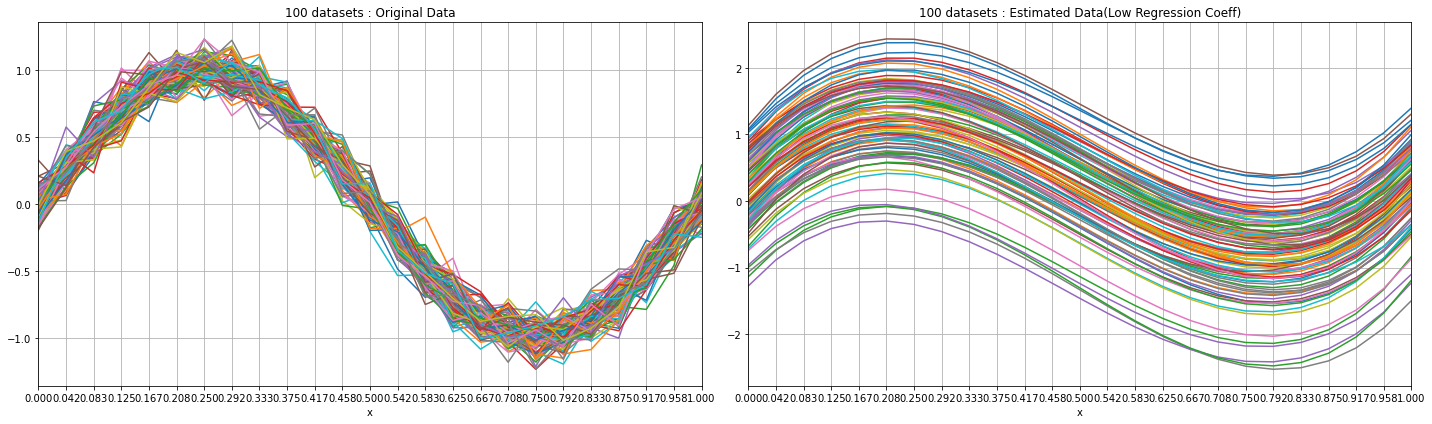

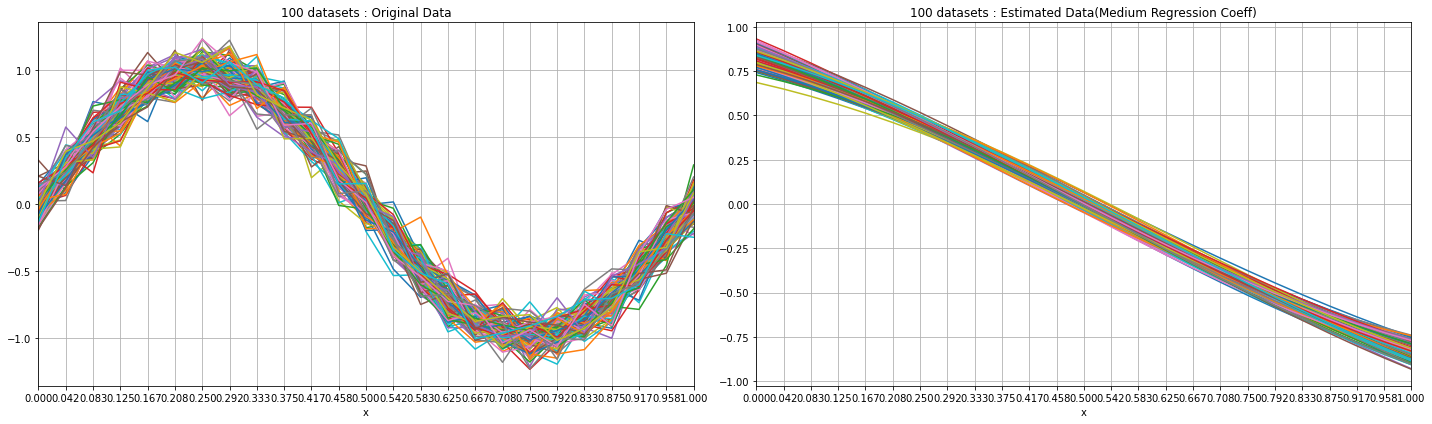

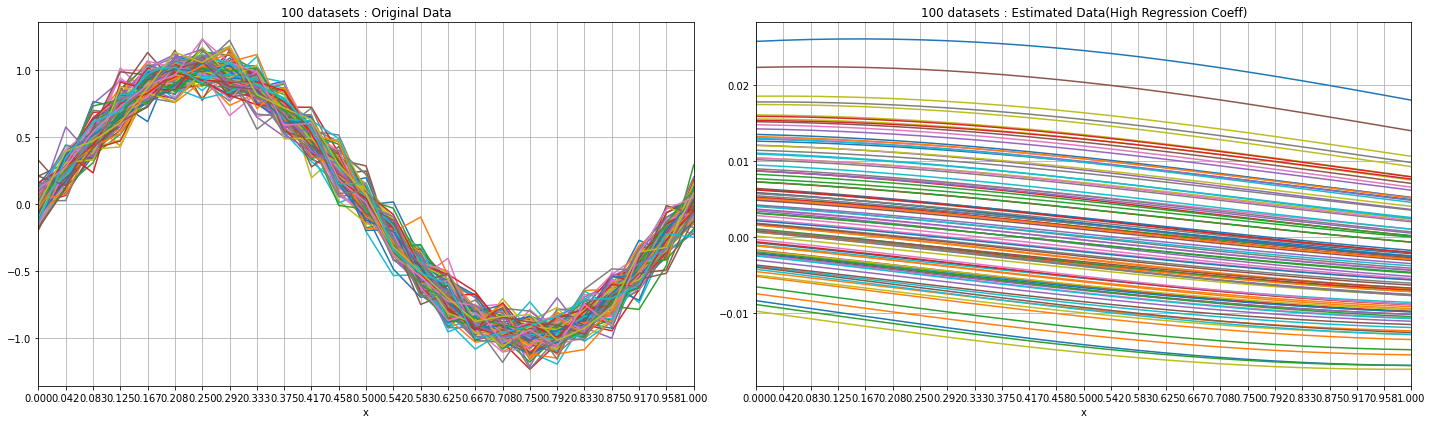

In [29]:
x = np.linspace(0,1,25,True)
L = 100
fig = plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('100 datasets : Original Data')
for i in range(L):
    plt.plot(x,D_sets[i])
plt.xlabel('x')
plt.xticks(x)
plt.xlim([0,1])
plt.grid()
plt.subplot(1,2,2)
plt.title('100 datasets : Estimated Data(Low Regression Coeff)')
for i in range(L):
    plt.plot(x,Y_low[i])
plt.xlabel('x')
plt.xticks(x)
plt.xlim([0,1])
plt.grid()
fig = plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('100 datasets : Original Data')
for i in range(L):
    plt.plot(x,D_sets[i])
plt.xlabel('x')
plt.xticks(x)
plt.xlim([0,1])
plt.grid()
plt.subplot(1,2,2)
plt.title('100 datasets : Estimated Data(Medium Regression Coeff)')
for i in range(L):
    plt.plot(x,Y_medium[i])
plt.xlabel('x')
plt.xticks(x)
plt.xlim([0,1])
plt.grid()
fig = plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('100 datasets : Original Data')
for i in range(L):
    plt.plot(x,D_sets[i])
plt.xlabel('x')
plt.xticks(x)
plt.xlim([0,1])
plt.grid()
plt.subplot(1,2,2)
plt.title('100 datasets : Estimated Data(High Regression Coeff)')
for i in range(L):
    plt.plot(x,Y_high[i])
plt.xlabel('x')
plt.xticks(x)
plt.xlim([0,1])
plt.grid()
plt.show()



Concept of Variance


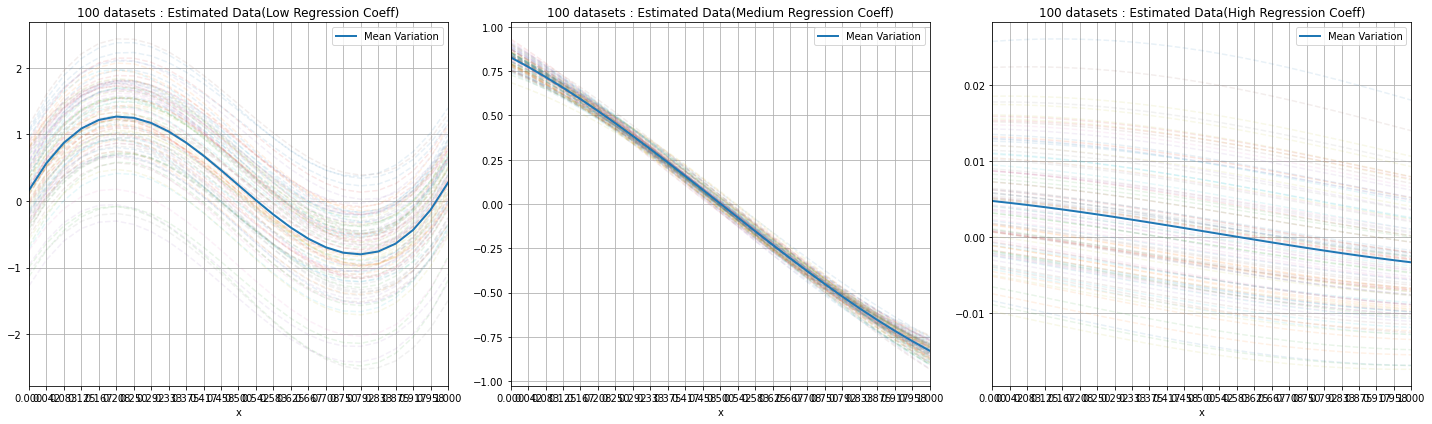

In [30]:
########################################
#Illustrate the concept of Bias-Variance trade off
########################################
#Concept of Variance
Y_low_mean = sum(Y_low.values())/len(Y_low)
Y_medium_mean = sum(Y_medium.values())/len(Y_medium)
Y_high_mean = sum(Y_high.values())/len(Y_high)
plt.figure(figsize=(20,6))
print("Concept of Variance")
plt.subplot(1,3,1)
plt.title('100 datasets : Estimated Data(Low Regression Coeff)')
for i in range(L):
    plt.plot(x,Y_low[i],'--',alpha=0.1)
plt.plot(x,Y_low_mean,linewidth=2,alpha=1,label='Mean Variation')
plt.xlabel('x')
plt.xticks(x)
plt.xlim([0,1])
plt.grid()
plt.legend()
plt.subplot(1,3,2)
plt.title('100 datasets : Estimated Data(Medium Regression Coeff)')
for i in range(L):
    plt.plot(x,Y_medium[i],'--',alpha=0.1)
plt.plot(x,Y_medium_mean,linewidth=2,alpha=1,label='Mean Variation')
plt.xlabel('x')
plt.xticks(x)
plt.xlim([0,1])
plt.grid()
plt.legend()
plt.subplot(1,3,3)
plt.title('100 datasets : Estimated Data(High Regression Coeff)')
for i in range(L):
    plt.plot(x,Y_high[i],'--',alpha=0.1)
plt.plot(x,Y_high_mean,linewidth=2,alpha=1,label='Mean Variation')
plt.xlabel('x')
plt.xticks(x)
plt.xlim([0,1])
plt.grid()
plt.legend()
plt.show()

Concept of Bias


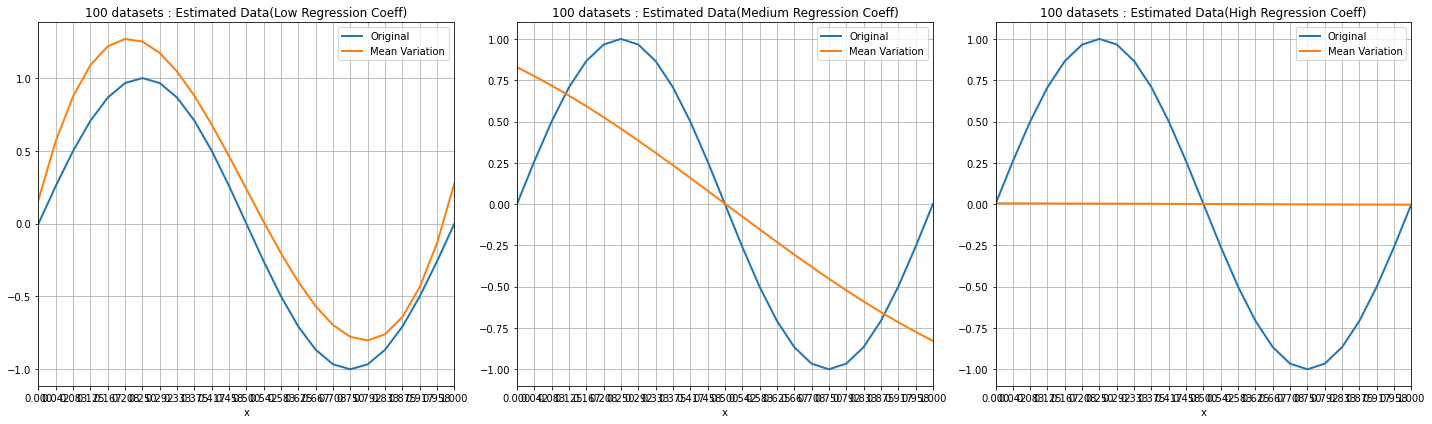

In [31]:
#Concept of Bias
print("Concept of Bias")
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('100 datasets : Estimated Data(Low Regression Coeff)')
plt.plot(x,np.sin(2*np.pi*x),linewidth=2,alpha=1,label='Original')
plt.plot(x,Y_low_mean,linewidth=2,alpha=1,label='Mean Variation')
plt.xlabel('x')
plt.xticks(x)
plt.xlim([0,1])
plt.grid()
plt.legend()
plt.subplot(1,3,2)
plt.title('100 datasets : Estimated Data(Medium Regression Coeff)')
plt.plot(x,np.sin(2*np.pi*x),linewidth=2,alpha=1,label='Original')
plt.plot(x,Y_medium_mean,linewidth=2,alpha=1,label='Mean Variation')
plt.xlabel('x')
plt.xticks(x)
plt.xlim([0,1])
plt.grid()
plt.legend()
plt.subplot(1,3,3)
plt.title('100 datasets : Estimated Data(High Regression Coeff)')
plt.plot(x,np.sin(2*np.pi*x),linewidth=2,alpha=1,label='Original')
plt.plot(x,Y_high_mean,linewidth=2,alpha=1,label='Mean Variation')
plt.xlabel('x')
plt.xticks(x)
plt.xlim([0,1])
plt.grid()
plt.legend()
plt.show()

**Observations :**


*   The Bias-Variance tradeoff : We can never obtain both bias and variance to be minimum.
*   For the low regression coeff, we can observe that the bias is very low but the variance is high when compared to medium regression coeff, whose bias is comparitively high but the variance is very low.
*   The case for high regression coefficient, we can observe it to have both high variance and high bias.



<b> Part - (6) : Understanding MAP estimate  </b>

(a). Generate 100 noisy data points of a sinusoid. Fit a $20^{th}$  order  linear regression  model  with  Gaussian  basis  functions. Starting from a standard normal prior, update the statistics of the posterior density of the parameters using Bayesian sequential updates.

(b). Sample a parameter vector from the posterior distribution, and obtain the curve fit for this realization. Repeat this for several times, and estimate the average of these curve fits, and compare it with the original sinusoid

(c). Use the posterior distribution of the parameters to evaluate the predictive distribution of target $p(t_{0}/x_{0},X,t)$, and plot it for different number of training data points, as discussed in the class.

(d). Report all your observations

Using Unshuffled Data


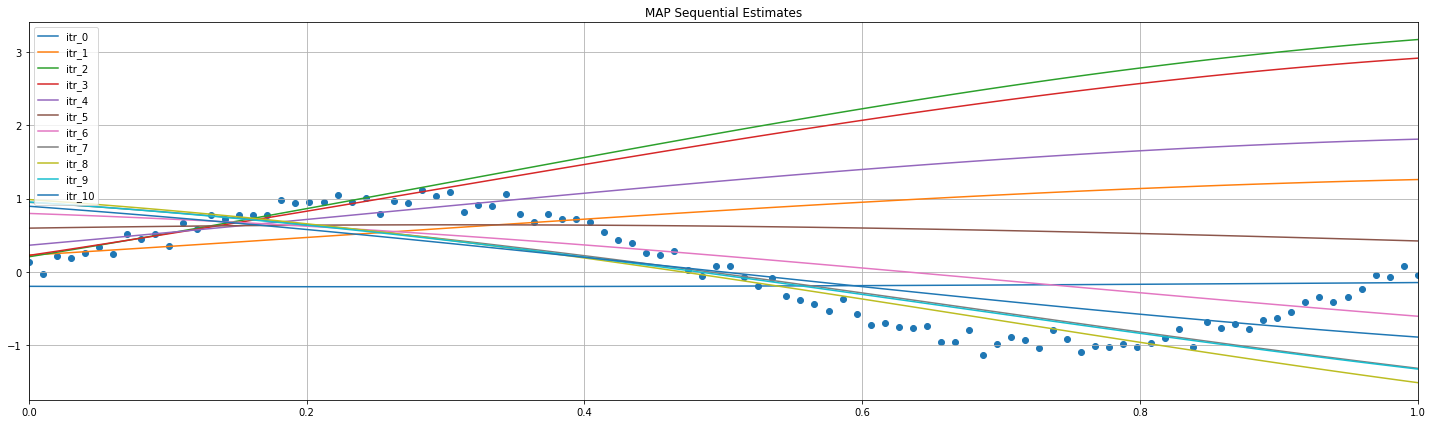


Predictive Distributions
Iteration - 0


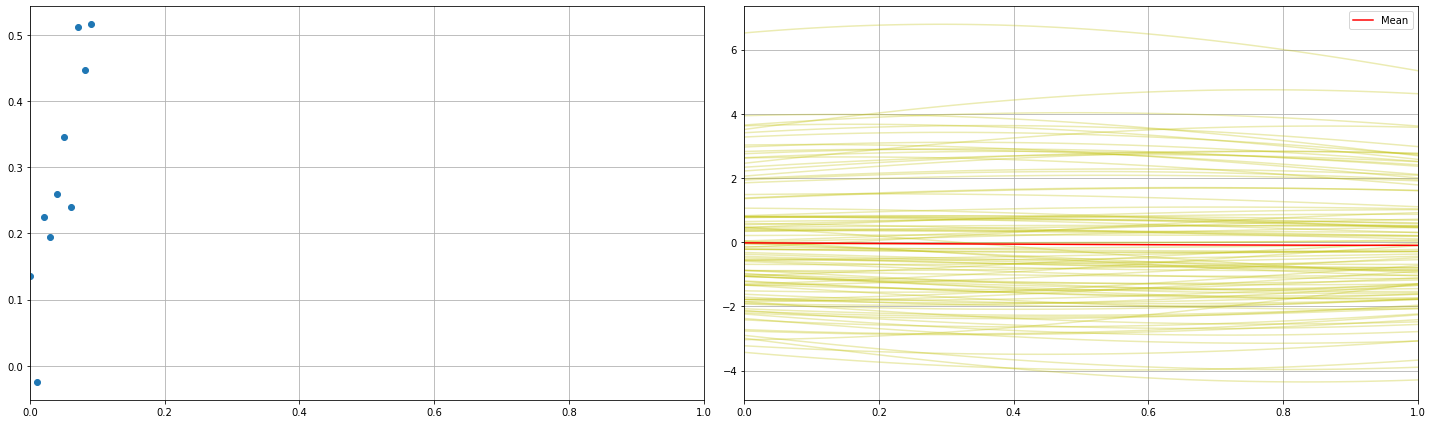

Iteration - 1


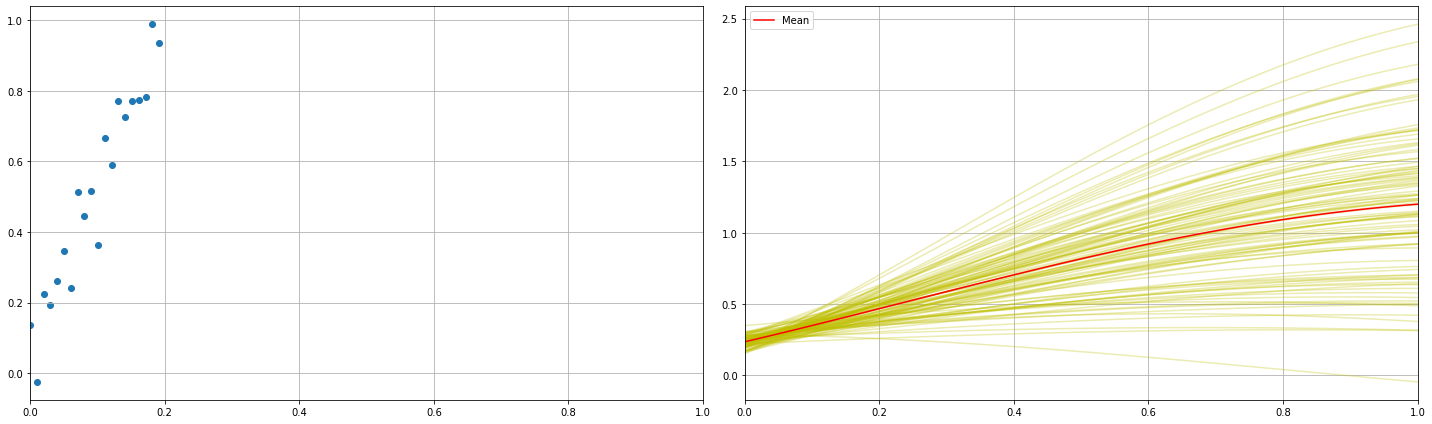

Iteration - 2


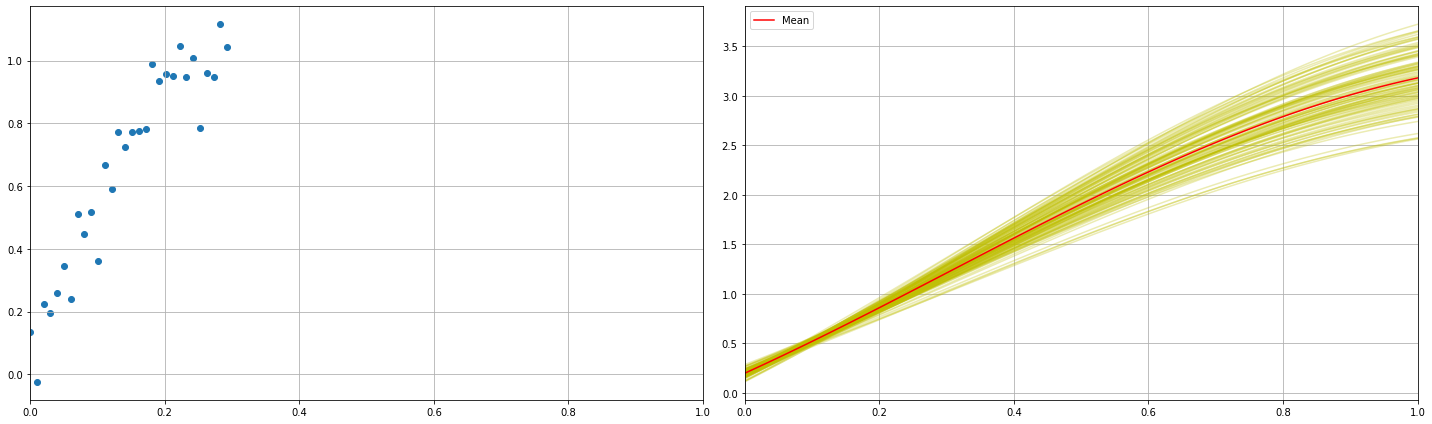

Iteration - 3


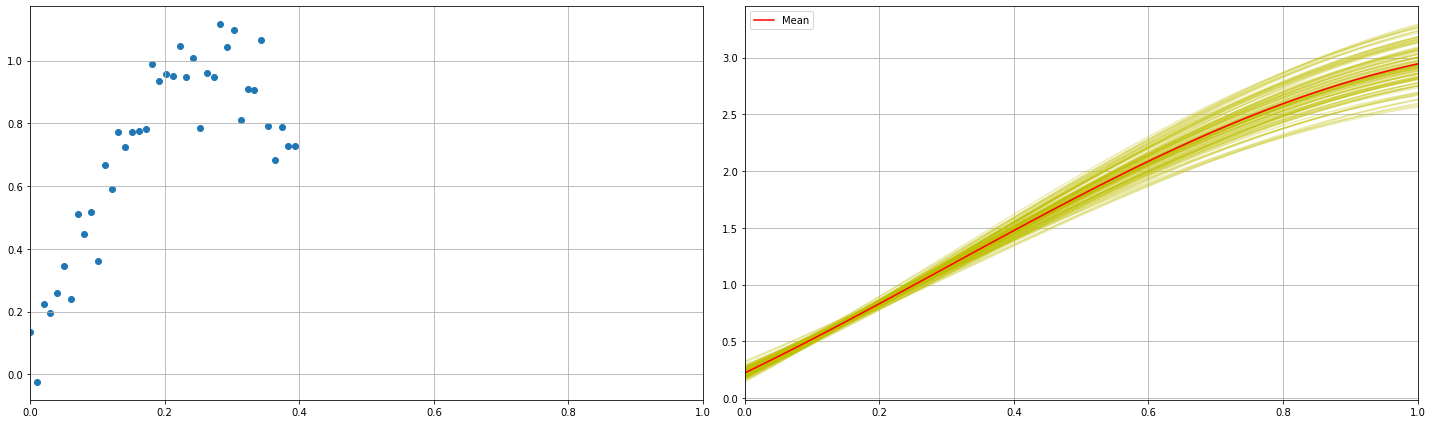

Iteration - 4


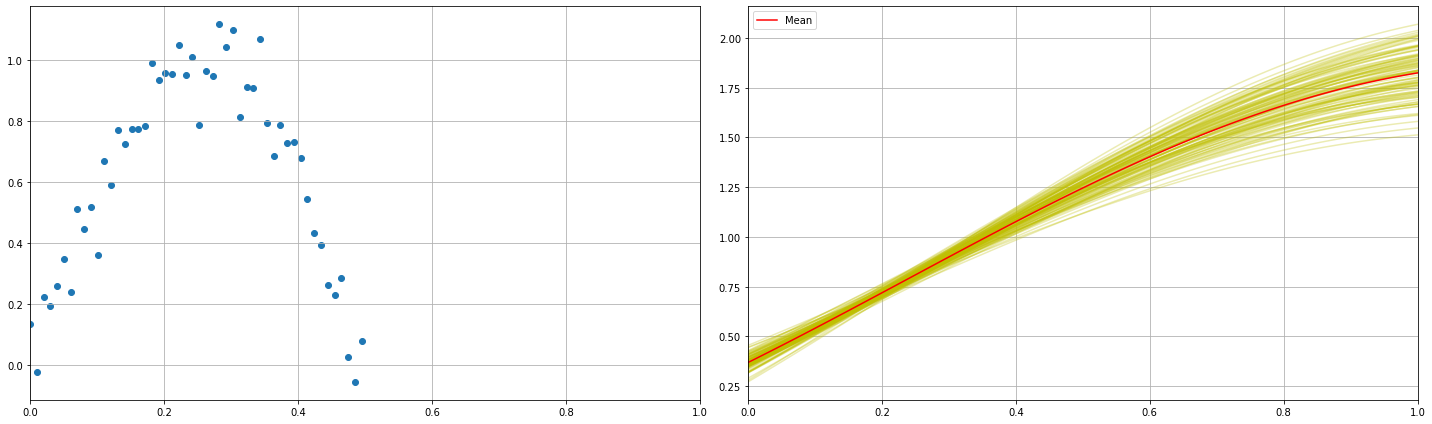

Iteration - 5


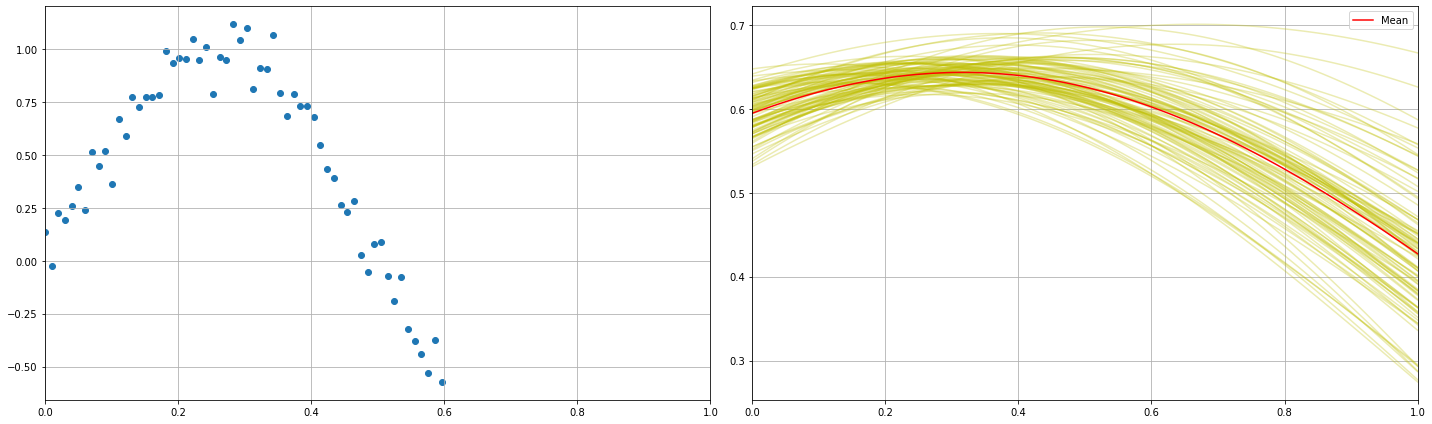

Iteration - 6


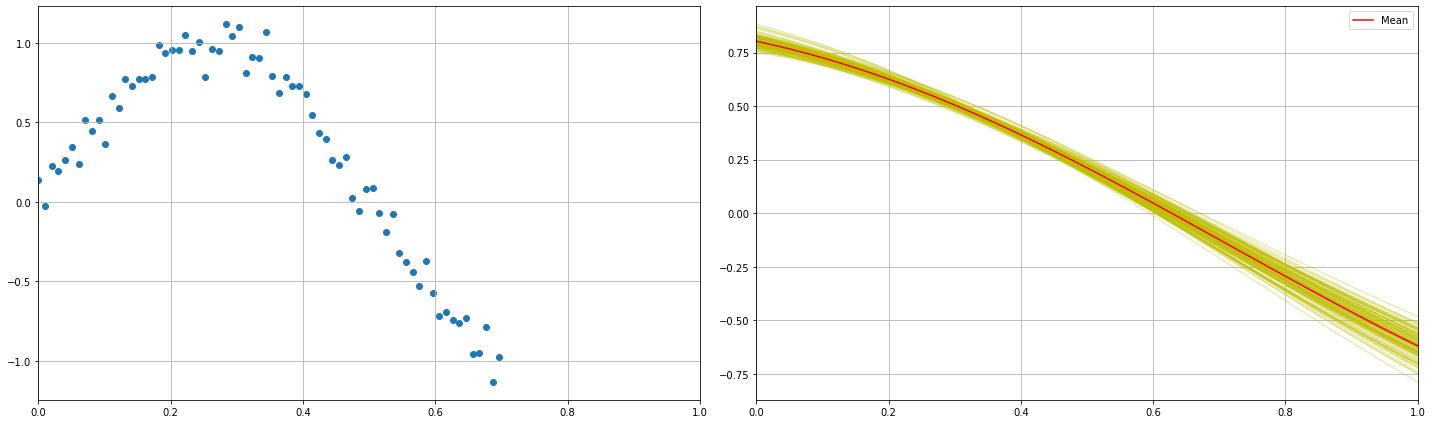

Iteration - 7


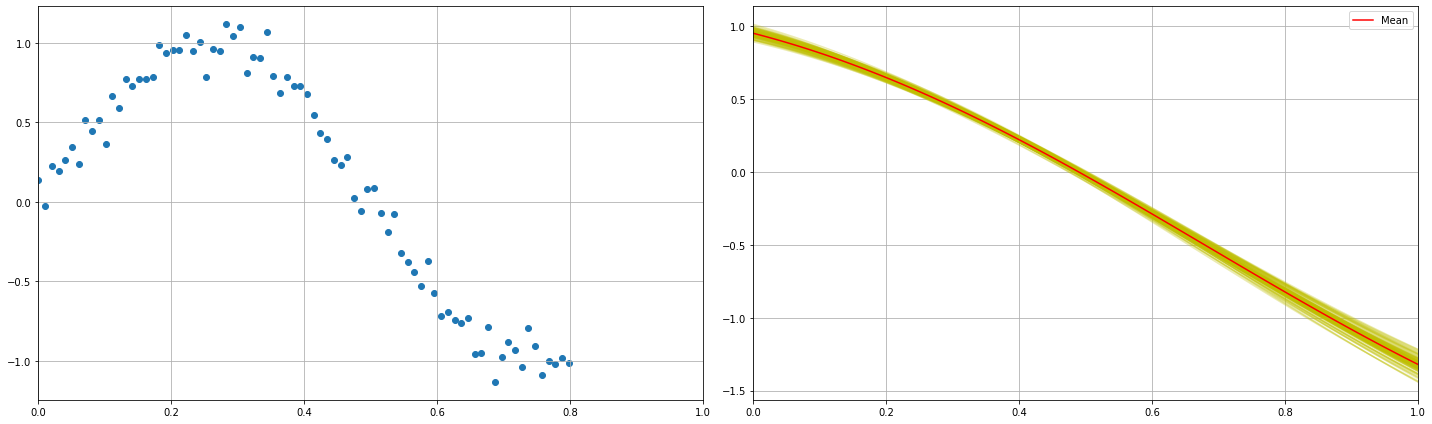

Iteration - 8


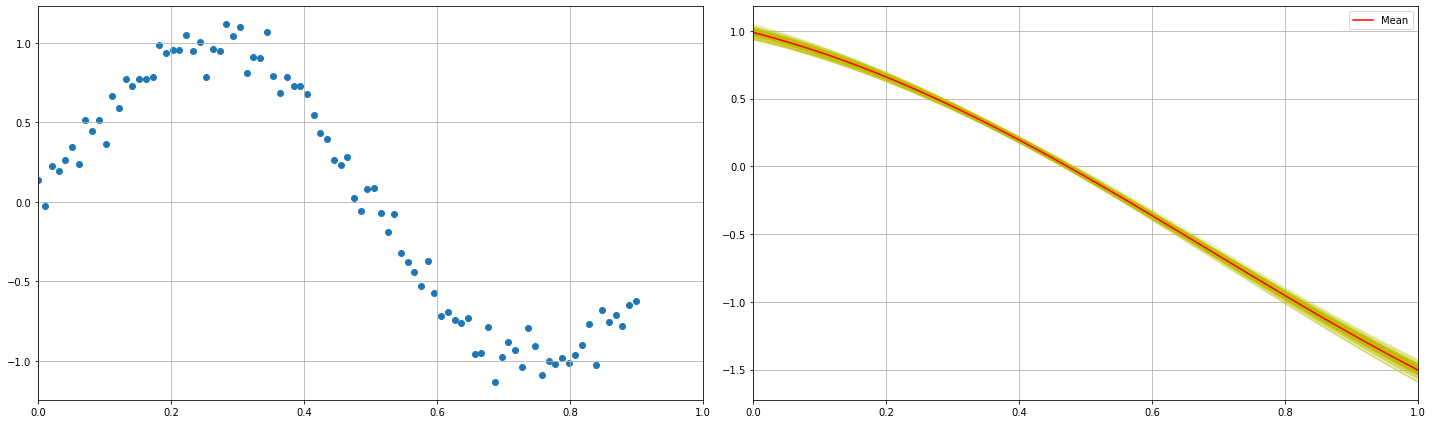

Iteration - 9


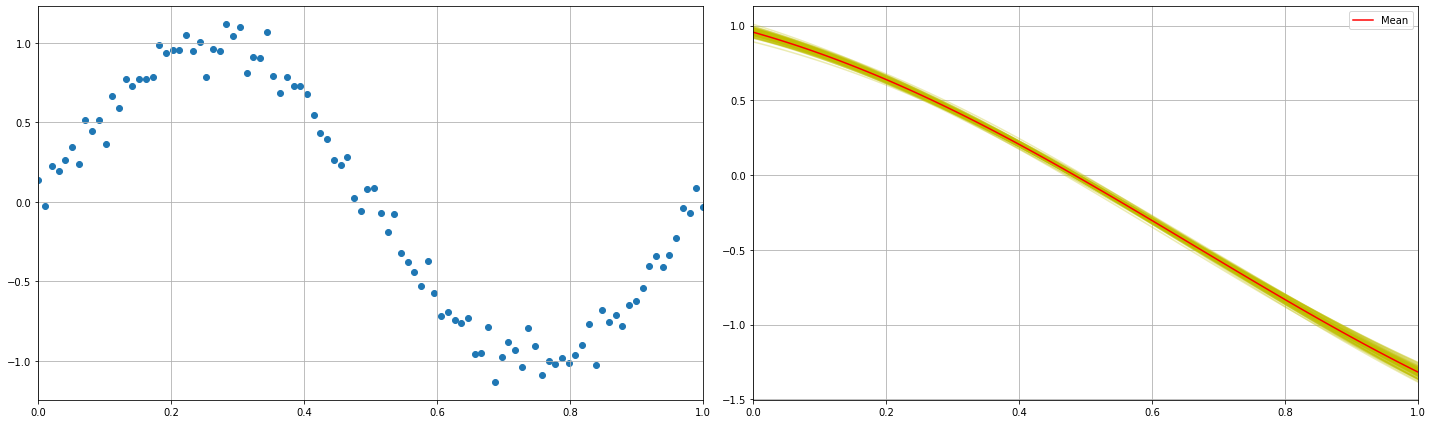

Iteration - 10


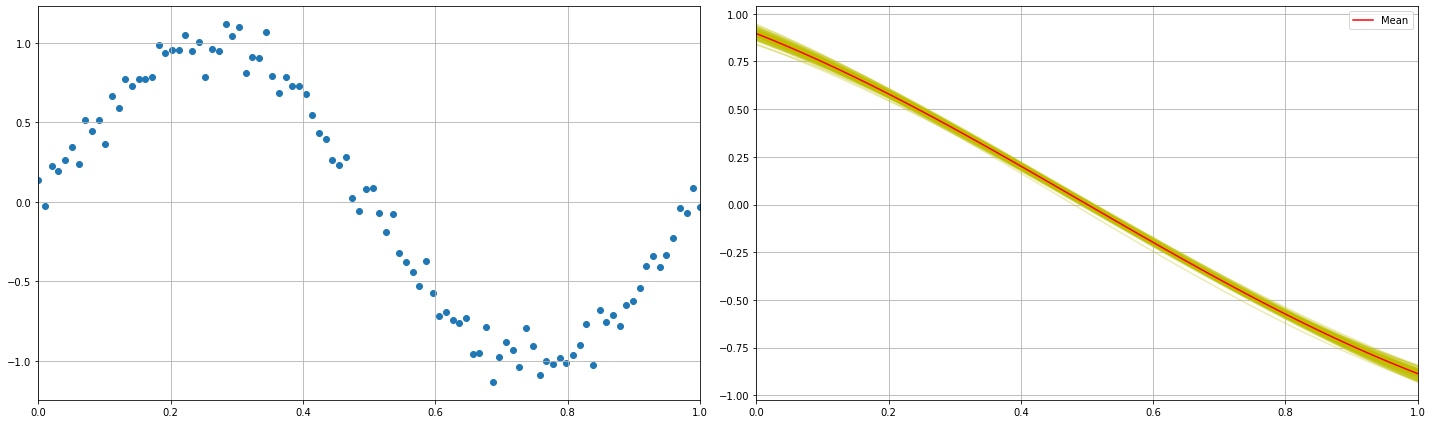

In [32]:
########################################
#Generate 100 data sets of noisy sinusoidal data
########################################
M=20
m0=0
std_dev = 0.1
mean=0
numSamples=100
beta = 1/(std_dev**2)
x = np.linspace(0,1,numSamples,True)
t_whole = datasetGenerator(numSamples,mean,std_dev).reshape((numSamples,1))
Phi_x_whole = GaussianKernel(x,M)
# KernelRegressionFit(X_train,Y_train,'Gaussian',M,lamda,xmin=0,xmax=1)
alpha = 0.1
#Shuffling the data
idx = np.arange(numSamples)
# np.random.shuffle(idx)
x_sh = x[idx]
t_whole_sh = t_whole[idx]
print("Using Unshuffled Data")
########################################
#Updating statistics of posterior density
########################################
#Initialie the parameters for standard normal prior
# mo = np.random.randn(M+1).reshape((M+1,1))
mo = np.zeros((M+1,1))
sig_o = alpha**-1*np.eye(M+1)
m_old = mo
sig_old = sig_o
m_hist = []
m_hist.append(m_old)
sig_hist =[]
sig_hist.append(sig_old)
batchSize = 10
numBatches = int(numSamples/batchSize)
#Iterate through the data points and update the stats of posterior density
for i in range(numBatches):
    t = t_whole_sh[i*batchSize:(i+1)*batchSize]
    Phi_x = GaussianKernel(x_sh[i*batchSize:(i+1)*batchSize],M)
    sig_new = np.linalg.inv(np.linalg.inv(sig_old)+(beta*(Phi_x.T@Phi_x)))
    m_new = sig_new@(np.linalg.inv(sig_old)@m_old + (beta*Phi_x.T@t))
    m_old = m_new
    sig_old = sig_new
    #You may save the stats of the posterior density while iterating through the data points for predictive distribution analysis
    m_hist.append(m_old)
    sig_hist.append(sig_old)

########################################
#Sample weight vector from posterior distribution. Estimate the curve, repeat the procedure for 100 times and get the avg fit
########################################
plt.figure(figsize=(20,6))
plt.scatter(x,t_whole)
for i in range(len(m_hist)):
    m = m_hist[i]
    sig = sig_hist[i]
    W_100 = np.random.multivariate_normal(m.reshape(M+1,),sig,100)
    w = np.sum(W_100,axis=0)/len(W_100)
    t_p = Phi_x_whole@w
    plt.plot(x,t_p,label='itr_'+str(i))
plt.xlim([0,1])
# plt.xticks(x)
plt.legend()
plt.grid()
plt.title("MAP Sequential Estimates")
plt.show()
########################################
#Predictive distribution analysis
########################################
#Predictive distribution analysis through sampling
#Iterate through data points and sample weight vectors when partial data points are seen and plot the curves

#Predictive distribution analysis through variance
#Iterate through data points and obtain necessary plots as discussed in the class

print("\nPredictive Distributions")
x = np.linspace(0,1,numSamples,True)
for i in range(len(m_hist)):
    print("Iteration - "+str(i))
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    tp = t_whole_sh[0:(i+1)*batchSize]
    xp = x_sh[0:(i+1)*batchSize]
    plt.scatter(xp,tp)
    plt.xlim([0,1])
    plt.grid()
    plt.subplot(1,2,2)
    m = m_hist[i]
    sig = sig_hist[i]
    W_100 = np.random.multivariate_normal(m.reshape(M+1,),sig,100)
    for i in range(100):
        w_i = W_100[i,:]
        t_i = Phi_x_whole@w_i
        plt.plot(x,t_i,'y',alpha=0.3)
    w = np.sum(W_100,axis=0)/len(W_100)
    t_p = Phi_x_whole@w
    plt.plot(x,t_p,'r',alpha=1,label='Mean')
    plt.legend()
    plt.xlim([0,1])
    plt.grid()
    plt.show()




Using Shuffled Data


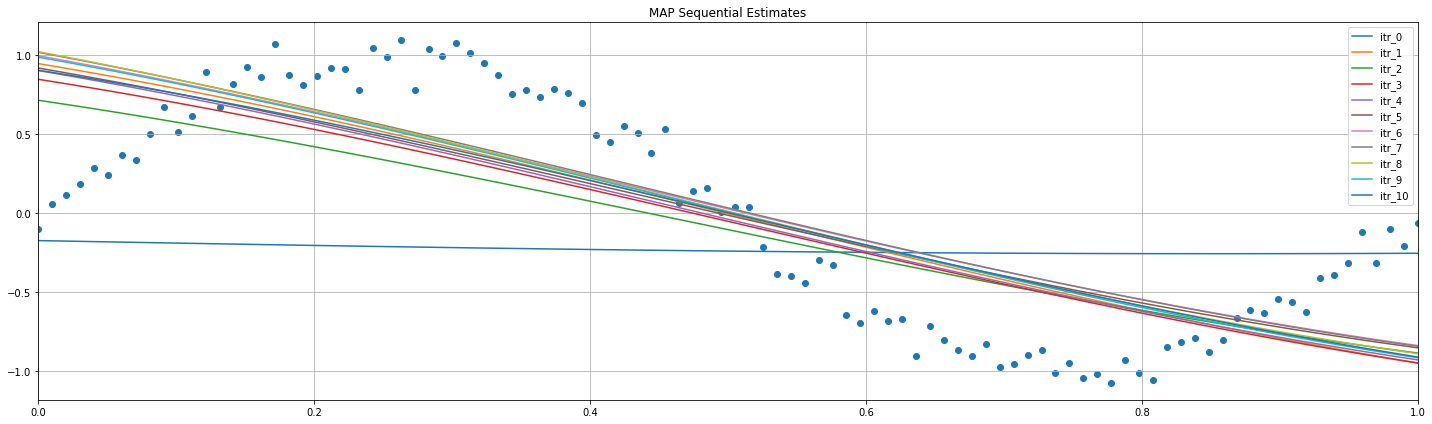


Predictive Distributions
Iteration - 0


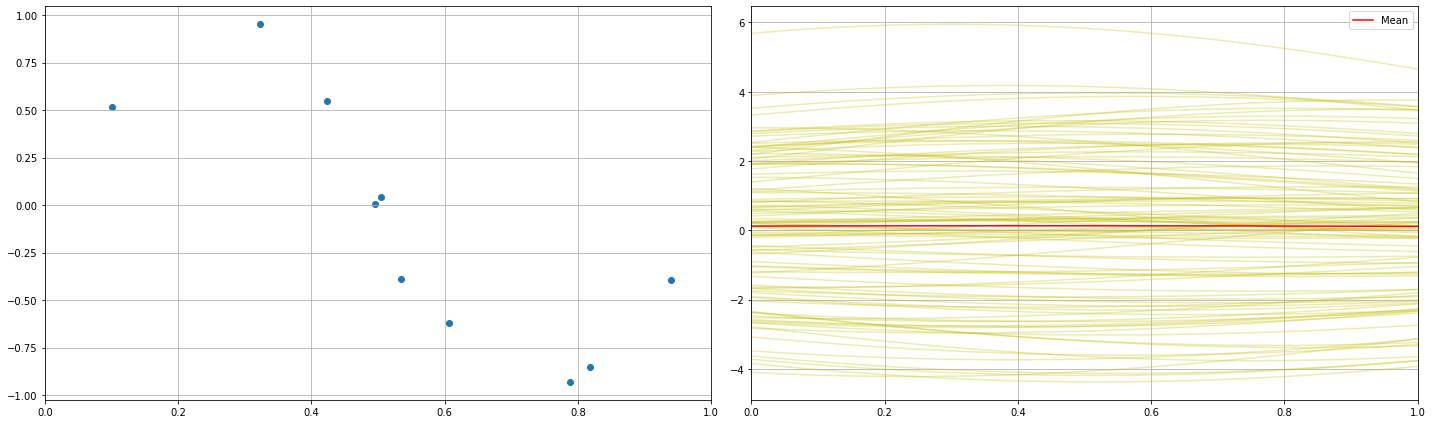

Iteration - 1


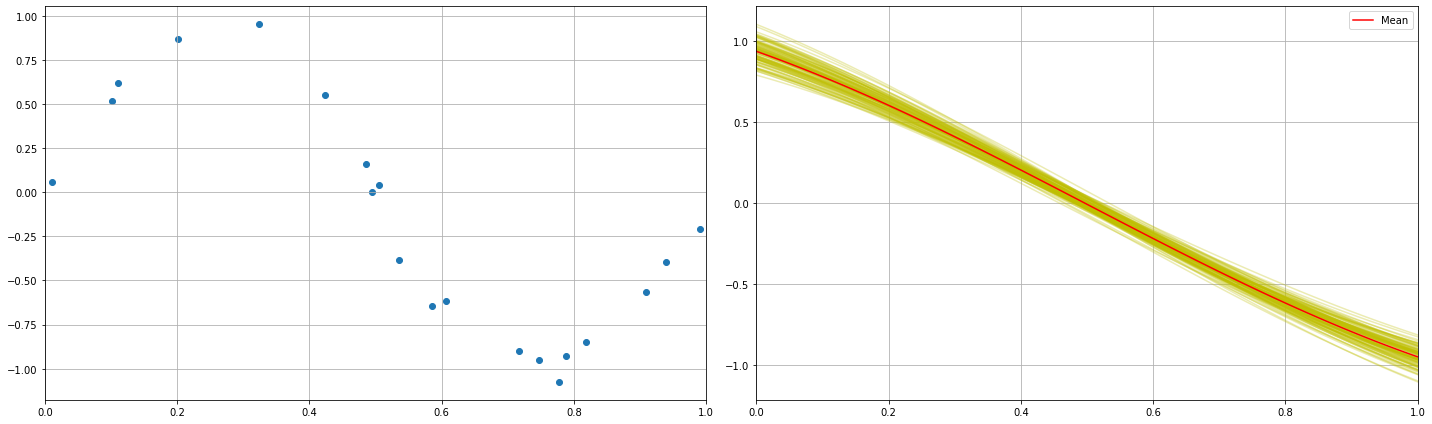

Iteration - 2


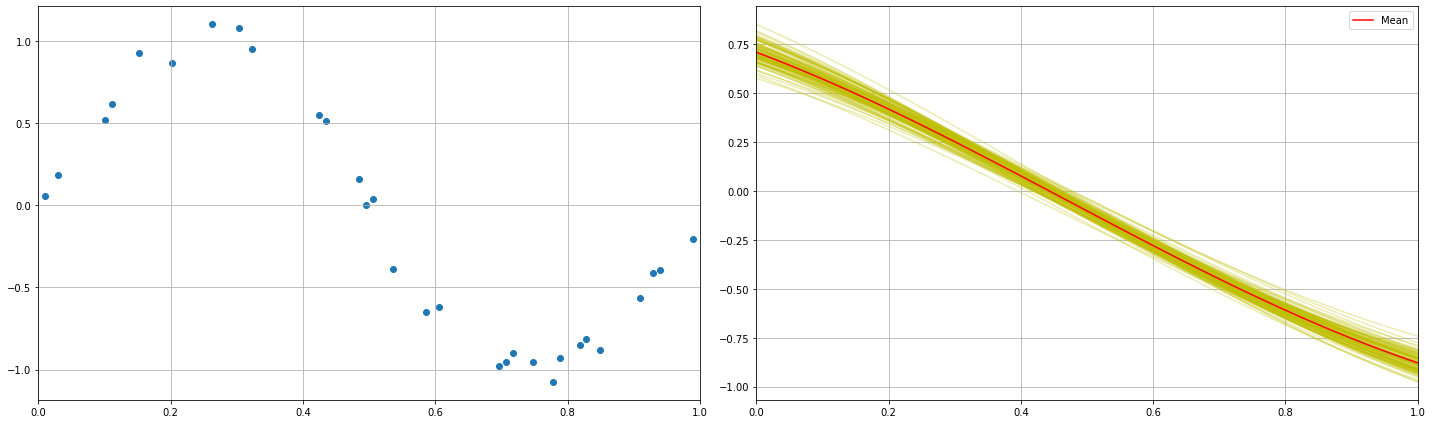

Iteration - 3


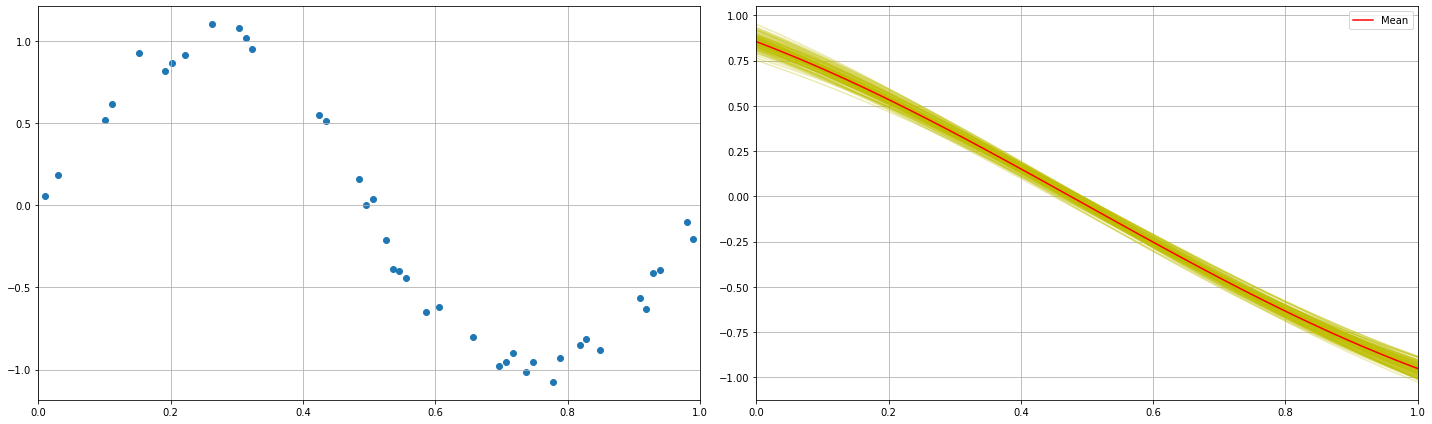

Iteration - 4


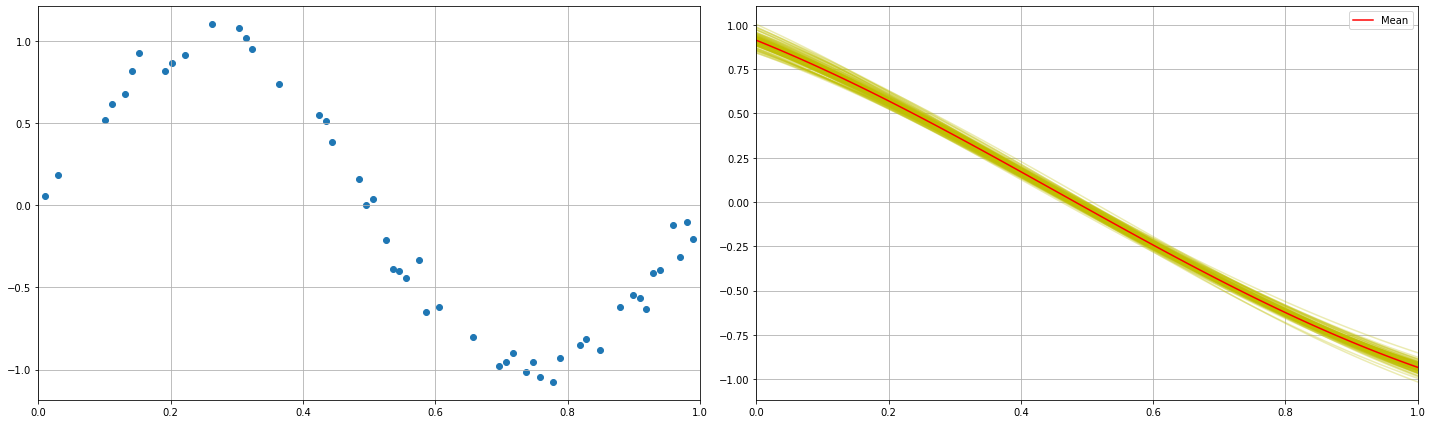

Iteration - 5


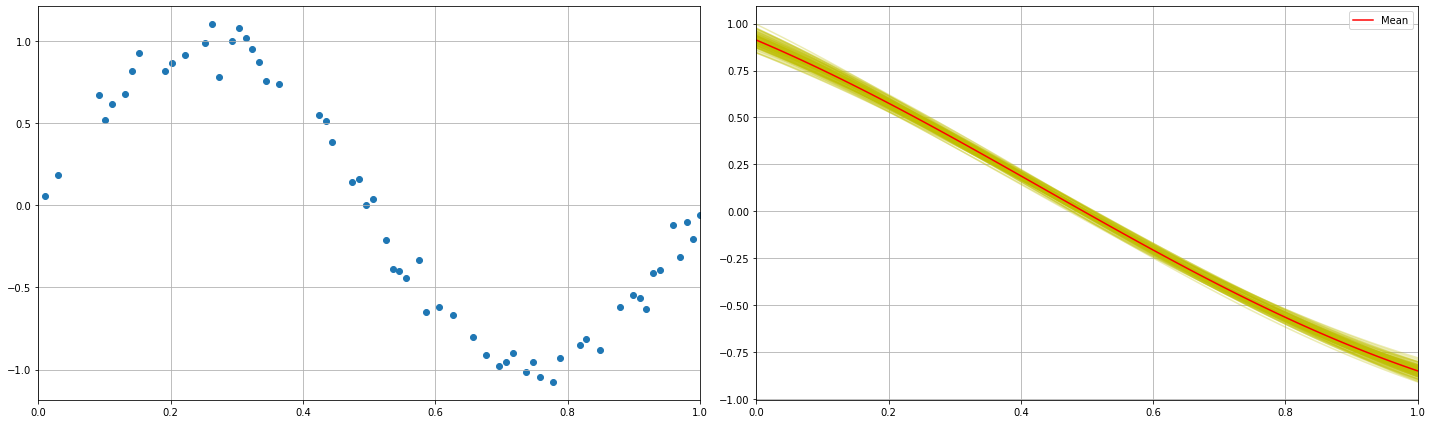

Iteration - 6


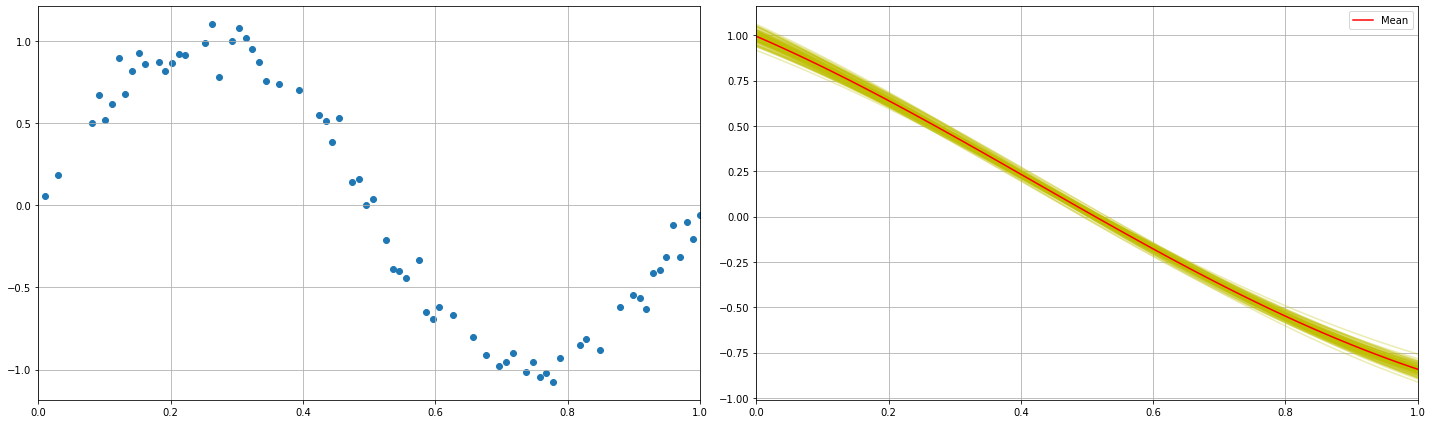

Iteration - 7


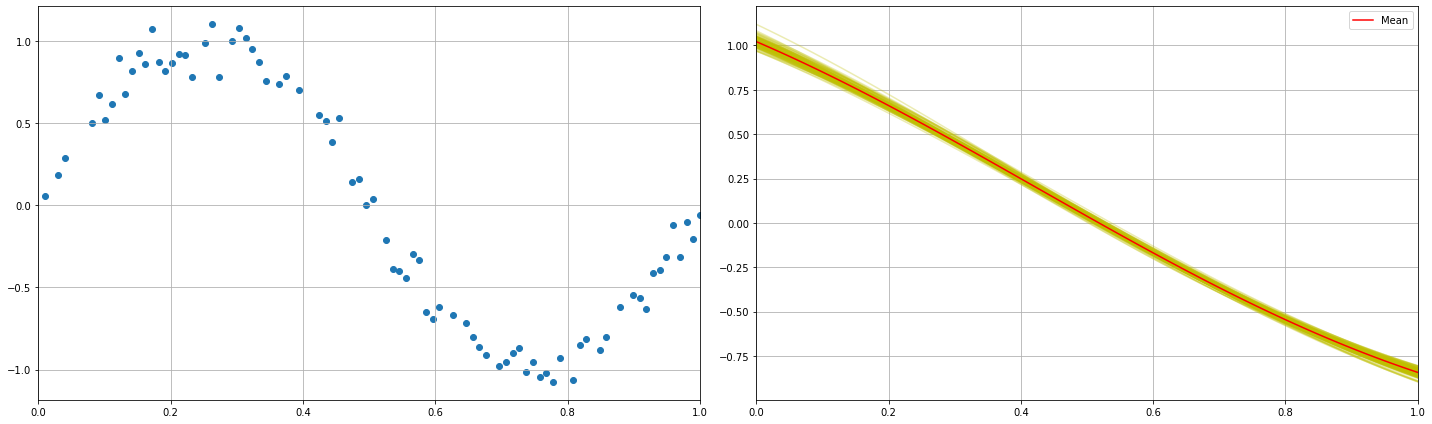

Iteration - 8


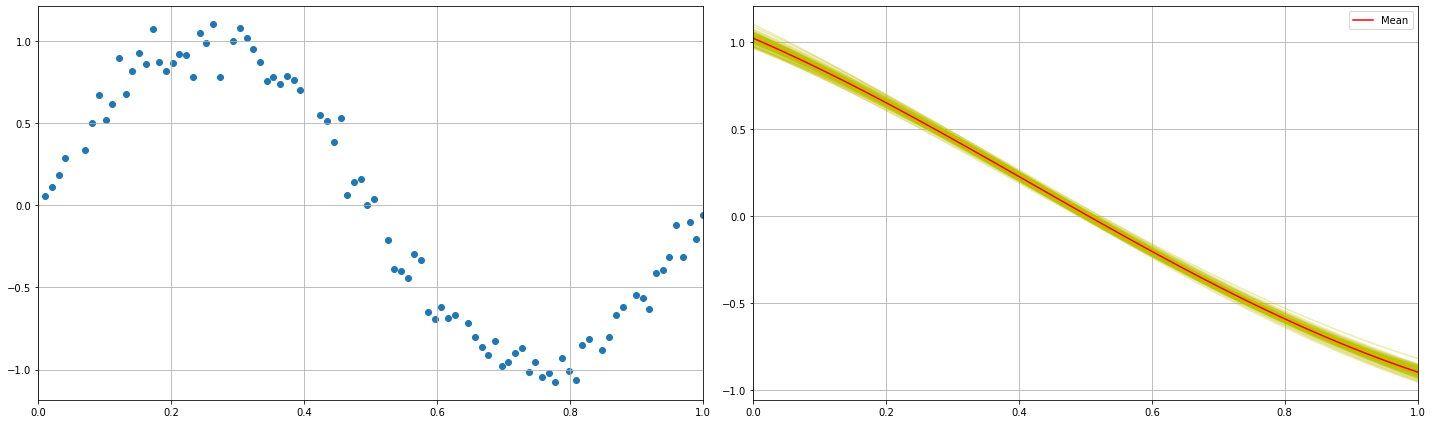

Iteration - 9


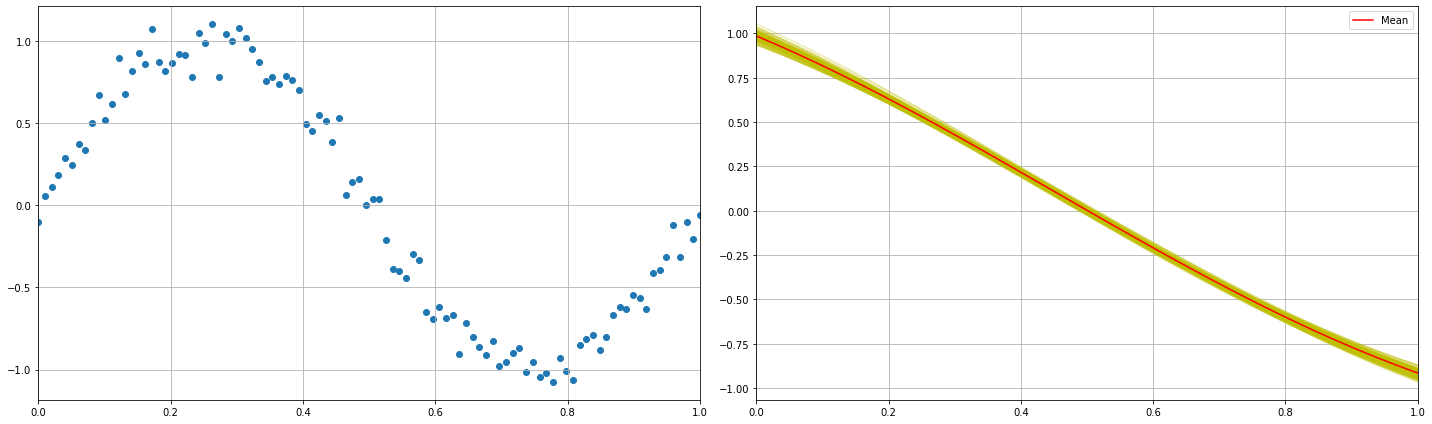

Iteration - 10


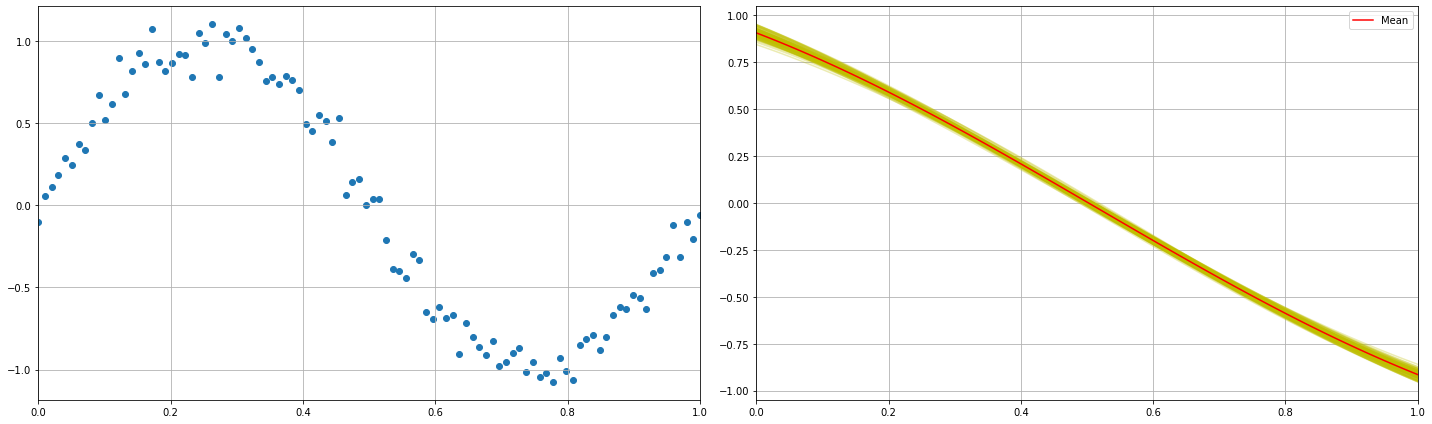

In [33]:
########################################
#Generate 100 data sets of noisy sinusoidal data
########################################
M=20
m0=0
std_dev = 0.1
mean=0
numSamples=100
beta = 1/(std_dev**2)
x = np.linspace(0,1,numSamples,True)
t_whole = datasetGenerator(numSamples,mean,std_dev).reshape((numSamples,1))
Phi_x_whole = GaussianKernel(x,M)
# KernelRegressionFit(X_train,Y_train,'Gaussian',M,lamda,xmin=0,xmax=1)
alpha = 0.1
#Shuffling the data
idx = np.arange(numSamples)
np.random.shuffle(idx)
x_sh = x[idx]
t_whole_sh = t_whole[idx]
print("Using Shuffled Data")
########################################
#Updating statistics of posterior density
########################################
#Initialie the parameters for standard normal prior
# mo = np.random.randn(M+1).reshape((M+1,1))
mo = np.zeros((M+1,1))
sig_o = alpha**-1*np.eye(M+1)
m_old = mo
sig_old = sig_o
m_hist = []
m_hist.append(m_old)
sig_hist =[]
sig_hist.append(sig_old)
batchSize = 10
numBatches = int(numSamples/batchSize)
#Iterate through the data points and update the stats of posterior density
for i in range(numBatches):
    t = t_whole_sh[i*batchSize:(i+1)*batchSize]
    Phi_x = GaussianKernel(x_sh[i*batchSize:(i+1)*batchSize],M)
    sig_new = np.linalg.inv(np.linalg.inv(sig_old)+(beta*(Phi_x.T@Phi_x)))
    m_new = sig_new@(np.linalg.inv(sig_old)@m_old + (beta*Phi_x.T@t))
    m_old = m_new
    sig_old = sig_new
    #You may save the stats of the posterior density while iterating through the data points for predictive distribution analysis
    m_hist.append(m_old)
    sig_hist.append(sig_old)

########################################
#Sample weight vector from posterior distribution. Estimate the curve, repeat the procedure for 100 times and get the avg fit
########################################
plt.figure(figsize=(20,6))
plt.scatter(x,t_whole)
for i in range(len(m_hist)):
    m = m_hist[i]
    sig = sig_hist[i]
    W_100 = np.random.multivariate_normal(m.reshape(M+1,),sig,100)
    w = np.sum(W_100,axis=0)/len(W_100)
    t_p = Phi_x_whole@w
    plt.plot(x,t_p,label='itr_'+str(i))
plt.xlim([0,1])
# plt.xticks(x)
plt.legend()
plt.grid()
plt.title("MAP Sequential Estimates")
plt.show()
########################################
#Predictive distribution analysis
########################################
#Predictive distribution analysis through sampling
#Iterate through data points and sample weight vectors when partial data points are seen and plot the curves

#Predictive distribution analysis through variance
#Iterate through data points and obtain necessary plots as discussed in the class

print("\nPredictive Distributions")
x = np.linspace(0,1,numSamples,True)
for i in range(len(m_hist)):
    print("Iteration - "+str(i))
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    tp = t_whole_sh[0:(i+1)*batchSize]
    xp = x_sh[0:(i+1)*batchSize]
    plt.scatter(xp,tp)
    plt.xlim([0,1])
    plt.grid()
    plt.subplot(1,2,2)
    m = m_hist[i]
    sig = sig_hist[i]
    W_100 = np.random.multivariate_normal(m.reshape(M+1,),sig,100)
    for i in range(100):
        w_i = W_100[i,:]
        t_i = Phi_x_whole@w_i
        plt.plot(x,t_i,'y',alpha=0.3)
    w = np.sum(W_100,axis=0)/len(W_100)
    t_p = Phi_x_whole@w
    plt.plot(x,t_p,'r',alpha=1,label='Mean')
    plt.legend()
    plt.xlim([0,1])
    plt.grid()
    plt.show()




**Observations:**


*   We can observe that irrespective of the order of giving the data, the weights approach the same value.
*   As the number of datapoints increase, the variance decreases.
*   The mean estimate tends towards the newly added datapoints.
*   The distribution dont exactly match the behaviour of the sinusoid, however is performing good enough for the range of confidence offered.
*   We can also observe after updating for a certain number of data points, the weight alteration is very less.



In [34]:
#Mount the drive
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [88]:
def fitModel(X_train,Y_train,X_test,Y_test,Epochs=3,BatchSize=100,stepSize= 0.01,lamda=1e-18):       
    #Initialize the weights
    L,f = X_train.shape
    # print(L)
    w_est = np.random.randn(f+1).reshape((f+1,1))
    Phi_X_train = np.hstack((np.ones((L,1)),X_train))
    Lt,ft = X_test.shape
    Phi_X_test = np.hstack((np.ones((Lt,1)),X_test))
    #Initialize the necessary variables
    neta = stepSize
    numEpochs = Epochs
    numBatches = int(L/BatchSize)
    itr = 0
    TrainErrorData = []
    TestErrorData = []
    #Iterate through epochs
    for epoch in range(numEpochs):
        idx = np.arange(L)
        np.random.shuffle(idx)
        #Iterate through the batches
        for i in range(numBatches):
            #Initialize the necessary variables
            #Get a batch of data
            phi = Phi_X_train[idx[i*BatchSize:(i+1)*BatchSize]]
            # print(Y_train.shape,i*BatchSize,(i+1)*BatchSize)
            t = Y_train[idx[i*BatchSize:(i+1)*BatchSize]]
            #Iterate through the data points of obtained batch
            #Obtain kernel representation
            #Compute the gradient of weight's
            #Compute the running mean of the weights gradients for the batch update
            grad = gradient(w_est,phi,t)+(2*lamda*w_est)
            #Update the weights using mean gradient, consider using reasonable stepSize
            w_old = w_est
            w_est = w_est + neta*grad
            itr+=1
            Y_train_est = Phi_X_train@w_est
            Y_test_est = Phi_X_test@w_est
            # print(Y_train.shape,Y_train_est.shape)
            TrainError = mse(Y_train_est,Y_train)
            TestError = min(mse(Y_test_est,Y_test), 10e40)
            TrainErrorData.append(TrainError)
            TestErrorData.append(TestError)
    return w_est,TrainErrorData,TestErrorData
def normalize(v):
    mean = np.sum(v)/len(v)
    d = v-mean
    var = np.sum(d**2)/len(v)
    normalized = (v-mean)/np.sqrt(var)
    return normalized

<center> <h2> <b> Real World Problems </b> </h2> </center>

<b> Part - (1): Blog Feedback prediction  </b>
This data originates from blog posts.  The raw HTML-documents of the blogposts were crawled and processed.  The regression task associated with the data is the prediction of the number of comments in the upcoming 24 hours. Inorder to simulate this situation, we choose a base-time (in the past) and select the blog posts that were published at most 72 hours before the selected basedate/time.  Then, we calculate all the features of the selected blog posts from the  information  that  was  available  at  the  basetime,  therefore  each  instance corresponds to a blog post.  The target is the number of comments that the blog post received in the next 24 hours relative to the base time. <br>
[Link to Dataset](http://archive.ics.uci.edu/ml/datasets/BlogFeedback)


In [36]:
import pandas as pd
root_path='/content/gdrive/MyDrive/PRML_22/Programming_Assignments/Assignment_2/Datasets/BlogFeedback/'
train = pd.read_csv(root_path+"blogData_train.csv", header=None)
train.head()
# print(train.shape)

0          1    2      3     4    ...  276  277  278  279   280
0  40.30467  53.845657  0.0  401.0  15.0  ...  0.0  0.0  0.0  0.0   1.0
1  40.30467  53.845657  0.0  401.0  15.0  ...  0.0  0.0  0.0  0.0   0.0
2  40.30467  53.845657  0.0  401.0  15.0  ...  0.0  0.0  0.0  0.0   0.0
3  40.30467  53.845657  0.0  401.0  15.0  ...  0.0  0.0  0.0  0.0   1.0
4  40.30467  53.845657  0.0  401.0  15.0  ...  0.0  0.0  0.0  0.0  27.0

[5 rows x 281 columns]

In [45]:
print(train.shape)

(52397, 281)


In [89]:
X= np.asarray(train.iloc[:1000,0:30])
t= np.asarray(train.iloc[:1000,-1])
# print(X.shape,t.shape)
for i in range(X.shape[0]):
    X[i,:] = normalize(X[i,:])
n = len(t)
n_tr = 0.5
x_train = X[:int(n_tr*n),:]
x_test = X[int(n_tr*n):,:]
y_train = t[:int(n_tr*n)].reshape((-1,1))
y_test = t[int(n_tr*n):].reshape((-1,1))
# print(x_train.shape,y_train.shape)

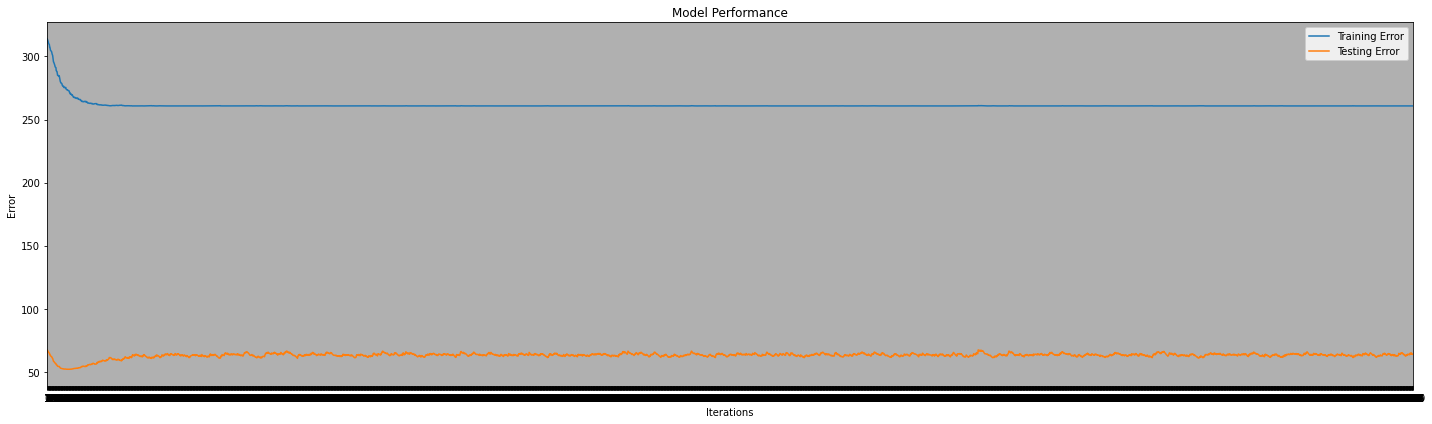

In [90]:
w,TrainErrorData,TestErrorData = fitModel(x_train,y_train,x_test,y_test,Epochs=100,BatchSize=10,stepSize= 0.01)
plt.figure(figsize=(20,6))
plt.plot(np.arange(len(TrainErrorData)),TrainErrorData,label='Training Error')
plt.plot(np.arange(len(TrainErrorData)),TestErrorData,label='Testing Error')
plt.xlim([0,len(TrainErrorData)-1])
plt.xticks(np.arange(len(TrainErrorData)))
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title("Model Performance")
plt.legend()
plt.show()

<b> Part - (2): Breast Cancer Wisconsin (Prognostic) Data Set </b>
Predict the recurrence time/disease-free time of the breast cancer patients from the first 30 features computed from a digitized image of a fine needle aspirate(FNA) of a breast mass. <br>
[Link to Dataset](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29)

In [62]:
import pandas as pd
root_path='/content/gdrive/MyDrive/PRML_22/Programming_Assignments/Assignment_2/Datasets/BreastCancer/'
data = pd.read_csv(root_path+"wpbc.data", header=None)

# data.describe()
data.head()

0  1    2      3      4   ...      30      31       32   33  34
0  119513  N   31  18.02  27.60  ...  0.1170  0.2677  0.08113  5.0   5
1    8423  N   61  17.99  10.38  ...  0.2654  0.4601  0.11890  3.0   2
2  842517  N  116  21.37  17.44  ...  0.2032  0.4334  0.09067  2.5   0
3  843483  N  123  11.42  20.38  ...  0.2575  0.6638  0.17300  2.0   0
4  843584  R   27  20.29  14.34  ...  0.1625  0.2364  0.07678  3.5   0

[5 rows x 35 columns]

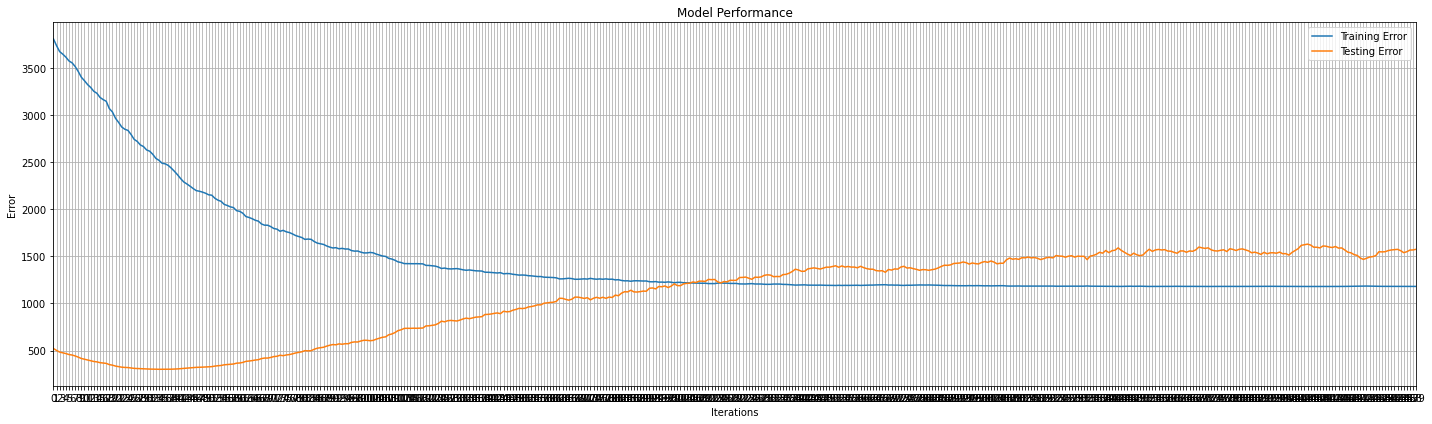

In [99]:
ID = data.iloc[:,0]
#Target
t = np.asarray(data.iloc[:,2]).reshape((-1,1))
#Data
X = np.asarray(data.iloc[:,3:33])
# print(X.shape,t.shape)
for i in range(X.shape[0]):
    X[i,:] = normalize(X[i,:])
n = len(t)
n_tr = 2/3
x_train = X[:int(n_tr*n),:]
x_test = X[int(n_tr*n):,:]
y_train = t[:int(n_tr*n)]
y_test = t[int(n_tr*n):]

w,TrainErrorData,TestErrorData = fitModel(x_train,y_train,x_test,y_test,Epochs=10,BatchSize=3,stepSize= 0.01)
plt.figure(figsize=(20,6))
plt.plot(np.arange(len(TrainErrorData)),TrainErrorData,label='Training Error')
plt.plot(np.arange(len(TrainErrorData)),TestErrorData,label='Testing Error')
plt.xlim([0,len(TrainErrorData)-1])
plt.xticks(np.arange(len(TrainErrorData)))
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title("Model Performance")
plt.legend()
plt.show()

<b> Part - (3): Multiple Output Regression </b>
Until now, we mainly concentrated on a single target variable from the input vector. In this example, we use supply chain management data (scm1d) to predict target vector from the input vector. A brief description of multi output regression can be found in Section 3.1.5 of Bishop’s book. <br>
[Link to Dataset](https://osdn.net/projects/sfnet_mulan/downloads/datasets/multi-target%20regression%20datasets/scm1d-train.zip) <br>
[Dataset Description](https://arxiv.org/pdf/1211.6581.pdf)

In [149]:
def multiDimErr(Y_est,Y_exp):
    M,N = Y_est.shape
    dif = abs(Y_est-Y_exp)**2
    dif = np.sum(dif,axis=0)/N
    err = np.sum(dif)/M
    return err
def multiFitModel(X_train,Y_train,X_test,Y_test):      
    #Initialize the weights
    N,M = X_train.shape
    N,t = Y_train.shape
    # w_est = np.random.randn((M+1,t)).reshape((M+1,t))
    # print((np.ones((N,1)).shape,X_train.shape))
    Phi_X_train = np.hstack((np.ones((N,1)),X_train))
    N_te,M = X_test.shape
    N_te,t = Y_test.shape
    Phi_X_test = np.hstack((np.ones((N_te,1)),X_test))
    w_est = (np.linalg.inv(Phi_X_train.T@Phi_X_train)+lamda*np.eye(M+1))@(Phi_X_train.T@Y_train)
    Y_est = Phi_X_train@w_est
    TrainErr = multiDimErr(Y_est,Y_train)
    Y_est_test = Phi_X_test@w_est
    TestErr = multiDimErr(Y_est_test,Y_test)
    print("Least Squares Model using Pseudo Inverse Solution :")
    print("Error in Training dataset : ",TrainErr)
    print("Error in Testing dataset : ",TestErr)
    return w_est,TrainErr,TestErr

In [150]:
#You may use scipy library to load the data set
from scipy.io import arff  
root_path='/content/gdrive/MyDrive/PRML_22/Programming_Assignments/Assignment_2/Datasets/scm1d/'
f1 = root_path+'scm1d-train.arff'
f2 = root_path+'scm1d-test.arff'
data_train, meta = arff.loadarff(f1)
data_test,meta_2 = arff.loadarff(f2)
df1 = pd.DataFrame(data_train)
df2 = pd.DataFrame(data_test)
df1.head()

timeunit  storageCost  interestRate  ...  MTLp14  MTLp15  MTLp16
0       9.0         27.0           8.0  ...  2409.0  2279.0  2138.0
1      10.0         27.0           8.0  ...  2366.0  2307.0  2154.0
2      11.0         27.0           8.0  ...  2295.0  2185.0  2131.0
3      12.0         27.0           8.0  ...  2292.0  2187.0  2170.0
4      13.0         27.0           8.0  ...  2257.0  2136.0  2164.0

[5 rows x 296 columns]

In [151]:
X_tr = np.asarray(df1.iloc[:,:280])
T_tr = np.asarray(df1.iloc[:,280:])

X_te = np.asarray(df2.iloc[:,:280])
T_te = np.asarray(df2.iloc[:,280:])

for i in range(X_tr.shape[0]):
    X_tr[i,:] = normalize(X_tr[i,:])

for i in range(X_te.shape[0]):
    X_te[i,:] = normalize(X_te[i,:])

In [152]:
w,trainErr,testErr = multiFitModel(X_tr,T_tr,X_te,T_te)

Least Squares Model using Pseudo Inverse Solution :
Error in Training dataset :  151090362.98464718
Error in Testing dataset :  105671121.30503954


<b> Report  </b>
1. The error surface for the least squares is convex. The estimated least squares solution is so close to the minimum cost function arguement.

2. The order of the polynomial fit decides the performance of the model on regressing the data. For lower order, it underfits the data, and for the larger orders, it overfits either way causing large error cost.

3. The general trend is seen that the training error comes down with increasing order whereas the testing data error rises.

4. Regularization effects the model performance by prevent it from overfitting even for higher orders.

5. The bias in the regularization in model is captured by the first weight coefficient.
 
6. Different choice of kernels gives different results based on the complexity of the data. Higher the complexity, higher order kernel is required to fit the data.

7. Stochastic Gradient helps in reducing the runtime. The step size seems a critical factor for reching the optimal solution. If the step size is larger, it is observed that the weights keep oscillating and never settle leading to very high mses. And for very small step sizes, the model takes many iterations to converge. On the other hand, the batch size seems to be a less critical factor, However it does effect the convergence rate, as the small batch size requires more iterations to reach the optimal state.

8. The bias-variance trade-off is explored. Its seen that small bias and variance can never be observed.


9. The MAP and Predictive distributions have given a clear idea varying confidence ranges with larger input data. The Bayesian sequntial updates have proved that irrespective of the way the sequential data is given, the model remains the same for all.

10. The real world problems gave a constructive idea about the possibility of correlating variables to achieve reasonable predictions even with simple liner models.